# Imports and defs

In [1]:
!pip2 install pypolyagamma

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base.experiment import *
from logistic.env_logistic import *
from logistic.agent_logistic import *

import numpy as np
import pandas as pd
import plotnine as gg

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#No bias for now.

def simple_compare(agents, num_articles, dim, var, n_steps, seed=0, verbosity=0):
    env = LogisticBandit(num_articles, dim, NormalDist(0,1,dim=dim), NormalDist(0,var,dim=dim), seed=seed)
    #DistributionWithConstant(
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

In [3]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
step_size=0.01
step_fn = lambda t: step_size/(1 + t * np.sqrt(dim*var)/dim)
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
#batch_size = 50
step_count=500 # number of langevin steps
alpha=0.2
beta=0.5
tol=0.0001

n_steps = 200 #number of experiment steps

verbosity=1

make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim, [0]*(dim), cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_mala_agent = lambda: MalaTS(num_articles, dim, [0]*dim, cov=None, step_size=step_fn, n_steps=step_count,
                                     init_pt=None, verbosity=verbosity)
make_pgts_agent = lambda: PGTS_Stream(num_articles, dim, verbosity=verbosity)


theta [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]
Experiment: Step 0
 Laplace sample: array([ 0.64013153, -1.61695604, -0.02432612, -0.73803091,  0.2799246 ,
       -0.09815039,  0.91017891,  0.31721822,  0.78632796, -0.4664191 ,
       -0.94444626, -0.41004969, -0.01702041,  0.37915174,  2.25930895,
       -0.04225715, -0.955945  , -0.34598178, -0.46359597,  0.48148147])
 Sample: array([-1.17513024, -1.03885159, -0.35706863,  0.15032594,  0.66553668,
        1.65196996,  0.39163519,  0.73260093, -1.06628318, -1.46188852,
        0.20154558, -1.44096162,  0.99886269, -1.63520466, -1.22901967,
        0.34135902,  0.59705427, -0.16429847,  0.09864055, -1.11288243])
 Steps taken: 400
 Sample: array([ 0.60715293,  0.33913667, -0.24341507, -0.77805215, -0.05108736,
       -0.37725483, -0.1465

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.06794618, -0.32542043, -1.14247257, -1.1837741 ,  2.6001662 ,
        1.45073565,  1.41918623,  0.21499049, -0.54448408, -0.0441071 ,
       -0.43748021,  0.83987565, -1.20103592, -1.13610075, -0.53225357,
        1.63415219,  0.26979719, -0.13625772,  0.55151534,  0.08764985])
 Steps taken: 400
 Sample: array([-0.22988168,  0.54118239, -1.24636955, -0.91218657,  0.91378822,
       -0.12975242, -0.7998736 , -0.46418647, -0.23063687,  0.20625249,
        0.57219519,  0.96276306, -0.32022156, -0.24932195, -0.66754089,
       -0.09156919,  0.09249323,  0.17033638, -0.85946229, -0.97166884])
 Accept proportion: 0.720000
 Steps taken: 400
 Sample: array([ 1.00901256,  1.343404  , -0.43189791,  0.21362021,  0.04782407,
       -1.06530343,  0.85611477,  1.18033779, -0.16175561, -0.31124736,
        1.49903534,  0.51104914, -1.1871963 ,  0.03137884, -1.82041628,
        0.88422773,  1.21972414, -0.08289579, -1.17665405, -0.37564425])
Experiment: Step 3
 Laplace sample: array

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.62869434, -0.06489365,  1.48537729,  1.70721282,  1.23491217,
        1.5049883 ,  0.36940304, -0.09002774,  1.34546933,  0.15805685,
       -0.13296669,  1.26791991, -2.77329725, -0.19138601,  1.95964797,
        0.19862637, -0.79557308,  0.48536506, -0.49751338,  0.9888808 ])
 Steps taken: 400
 Sample: array([ 0.00224433, -0.79304597, -0.45368725,  0.35154039,  0.8453232 ,
        0.72248713,  0.2298458 , -0.58909278, -0.02546775,  0.1364586 ,
       -0.36937386,  1.09686612,  0.68633622,  0.28585139,  0.26547031,
        0.72486609, -0.05293558,  0.68764764,  0.26938684, -0.64070303])
 Accept proportion: 0.740000
 Steps taken: 400
 Sample: array([-0.7031624 , -1.31050019, -0.49163449, -0.32706028,  0.414868  ,
        0.74435509,  0.48216487,  0.20493356,  0.61434156, -0.21078247,
        0.53219202,  0.31895862, -0.63193861, -1.3185279 , -1.29404087,
        0.8438341 , -0.94624997, -1.33548326,  0.59512392, -0.28164199])
Experiment: Step 6
 Laplace sample: array

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.54976626, -0.01519747, -2.1145498 , -0.2598974 ,  1.55307531,
        0.9039873 ,  0.48649612, -1.38691352,  0.48542828,  0.25557446,
        0.36818374,  1.16248327, -0.00871629,  0.42832747,  1.54216255,
        0.3100716 , -1.11193382,  0.08237336,  0.47915641, -0.26646567])
 Steps taken: 400
 Sample: array([ 0.36911043,  0.9567838 , -0.32565109,  0.06319371,  0.42619988,
        0.03280008, -0.07646691,  0.9919914 , -0.25868212,  1.46613262,
        0.46863488,  0.06539153, -0.31244496,  0.95646712,  0.50556815,
       -0.42408631,  0.14165725,  0.21719841,  0.78583223, -0.37207139])
 Accept proportion: 0.760000
 Steps taken: 400
 Sample: array([ 0.90306607, -1.29997826, -0.08691609,  0.18486277, -0.44647869,
       -1.41155083,  1.03625361,  0.57023438, -0.33923744, -0.75015801,
       -2.68098107, -0.77369693, -0.30760747, -0.3098337 ,  1.10242911,
       -1.05624732, -1.02068495,  0.60076799, -0.84364149, -1.65977134])
Experiment: Step 7
 Laplace sample: array

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.31081574,  0.33724837,  0.61117525,  0.29099416,  0.32238227,
       -0.12367351, -1.18357451,  0.82093557,  0.91421525,  0.77046736,
       -0.15136253, -0.25834022,  0.39291994,  1.33845787, -0.53824808,
        1.1202603 ,  0.54468779,  0.83371577,  0.44311258,  0.17830153])
 Accept proportion: 0.747500
 Steps taken: 400
 Sample: array([-0.08064074, -0.53164896, -1.91925904,  0.67200151,  0.0868965 ,
       -1.78376197, -0.12631453, -0.60300821, -0.59973805, -1.95332006,
       -1.19604118,  0.74402695, -0.48761221, -0.34851663, -2.3559507 ,
        0.73756737, -1.0706736 , -1.8129024 , -0.36260282,  2.06929948])
Experiment: Step 8
 Laplace sample: array([ 8.24038155,  2.73559385, -0.20917223,  1.2118885 ,  3.68161626,
       -5.5699107 , -0.3927162 , -1.62441775, -0.73918735, -3.89768339,
        0.3028288 ,  2.46009418, -0.35180194,  1.83911284, -4.54119486,
       -0.88465397,  1.82250245, -2.1982209 , -0.40635489, -5.3538094 ])
 Sample: array([-0.01170709, -0.

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.22931915, -0.54425655,  0.27611453,  0.59820285,  0.60425931,
       -0.94033008, -0.68834698,  0.30325168,  0.34132727,  0.8158454 ,
       -0.16603493,  0.91667773,  0.02261192, -0.60334285, -1.49974054,
       -0.30589206,  0.40430007,  1.05298284, -0.23496568, -0.34427114])
 Accept proportion: 0.772500
 Steps taken: 400
 Sample: array([ 1.84634281, -0.73112994,  1.56991918,  1.27149623, -0.0929963 ,
       -1.54308996, -0.09104556, -0.4364232 ,  1.05539218, -1.77450074,
       -0.64406147,  0.8621677 , -0.70000689,  2.71585888, -1.07768634,
       -2.22817205,  2.04982352, -0.32647914,  0.69074524,  0.09598352])
Experiment: Step 10
 Laplace sample: array([ 8.51811046,  2.2220048 , -3.50223708,  1.12427712,  3.58476868,
       -6.03994105, -0.98606089, -1.1222838 ,  0.79807646, -4.66127237,
       -0.73491198,  3.31894644,  1.56354089,  0.15970838, -5.37425417,
        2.20542543,  3.37916334, -0.74496067,  2.87576213, -4.42329069])
 Sample: array([ 0.08980385, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.227941  , -1.46679891,  0.35858682,  0.30846983,  0.36590606,
       -0.43334046, -0.90515636,  0.21177175,  0.89033532, -0.23741706,
       -0.28502409,  0.72144535, -0.63443158, -0.58872318, -1.17968917,
       -0.25393532, -0.59501633,  0.415963  , -0.45652425,  0.02519132])
 Accept proportion: 0.792500
 Steps taken: 400
 Sample: array([ 1.0961197 ,  1.3407151 ,  0.66497165, -1.35554135,  1.03906498,
       -0.13362101, -2.17455793,  0.5775448 , -0.53881548,  1.13388749,
       -1.41120281, -0.66475055,  0.84734139, -0.02813891, -0.48345809,
       -0.16990807, -0.15032003, -0.29964584,  1.39588379, -1.26835229])
Experiment: Step 12
 Laplace sample: array([ 7.43684185,  3.57842816, -2.01349672,  0.96325479,  5.46969338,
       -4.81786447, -1.58701527, -2.02217035,  0.79724801, -4.75959465,
       -0.60320762,  3.24801344, -2.11371123,  0.34765217, -5.58368139,
        0.75179791,  5.0410476 , -2.59065243,  0.67219525, -6.46509052])
 Sample: array([ 1.19342715, -0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.56393155,  1.2225871 , -0.70131124,  0.68981007,  0.30645168,
        2.85087867, -0.69058822, -0.48499158,  0.30622825, -1.9489822 ,
        0.55632361,  1.01952958,  0.97396246,  0.12319416, -2.03685008,
        0.64366784,  1.27225119, -0.74580541, -1.77651858, -0.08843577])
 Steps taken: 400
 Sample: array([ 0.93566277, -0.74768636, -1.42032973, -0.20975467,  0.11003014,
       -0.28784509, -0.65620297, -0.41346696, -0.45082049, -0.90349394,
       -0.27156792, -0.07459689,  0.77035812, -0.47878335, -0.90406033,
        0.43278821,  0.84934573,  0.43061768,  0.97971208, -0.45063979])
 Accept proportion: 0.767500
 Steps taken: 400
 Sample: array([ 0.9808277 , -0.72254091, -0.52773919,  0.23094631,  0.0978054 ,
        0.15782442,  0.4119666 ,  2.16769147,  0.31107347, -0.41378566,
       -0.34371697, -0.3283872 ,  0.66048972, -1.61238172, -0.32012309,
       -0.87085607, -0.92860129,  0.06018811, -0.51236926, -0.34689412])
Experiment: Step 14
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.87382227,  1.72475648, -0.02104435,  0.65253544,  1.73687308,
       -0.68932178,  0.08420088,  0.92423663, -0.56139122, -0.06046471,
       -0.51979731,  0.78136622,  0.9273183 ,  1.06949016, -0.07226729,
        0.69206902, -0.28989467, -1.18268115,  0.52964774,  0.66101799])
 Steps taken: 400
 Sample: array([ 0.4744238 ,  0.37725104, -0.09920417,  1.22875612,  1.17797703,
       -0.29836116,  0.27222108,  0.3606656 ,  0.06098719,  0.14765544,
       -0.52903377, -0.61249899,  0.132853  , -0.37426123, -0.37971869,
        0.76803816,  0.13875288,  1.0127309 ,  0.15318888, -0.181543  ])
 Accept proportion: 0.720000
 Steps taken: 400
 Sample: array([-0.35118204, -0.15074577,  0.67255992, -0.34236308, -0.20911112,
       -0.64021048, -0.98569222,  1.35211476,  1.09785325, -0.60101031,
       -0.6210745 , -0.22693392, -0.22065887, -0.47547146, -3.34825006,
       -0.24308463,  1.10681759,  0.47797886, -0.09939262,  1.28295954])
Experiment: Step 17
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.99364952,  0.09494818,  0.32685159,  0.86704607,  1.50646015,
       -0.50083003, -1.18709289, -0.18422147,  0.63795141, -0.06949621,
        0.18803589, -0.12848263,  0.18798824, -1.36498174, -0.7041272 ,
       -1.06789904,  1.04820775,  0.18351644, -0.80950386, -0.55043959])
 Accept proportion: 0.782500
 Steps taken: 400
 Sample: array([ 1.65995713,  1.00722617,  0.48461223, -0.52555352,  0.32425968,
        0.14593974, -0.64679125, -0.08361087,  1.13885065, -1.14917381,
       -0.40899609,  0.26101168, -1.54173675, -1.57770547, -0.6040061 ,
       -0.86986661,  0.0620137 ,  0.6171792 ,  0.12923824, -1.61555453])
Experiment: Step 18
 Laplace sample: array([ 8.54048725,  1.78415441, -5.68886968,  4.84047021,  6.06234601,
       -3.38549527,  2.01634864, -1.65674007, -2.57498898, -5.47317896,
       -0.27209221,  7.14679726, -2.87742049, -0.84576847, -3.33244633,
        1.75136093,  3.08085364,  2.42101524, -2.28781364, -6.51704276])
 Sample: array([ 1.90982076,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.82303294,  0.31991949,  0.14588139,  0.80476928,  0.88309868,
        0.23227286, -0.10375508, -0.18037021, -0.56786501,  0.00292477,
       -0.14799771,  0.80359218, -0.57091409, -0.84767964, -0.78853861,
        0.52572288, -0.39258129,  0.97587479,  0.0653107 , -0.40681218])
 Accept proportion: 0.777500
 Steps taken: 400
 Sample: array([ 1.82345431, -0.54496444,  0.99289518,  2.05743564, -0.45383271,
       -0.84619146,  0.62209716, -0.3207878 ,  0.63520239,  0.09719238,
       -1.22903726,  1.83458458,  0.20233931,  0.22651107, -1.517866  ,
       -1.71517895,  0.96169699,  1.68490348, -1.14537744, -0.61857632])
Experiment: Step 20
 Laplace sample: array([ 8.87216192,  1.33605646, -4.56639009,  3.864309  ,  4.41646605,
       -2.42417089,  1.60305015, -1.27885352, -1.42507362, -5.15588615,
        0.10721762,  6.63482044, -3.10176567,  0.41913222, -2.83875145,
        0.41919308,  3.30458275,  1.96371609, -0.78220565, -7.35824515])
 Sample: array([ 0.96607309,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.10790149, -0.40928017, -1.70856101, -0.42736018,  1.18016705,
       -0.71745416,  1.74277598, -1.46551378,  1.42683666, -1.62963077,
        0.92992397,  0.61358735,  1.64951021,  0.55808227, -0.04211948,
       -0.51887249, -0.31190267,  1.00042068, -0.76658169,  0.34981871])
 Steps taken: 400
 Sample: array([ 0.29890178, -0.50310237,  1.1834256 ,  0.66882024,  1.83301789,
       -0.06781847, -0.6044408 ,  0.06672067, -0.73300389,  0.8010993 ,
       -0.71986076,  0.85134889, -0.16563514, -0.13929155, -0.68968399,
       -0.19248493,  1.08149363,  0.80697138, -0.18660599, -0.74565802])
 Accept proportion: 0.767500
 Steps taken: 400
 Sample: array([ 1.27598856,  0.92443842,  0.00490605,  1.67521287,  1.14372153,
       -0.54078798,  0.40011531,  1.01640089,  1.28451979, -1.40938322,
       -1.61623803,  0.68100884,  0.73121188, -2.15244786, -1.77167904,
       -0.14826953,  0.94837171, -0.3085073 ,  0.80985147,  0.02992161])
Experiment: Step 22
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.09551675, -0.51450635,  0.19597198,  0.11892572,  1.69337392,
       -0.94806939, -0.44956729,  0.05702689, -0.14996462,  0.80564562,
       -0.79134968,  0.72696555, -0.35579469,  0.63593762, -0.05687899,
        0.68049673,  0.33856577,  0.3237819 , -0.31891443, -0.7611338 ])
 Accept proportion: 0.747500
 Steps taken: 400
 Sample: array([ 0.67171961,  1.20353654,  0.26581938,  0.55567242,  0.01891845,
        0.35489467,  0.7126756 ,  0.45955745, -1.13257553, -1.10199676,
       -0.63019599,  1.19071638,  0.24058439,  0.95119912, -0.92809993,
       -1.12505297, -0.46924086, -0.90519398,  0.2799045 ,  0.35756814])
Experiment: Step 24
 Laplace sample: array([ 7.17665971e+00,  4.91391785e-01, -7.69162072e+00,  6.85714188e+00,
        4.68619384e+00, -3.07530944e+00,  1.95571026e+00,  5.72316256e-01,
       -1.50207687e+00, -7.63051798e+00, -4.58100444e+00,  8.96196233e+00,
       -3.54305656e+00,  1.49635341e+00, -4.59615254e+00,  1.56606539e+00,
        7.54166299e+

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.91477651,  1.76220919,  1.72188023,  0.25468798,  0.01204663,
        0.47201642,  0.16486312,  0.22774796, -2.59727409, -1.25363195,
        1.37001211,  1.30736464,  0.44584167, -0.98297893,  0.92839021,
        0.98762449,  0.19345593,  0.62133211,  0.83816976, -0.15358453])
 Steps taken: 400
 Sample: array([-0.06862333, -0.19704991, -0.19676046,  0.60804252,  2.55199283,
        0.09895058, -0.8951826 , -0.34680448, -0.28595549, -0.3291322 ,
       -0.74768183,  0.1234989 , -0.23828944, -1.3138006 , -0.75945057,
        1.23852745,  0.69514753,  0.35350579,  0.84341023, -0.40898528])
 Accept proportion: 0.822500
 Steps taken: 400
 Sample: array([ 0.53799993, -0.27768427,  0.26960114,  1.85772516,  0.43327959,
        0.018528  ,  0.48354201,  0.07085217, -0.0841074 ,  0.31802882,
       -2.41488261,  2.04614888,  0.55796181,  1.75415279,  0.87391242,
       -0.3875658 ,  0.66692011, -0.6640307 ,  0.91500303,  0.49722193])
Experiment: Step 26
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.4984681 ,  0.82223043,  0.48340098,  1.13217655,  1.21201183,
       -0.41995863, -0.3446013 , -0.3903493 , -0.33539634, -0.11353653,
       -0.29838216,  0.71299735,  0.91595737, -0.63802344, -0.59902389,
        0.23214028,  0.33909219,  1.18425814,  1.16102971, -0.26456267])
 Accept proportion: 0.777500
 Steps taken: 400
 Sample: array([-0.40201686, -0.59174823, -1.0021467 , -0.55831652,  1.50428994,
       -0.38166211, -0.01146229, -1.1743275 ,  0.15897237, -0.92458691,
       -1.67540744,  0.17757894,  1.23941189,  1.26292656,  0.63023913,
       -0.02537768,  1.44945982,  0.32535242,  0.28749012, -0.7086224 ])
Experiment: Step 27
 Laplace sample: array([ 7.64336064e+00,  1.82656100e+00, -8.81395310e+00,  4.92829956e+00,
        5.91300089e+00, -2.34584730e+00,  9.41406053e-01, -8.18292409e-04,
       -2.82931773e+00, -7.29404093e+00, -1.92999489e+00,  1.13546425e+01,
       -3.40256909e+00,  2.93772294e+00, -3.51544398e+00,  1.35237269e+00,
        5.71947474e+

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.72971877,  0.04719463,  0.80946872,  0.87605339,  0.85710087,
       -0.07527075,  0.99077975, -0.30326526,  0.11856   , -0.30557495,
       -0.24268754,  0.29293342,  0.41693498, -0.56879485,  0.20421211,
        0.89124232, -0.34118674,  0.38906278, -0.36930672,  0.36253984])
 Steps taken: 400
 Sample: array([ 1.14960465, -0.26348914,  0.18812624,  2.01481963,  0.94529022,
       -0.60616998, -0.2566993 , -0.52981839,  0.71653934,  1.39265648,
        0.04372915,  1.03674652,  0.5966149 , -0.07366231,  0.12232214,
       -0.10273962,  0.55502184,  0.35241362, -0.36694063,  0.31166828])
 Accept proportion: 0.797500
 Steps taken: 400
 Sample: array([ 2.47919755,  0.16689828, -0.26130629,  0.62606667,  0.76643258,
        0.71716687, -1.14213266,  0.10539236, -0.40437885, -1.81635438,
        0.35306032,  0.7985589 , -0.43352905, -0.96976701, -1.1998304 ,
        0.25017201, -1.03408854,  0.51560143,  2.4076605 , -0.33123011])
Experiment: Step 30
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.66330841,  0.56252682,  0.72868635,  0.20368248,  1.37242704,
       -0.87719247,  0.78066754, -1.8007576 , -0.00726826, -1.05149297,
       -0.50963543,  0.12549696,  0.98262727,  0.86822695,  0.68981412,
       -0.77529767,  0.79964527, -0.91987403, -0.46047448,  0.79735606])
 Steps taken: 400
 Sample: array([ 0.83082853,  0.57592707,  0.30431417,  1.61065686,  1.34389611,
       -1.43587517,  0.98738046, -0.40487137, -0.87095799,  0.81068161,
        0.04431284,  0.01078588,  0.66463909,  0.2206709 , -0.46590014,
        0.48168421,  0.74662274,  0.67989355,  0.62518056, -1.07316857])
 Accept proportion: 0.770000
 Steps taken: 400
 Sample: array([ 1.51677073,  0.63070125, -0.62428028, -0.23481149,  0.71156388,
       -0.68154977, -0.00867596,  1.46078596, -1.12137211,  0.32488689,
       -1.74057262,  0.6010262 , -1.58168798,  0.39666429, -0.48948634,
       -1.32293958,  0.54234116,  0.1891388 ,  0.8406492 , -0.88287821])
Experiment: Step 31
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.73070605,  1.85352908,  0.13436738,  0.20907932,  1.53848618,
        1.16659762, -0.09906779, -1.30334456,  0.73604869, -0.91967691,
        0.28456981,  1.36180759, -0.6655813 ,  0.56813534, -0.05303271,
       -0.907036  ,  1.18177951,  0.32437203, -0.01788953,  0.53865648])
 Steps taken: 400
 Sample: array([ 0.18481566,  0.84154368, -0.91822006,  1.25104846,  0.90877448,
       -0.30580351,  0.04861044, -0.34871364, -0.45099912,  0.58014675,
        0.02790855, -0.02245217, -0.2238956 ,  0.41952797, -0.56592792,
        0.34142777,  0.56868619,  0.62697147, -0.28709368, -0.20784526])
 Accept proportion: 0.795000
 Steps taken: 400
 Sample: array([ 0.48444279,  0.48283419,  1.34712038,  0.74389058,  0.45028123,
        0.50217909, -0.79354556,  1.61561833, -0.31058634,  0.35186452,
       -0.78907913,  1.18236495,  0.05292667,  0.20400368, -0.40316355,
        0.18510918,  1.5811215 , -0.66791572,  0.38575946, -1.5790841 ])
Experiment: Step 32
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.37759145,  1.39091648, -0.70401963, -0.11425976, -0.01283833,
        1.98709701,  1.22715122, -1.30260878, -0.65381702, -1.60298421,
        0.91473297,  0.97372004,  1.1656667 ,  1.17141238,  0.04710988,
        1.61962577,  1.59263358, -1.4077372 , -0.30733818,  1.78369366])
 Steps taken: 400
 Sample: array([ 0.54898494,  0.26328729, -0.27863216,  1.30114526,  0.94749325,
       -0.57187075, -0.40474819, -1.09862992,  0.18667803,  1.01536936,
       -0.62018098,  0.86278823,  0.71407835, -1.00866087, -0.17178836,
        0.75705635, -0.02086329, -0.35457113, -0.290574  , -0.68611668])
 Accept proportion: 0.780000
 Steps taken: 400
 Sample: array([ 1.82602855,  0.94479143, -0.2994996 , -1.17364797,  1.20528335,
       -0.93569944, -0.36779477,  2.16963128,  0.62194463, -0.93030079,
       -0.40416854,  1.56097041,  0.48153868,  0.97243616, -0.29958359,
       -1.00827577,  0.36384479, -0.10284724,  1.76047329,  1.15863899])
Experiment: Step 33
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.956742  ,  0.15676735,  0.71478954,  1.25751368,  0.99460092,
       -0.09427001,  0.1910268 , -0.90013561,  0.34432697,  0.07352987,
        0.23868141,  0.01666253, -0.44667315,  0.6233867 , -0.49384464,
        0.00160811,  0.44207404, -0.49100849,  0.17812418, -0.53046924])
 Accept proportion: 0.790000
 Steps taken: 400
 Sample: array([ 2.27988253,  0.76587712,  2.23823953, -0.41785067,  0.92259908,
       -1.09213614,  0.58736303,  1.49784803,  1.05885364, -1.49368653,
        0.29190897,  1.68519697, -0.71606631,  0.84536116,  0.16726608,
        0.09981071,  0.73129772,  0.83606278, -0.09453967, -0.25979632])
Experiment: Step 34
 Laplace sample: array([ 23.91959353,  -9.34005168, -46.43022361,  36.00029413,
        -6.63173079, -11.21508224,  11.42431182, -26.08967741,
       -37.92787905,  25.56195764, -17.29017304,   6.42197187,
        12.21834298,  13.5386899 ,  -6.06687569,  23.41101063,
        33.16513413, -27.71840895,  -7.39485374, -22.57867827])
 Sam

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.05455869, -0.05332015,  0.06834432,  1.61569583,  1.45834515,
       -0.04811111,  0.36873549, -1.13268403,  0.27261681, -0.23671297,
        0.24130324, -0.17209626,  0.59430562,  0.65382583, -0.79228992,
        0.52533479,  1.04945545, -0.00439971, -0.82091012, -0.95540949])
 Accept proportion: 0.815000
 Steps taken: 400
 Sample: array([ 1.77807565,  1.71607963,  0.08882002,  2.15255429, -0.46443283,
        0.20371831,  2.58610028, -0.38405725, -0.60983618,  0.20992106,
       -1.24297817,  0.16478917,  0.15498868, -0.93306281, -0.51773039,
        1.3856665 ,  1.78817002, -2.26560295,  0.78247903,  1.40824126])
Experiment: Step 36
 Laplace sample: array([ 2.85913641e+01, -4.14063364e+00, -2.92677731e+01,  7.40017376e+01,
       -4.12422245e+01, -4.05119721e+00,  1.22752115e-02,  5.82972551e-01,
       -2.65170415e+01,  4.81481399e+01, -4.76244994e+01,  3.50650080e+01,
        1.57310635e+01, -2.92934440e+01,  1.17027533e+01,  9.71590456e+00,
        5.55250564e+

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.41815501,  0.14838138, -1.19285886,  2.05557001,  2.11258563,
       -0.5921473 ,  3.08259169, -0.42522154, -0.47326091, -1.51525204,
        1.21490686,  0.51820536, -0.04395916,  0.19123589,  1.11228645,
        1.08060832,  1.97690159, -1.45277891, -1.11349651,  0.56503201])
 Steps taken: 400
 Sample: array([ 0.22046713,  0.56194224, -0.11974515,  1.03294571,  0.58882751,
       -0.21271416,  0.68324669, -1.20315367, -0.09882184,  0.28023933,
       -0.15955712, -0.09529337, -0.42837651,  0.64900316, -0.98719564,
        0.58971441,  1.2807751 , -0.26487972, -0.46886281, -0.98317901])
 Accept proportion: 0.815000
 Steps taken: 400
 Sample: array([ 0.60206567,  1.73264788,  0.53486915,  1.35404864,  0.87047972,
       -0.65112946,  1.08791185, -0.21943045, -0.20186014, -1.38170258,
       -0.487296  ,  1.59889478, -0.01786587, -0.12685673, -0.70849744,
       -1.29894622,  0.53320031, -0.63146449,  0.22675141, -0.00989822])
Experiment: Step 38
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39902658,  0.40755141,  0.20641243,  1.39616872,  1.5049409 ,
       -0.07000656, -0.55230313, -0.20835915, -0.38282753, -0.3396064 ,
       -0.25065139, -0.37743717, -0.37725446,  0.6903056 , -0.3981973 ,
        1.24555927,  0.98898117,  1.01491224,  0.28384358, -1.29859837])
 Accept proportion: 0.782500
 Steps taken: 400
 Sample: array([ 1.63950463, -0.21192202,  0.67736176,  1.04511893,  0.82585993,
       -0.00571914,  0.0251294 , -0.59429939,  0.58853524, -1.11280223,
       -0.07217245,  1.15964479,  0.58654226,  1.72785755, -0.10636348,
        0.34365579,  1.00027605, -1.74709774,  0.91543023, -1.4538844 ])
Experiment: Step 39
 Laplace sample: array([  -0.71650161,   46.47576378,  -48.93721631,   77.81756344,
         10.84731188,   19.6092448 ,   19.54040491,  -14.04267211,
        -61.35278864,   45.99439609, -106.61406644,   35.00452706,
         -9.05187476,  -36.88959915,   18.07752826,   22.54408656,
         60.74929816,   35.45901769,  -47.21880431, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.36940212,  0.09298432,  0.30363488,  2.58532857,  1.23727406,
       -0.07530316,  0.05238933, -0.77800616, -0.4060467 ,  0.67942942,
        0.46162392,  0.30791463, -0.11698623, -0.25726477, -0.46184069,
       -0.10713136,  0.10950717, -0.22764449, -0.06218792, -0.29153462])
 Accept proportion: 0.827500
 Steps taken: 400
 Sample: array([ 2.8503281 ,  0.37247915,  0.57479911,  1.92011909,  1.66325332,
        0.90079659,  0.5966395 ,  1.34492763, -0.24444664, -2.04686012,
       -0.92116947,  0.17242968, -1.01870287, -0.15119814, -1.70834762,
       -0.40300923, -1.34561666, -1.55234776,  0.77449079, -0.54451831])
Experiment: Step 41
 Laplace sample: array([  -1.12708505,   46.67073497,  -47.97457426,   75.92870314,
          9.72606453,   20.4475813 ,   18.97225557,  -12.88382747,
        -60.40573162,   46.37165657, -106.3191943 ,   36.24591211,
         -9.25991997,  -37.31087827,   18.51812624,   23.40180709,
         60.33955977,   37.46962907,  -46.31689953, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.52348086,  1.11497796, -0.19618744, -0.16522427,  0.80402204,
        1.69504373,  1.86839045, -2.1425047 ,  0.29972389, -2.52529181,
        0.75999447,  0.13402499,  1.03795218,  0.99227597,  0.76928838,
        0.13827177,  1.82447764, -0.88696946, -0.03689228,  0.90056685])
 Steps taken: 400
 Sample: array([ 0.30271081, -0.02469276,  1.42726848,  1.17332495,  1.8399631 ,
       -0.04538622, -0.29693842,  0.20139341,  0.58029669,  0.05531365,
       -0.19408209, -0.20015177,  0.31042064,  0.58988925, -0.73635323,
        0.98248983,  0.21389211,  0.60038893,  0.52165455, -0.15089222])
 Accept proportion: 0.822500
 Steps taken: 400
 Sample: array([ 2.89356293, -0.75855723,  0.45217771,  0.61336616,  1.31082598,
        0.35985682, -0.16799833,  0.20160761, -0.73610386, -0.36557487,
       -2.25317649,  1.85249667, -1.24032021,  0.15404632, -0.68770561,
        0.57376668,  1.74394282,  0.4542967 , -0.88804702, -1.24512191])
Experiment: Step 43
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.41438309, -0.37372886,  0.54010678,  1.09990281,  0.87144555,
       -0.65636228,  0.09151967,  0.05848494,  0.98305876,  0.55503999,
        0.04561886,  0.34031623,  0.29038399,  0.05296824, -0.78423831,
        0.73644886,  0.540314  ,  0.58666133,  0.07038856,  0.1055617 ])
 Accept proportion: 0.815000
 Steps taken: 400
 Sample: array([ 1.10325775, -0.77942237,  0.17231716,  0.86547852,  2.12410946,
       -0.831658  ,  0.26017194, -0.50636555,  0.86697596, -0.86110993,
       -1.78385717,  1.23264953,  0.12931526,  0.11488249, -0.69814906,
        0.37524969,  0.7945219 , -0.40864079,  0.69929181, -0.34988324])
Experiment: Step 44
 Laplace sample: array([   0.31055737,   47.03618873,  -46.83198397,   75.34610327,
         10.76769209,   20.56049792,   21.17615706,  -14.79049209,
        -60.23633964,   48.48942957, -107.09593107,   36.07036829,
         -9.91492334,  -38.61917482,   17.2763032 ,   25.41049377,
         59.49119904,   36.45062244,  -46.00800076, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.24761591e+00,  5.04752008e-01, -6.33813023e-01,  1.58434436e+00,
        1.51961117e+00, -5.71765925e-01,  9.94846941e-01, -8.44360604e-01,
       -1.33807931e-02, -8.00936334e-01,  5.00596013e-01,  3.36664349e-01,
       -7.95435928e-02, -3.94913086e-01, -8.48950944e-01,  8.36177390e-01,
        2.54053037e-01,  1.77414369e-01,  1.42044956e-04,  4.12080228e-01])
 Steps taken: 400
 Sample: array([ 0.7744921 , -0.20078326,  1.15496759,  1.39018812,  0.88968107,
       -0.52907595, -0.52024396, -0.15277491,  0.85593149,  0.44532653,
       -0.41288016, -0.2683334 ,  1.26036468,  0.36623965, -0.47718442,
        1.13317788,  0.87901116,  0.5601537 ,  0.048002  , -0.81425881])
 Accept proportion: 0.802500
 Steps taken: 400
 Sample: array([ 1.8448743 ,  0.59537765,  0.49312072,  1.18474873,  0.09728329,
       -1.44675712,  0.61812609,  1.30193798, -0.34625166,  0.39546534,
       -0.79620525,  0.18523116, -1.88254616,  1.58136708, -0.58105782,
       -1.67759216, -0.0224

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.69264393,  0.464611  ,  0.76813941,  0.99418162,  1.8908824 ,
       -0.09898545,  0.23073909, -0.23588584,  0.2986492 ,  1.37356117,
        0.24123513, -0.12748759, -0.37820603,  0.84910497, -1.10600911,
        0.46980823,  0.79236038,  0.2368043 ,  0.13404   , -0.7480949 ])
 Accept proportion: 0.795000
 Steps taken: 400
 Sample: array([ 1.16230097,  0.12544028,  0.09837516,  1.73675708,  0.40499382,
       -1.16638879,  0.14101607,  1.59592078, -1.57180239,  0.33643628,
        1.37075585,  1.53195044, -0.22533812,  1.28485938, -0.18827579,
       -1.44352153,  0.21088625, -0.42982249,  0.65395996,  0.48358505])
Experiment: Step 47
 Laplace sample: array([  25.98346911,   74.15464106,   33.92242056,   62.63651412,
         71.47500907,  -11.63047699,   53.63958379,   10.7617857 ,
        -82.29793108,  103.8022396 ,  -81.94405791,   91.2039257 ,
         14.78043394,    4.94412163,   74.59390727,   47.35920798,
         61.68876343,   57.63907798,  -55.21483484, 

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.52905501,  0.31735646,  1.12427043,  0.90048555,  1.62564963,
       -0.08412162,  0.04225702, -0.0905029 , -0.25305874,  0.5938063 ,
        0.61574243,  1.76869296,  1.98548474,  0.17229143,  0.7828254 ,
       -0.50738544,  2.43055665,  0.01886342,  1.55367268,  1.43146225])
 Steps taken: 400
 Sample: array([ 1.50132283, -0.27997467,  0.99569936,  1.28159445,  1.20975122,
       -0.72520327,  0.24574291,  0.09522386,  0.81693229,  1.37130959,
       -0.54144273,  0.05056977,  0.68384737,  0.24072778, -0.40081045,
        1.40670003,  1.09902762,  0.05871083, -0.32570666, -0.41013402])
 Accept proportion: 0.860000
 Steps taken: 400
 Sample: array([ 1.77789483, -0.40564971,  0.11242636,  1.83012584,  1.26927002,
       -0.13413835,  0.55818517, -0.29646147, -0.24587712, -0.9076314 ,
       -2.35337845,  0.09796355, -0.96751992, -1.57631164, -1.41364138,
       -1.0433316 ,  0.47466036, -1.05921871,  0.75355417, -1.66853402])
Experiment: Step 49
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 8.57321640e-01, -2.21430765e-01,  1.73317784e-01,  1.31553888e+00,
        1.05728766e+00, -7.82431012e-01, -4.62371585e-01, -4.03822993e-01,
       -7.51605115e-03, -2.12007117e-03,  9.09653904e-01,  1.05878843e-01,
        2.69873143e+00,  1.06054870e+00,  3.82482688e-01,  9.21456813e-01,
        2.49643984e+00, -4.25442599e-01, -5.50765020e-01,  8.34910588e-01])
 Steps taken: 400
 Sample: array([ 0.67133651, -0.30600362,  0.50271967,  1.27222392,  1.23380906,
       -0.35458947,  0.15585636,  0.03291647,  0.49782667,  0.38147578,
        0.07421512, -0.25548295,  0.60523053,  0.08477098, -0.42588998,
        0.69226969,  0.66848746,  0.48061747, -0.31631859, -0.84864009])
 Accept proportion: 0.797500
 Steps taken: 400
 Sample: array([ 2.17728385,  0.31317511,  0.88769598,  0.60691812,  0.7548442 ,
       -0.75947117, -0.50279611,  1.34319487, -1.18782025, -0.73593619,
       -0.38662132,  0.46255799,  1.06392319,  0.83570296, -0.1899768 ,
        0.26438124,  1.2173

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.43214915,  0.52215119,  0.33808192,  1.68861496,  1.17141332,
       -0.38120242, -0.54470991, -0.03861001,  0.50888627,  0.68981118,
       -0.11341968, -0.05452416,  0.99059492,  0.18303043, -0.41409316,
        0.87977783,  0.72549914, -0.06185379,  0.27794805, -0.64290083])
 Accept proportion: 0.792500
 Steps taken: 400
 Sample: array([ 1.57876017,  1.02782707,  1.20175756,  0.74832627,  0.86627153,
       -1.29903907,  1.13482913,  0.2539264 , -0.33337158, -0.21784336,
       -0.6845592 ,  1.07624513, -0.22158092, -0.67993265, -0.86098202,
        0.05261354,  1.35445792,  0.26340994, -0.59498968, -0.87463607])
Experiment: Step 51
 Laplace sample: array([ 0.09722923, -3.34301005, -3.6849298 ,  9.24809518, -3.52075235,
       -5.81711167, 12.73456298, -0.27685841,  2.38307976,  0.72767681,
       -6.76668226, 10.54430066, -2.36990332, -3.58766956, -2.5508435 ,
        0.77169231,  8.51831363, -6.29544759,  0.02421342, -4.22527961])
 Sample: array([ 1.35572077,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.08478023,  0.56722615, -0.26484086,  1.47440827,  0.9256794 ,
        0.41444214,  0.04744328, -1.26318229, -0.41762626,  0.38506113,
        0.76048761,  0.22087871, -0.55877349, -0.10756658,  1.06477486,
       -0.48600279,  1.79550673, -0.16327965,  1.37048696,  1.13176713])
 Steps taken: 400
 Sample: array([ 0.49723111, -0.13351996,  0.73709541,  0.78072568,  1.61832474,
       -0.36869484, -0.3167163 ,  0.15565183,  0.97727568,  0.55402107,
       -0.88103422,  1.16519681,  0.50978963,  0.35885481, -0.33187592,
        0.35795413,  0.24885127,  0.43149179, -0.43036358, -0.67803769])
 Accept proportion: 0.822500
 Steps taken: 400
 Sample: array([ 1.78977558,  0.39550577,  1.25228832,  0.64931413,  1.66437976,
       -0.64366314,  0.87427226, -0.14575556, -0.15428248,  1.46820242,
       -2.09414234,  1.27023696,  0.67008554,  1.09324772,  0.45137327,
        0.25055448,  1.37805854, -0.92592843, -0.02468119, -0.23295481])
Experiment: Step 53
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.51367565,  0.80801855,  1.67120458,  2.18526238,  1.27439866,
        0.59145455,  1.47322119, -0.74856107, -0.12564903,  0.4250479 ,
        1.69107531,  1.2815275 ,  0.89903857, -1.17248921,  1.02646975,
       -0.29191263,  2.38013435,  0.36845391,  0.35249794, -0.20166499])
 Steps taken: 400
 Sample: array([ 0.76367911,  0.09705854,  0.48738568,  0.47759703,  1.61935962,
       -0.31156038, -0.26864012,  0.03957257, -0.10393541,  0.54845127,
       -0.0900761 ,  0.73827918,  0.41985425,  0.47007217, -0.37904862,
        0.46435526,  1.14984471,  0.83452978, -0.59200265, -0.90382679])
 Accept proportion: 0.772500
 Steps taken: 400
 Sample: array([ 1.07123551,  1.66752745,  1.20232488,  0.13493146,  1.30648936,
        0.06370781,  0.69601776,  1.28683055, -0.41499107,  0.48728516,
       -1.0474693 ,  1.23711263,  0.25778524, -0.31356506,  0.52588624,
       -0.5673449 ,  0.4727981 , -0.66292044,  0.1795492 , -2.20356557])
Experiment: Step 56
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.92119728,  1.0053274 , -0.59958274,  1.54749069,  0.50761093,
        0.01867714,  1.06394164, -0.46299543, -0.69385134,  0.47709081,
        0.56307365,  0.87895612,  1.17211045, -0.51204679,  0.73856204,
       -0.12201886,  3.12843674, -0.43163173,  0.08189124, -1.53635901])
 Steps taken: 400
 Sample: array([ 0.0570927 ,  0.30935159,  0.4120112 ,  0.95293097,  2.00187221,
       -0.26172458, -0.45465041, -0.54823159,  0.25440808,  0.25602459,
       -0.63244491,  0.06046744,  0.63412565,  0.21695657, -0.4065481 ,
        1.06884602,  1.44839295,  0.10160694, -0.98462282, -1.34230485])
 Accept proportion: 0.830000
 Steps taken: 400
 Sample: array([ 2.56796667e+00, -9.96480352e-04,  1.82041576e+00,  9.66403756e-01,
        1.29523736e+00,  7.71857246e-01,  1.54994103e+00, -1.00464701e+00,
        6.07235560e-01, -2.09654519e-01, -7.44391803e-01,  7.07299353e-01,
        6.07273196e-01, -8.70433708e-02, -1.51528630e-01, -3.69372762e-01,
        1.21813014e+00, -1.442

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.5355215 ,  0.12018627,  0.6713942 ,  1.01991063,  1.15954474,
       -0.60806655,  0.18203248, -0.34123048,  0.98419555,  0.16117387,
        0.14898578,  0.16855112, -0.09192239,  0.33328276, -0.45729674,
        0.71310946,  1.05970066,  0.35081728, -0.95174592, -1.4398453 ])
 Accept proportion: 0.850000
 Steps taken: 400
 Sample: array([ 3.23991522, -0.30924883,  0.38848122,  0.76321732,  0.30699248,
       -0.04835065,  0.27586081,  1.173635  ,  1.05562031,  0.73813704,
        0.02469112,  1.02009854,  1.42914092,  0.3553012 ,  1.08175765,
        0.54901834,  1.96782391,  0.00459552,  0.65719132, -0.84337088])
Experiment: Step 58
 Laplace sample: array([ 3.69955075,  1.25828425, -1.53041901,  3.38684652,  4.02415277,
       -1.23407304,  5.13657181, -0.94441987, -0.63989548,  1.90496557,
       -2.98190658,  2.90881177, -0.31989241, -0.59588235,  0.64000266,
        0.38041698,  2.5337349 ,  0.8304433 ,  1.70703826, -4.92271431])
 Sample: array([ 1.37307675,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.47981072,  0.35393589,  0.0799316 ,  1.08582907,  0.9257233 ,
       -1.11107847,  1.24719596, -0.38294408, -0.81732415, -0.20143878,
        0.91784142,  0.93032144,  1.19654847,  1.17960195,  0.06925863,
        0.1723461 ,  0.68612643,  0.06961285,  0.63665952, -0.40590151])
 Steps taken: 400
 Sample: array([ 0.8312573 , -0.05551951,  0.03533418,  1.498071  ,  0.74726518,
        0.0897667 ,  0.18253353,  0.29963394,  0.45447755,  0.93854842,
        0.12845795,  0.52055025,  0.40862618, -0.00968679, -0.27632478,
        0.03221669,  1.16143302,  1.34683878, -0.51843763, -0.81836222])
 Accept proportion: 0.822500
 Steps taken: 400
 Sample: array([ 2.68536479,  0.23895599,  0.53002256,  0.9819341 ,  2.61554896,
       -2.1220418 ,  1.69531681,  1.25267019, -1.95381622,  0.44452123,
       -0.06605111,  0.41586038, -0.52313813,  0.16544001,  0.70103809,
        0.93139286,  1.74861387,  0.20489946,  0.36876645, -0.48430807])
Experiment: Step 60
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 2.23937299, -0.579177  , -0.8076558 ,  1.3739091 ,  1.85727917,
        0.48611222,  1.11656645, -1.21433291, -0.96706754, -0.88907441,
       -1.05769333, -0.54162731,  0.66889529, -0.72316396, -0.49983683,
       -0.48007322,  1.11571061, -0.97015218, -0.19973154, -0.01544581])
 Steps taken: 400
 Sample: array([ 1.00632363,  0.64289343,  0.20938399,  1.47261177,  1.29631239,
       -0.69215045, -0.10588924, -0.26537074,  0.56200428,  0.21051026,
        0.36542815, -0.24985935,  0.67101319,  0.14712248, -0.45634283,
       -0.09914696, -0.03968049,  0.62790873,  0.64363982, -1.09168384])
 Accept proportion: 0.822500
 Steps taken: 400
 Sample: array([ 2.8452022 , -0.96265769,  1.02670818,  0.63456961,  1.39761352,
       -0.19262908,  0.64681494,  0.29233651, -0.49031421,  0.74366808,
       -1.41351622,  0.32555697,  0.72915266,  0.15586743,  0.44494264,
        0.96869215,  1.87931084, -1.20245273,  1.09102843, -1.68557484])
Experiment: Step 63
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.07188264,  0.50111935,  0.3354355 ,  1.17074414,  1.26059738,
       -0.2035475 , -0.63883077,  0.65665273,  0.47813961,  1.32445655,
       -0.05311723,  0.52550683,  0.69557519, -0.23221836,  0.04334311,
        0.18519813,  0.81633708,  0.29231329,  0.14225288, -0.91258668])
 Accept proportion: 0.850000
 Steps taken: 400
 Sample: array([ 1.76533524e+00,  2.51401366e-03,  1.44525831e+00,  1.34589507e+00,
        2.61797553e+00, -7.12280930e-03,  1.98995083e+00,  7.56924885e-01,
       -1.10710633e+00, -4.84933139e-01, -1.55282572e+00,  8.22511604e-01,
       -1.39146211e+00, -8.11446940e-01, -8.03428537e-02, -1.53433692e+00,
        5.68769695e-01,  4.03385476e-01,  1.00850705e+00, -5.70209690e-01])
Experiment: Step 64
 Laplace sample: array([ 3.66143988,  2.36035068, -0.75206704,  2.70565597,  3.52459413,
       -1.22194922,  4.90183875, -0.49048573,  0.84907607,  2.2363927 ,
       -4.31355572,  3.34274403, -0.55787575, -1.15998158,  0.35183017,
        1.0235468

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.38999834,  0.11371177,  1.04964502,  1.07372589,  3.23739388,
        0.12199911,  1.50093109, -1.19416282, -0.37488605, -1.12220392,
       -0.54203041, -0.15932614,  1.91626857, -1.69949778, -0.1292068 ,
        0.39631123,  0.31809471,  0.46913124,  0.32678257, -0.35488495])
 Steps taken: 400
 Sample: array([ 0.83713669, -0.0805284 ,  0.65543417,  1.5914549 ,  1.69041586,
        0.36105358, -0.90199923, -0.24922431,  0.22358742,  0.58826024,
       -0.26221509, -0.43449992,  0.98282941,  0.05594469,  0.00299671,
       -0.13000816,  0.45068574,  0.54534194,  0.08775733, -0.64269359])
 Accept proportion: 0.832500
 Steps taken: 400
 Sample: array([ 2.43358685, -1.04733911,  2.00858674,  0.94598761,  2.63943847,
       -0.77062095,  1.60077363,  1.02342903, -0.20015625, -0.46958364,
       -0.47673783,  0.76379186,  0.0544967 ,  1.2607458 , -0.07797087,
       -0.32680098,  0.85101613, -1.02528001,  2.11998088, -1.83184654])
Experiment: Step 66
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.41299973,  0.39333696,  0.75080106,  1.74618348,  2.33365122,
       -1.5338277 ,  0.39239574, -1.58286192,  0.13552215, -0.18692815,
       -0.14877601,  1.37166513,  0.00966977,  0.39205716,  1.00050683,
       -0.94254173,  1.96019338,  0.45646176,  0.94342311,  0.446492  ])
 Steps taken: 400
 Sample: array([ 5.59355136e-01, -1.70053270e-04,  1.11774237e+00,  1.94798347e+00,
        8.63066655e-01, -1.20852867e-01,  3.65064270e-01, -8.42265522e-02,
       -1.39599559e-02,  7.73965505e-01,  1.49851982e-01, -8.19321966e-02,
        1.91949971e-01, -3.91405821e-01, -5.93733947e-01, -4.47158343e-01,
        6.96825217e-01,  9.29982911e-02, -6.02916231e-01, -1.09738542e+00])
 Accept proportion: 0.850000
 Steps taken: 400
 Sample: array([ 1.31657189,  0.7767012 ,  1.20849575,  1.3535561 ,  1.93827809,
        1.56964497, -0.1108042 ,  0.55949032, -1.29479558, -0.73179963,
       -0.55957972,  0.97725356, -0.31388577,  1.56891071,  0.28863361,
        0.11083401,  2.7864

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.50681873, -0.13108901,  0.96294015,  1.12320827,  1.87114453,
       -0.58266029,  2.09082376, -1.35750537,  0.59233142,  0.48292564,
        0.25254695, -0.06195657,  0.31434858,  0.03897523, -0.20081842,
       -0.91257081,  1.38346245,  0.39868618,  0.47664387,  0.36519082])
 Steps taken: 400
 Sample: array([ 0.89305012,  0.36995627,  0.68873963,  0.9447807 ,  1.48927378,
       -0.5237345 ,  0.1097273 , -0.05417639,  0.74071591,  0.0954114 ,
        0.16336428,  0.05853208,  0.43882149,  0.68809302, -0.29071592,
        0.46616671,  0.39393205,  1.33338882, -0.23331643, -1.49537426])
 Accept proportion: 0.830000
 Steps taken: 400
 Sample: array([ 0.65261096,  1.8571476 ,  0.89667583,  0.68498335,  1.46694749,
        0.50910703,  0.90499875,  0.70257827, -0.86837989, -0.51377162,
       -0.84693381,  1.1215563 , -0.63474835,  1.08586779,  0.10209988,
       -0.14490445,  0.61352048, -0.38852522,  0.42011513, -1.32615997])
Experiment: Step 70
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.55089591,  1.03994907,  1.30236976,  0.9503069 ,  1.66766592,
       -0.45742472,  1.25480267, -0.38696518,  0.22489285, -0.14597262,
        0.34826707, -0.21393907,  0.56355848,  0.36213011,  1.27666771,
       -1.15614798,  1.25491325,  0.23672575,  1.1334222 ,  1.57773322])
 Steps taken: 400
 Sample: array([ 1.1596556 , -0.42765041,  0.15168514,  2.0388169 ,  1.22328937,
        0.54740889, -0.41517164,  0.28877721,  0.60669627,  1.15812863,
        0.40165319, -0.29151205,  1.196248  ,  0.86097766, -0.84455563,
       -0.44242374,  1.40837665,  0.30132613,  0.08131947, -1.12109499])
 Accept proportion: 0.837500
 Steps taken: 400
 Sample: array([ 1.29277719,  1.02423968,  1.33871942, -0.26401763,  1.33958149,
        0.13104263,  0.64224217,  0.59191717,  0.31329761,  0.70302363,
       -1.18695333,  0.96458813,  0.12954153,  0.50297915, -0.42899411,
        0.35146251,  1.02168052,  0.53872099,  0.61863995, -0.9888891 ])
Experiment: Step 71
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.91393918,  0.21213534,  0.43755833, -0.31536355,  0.92005176,
       -0.10247315,  1.28931721, -0.927493  , -0.76153676,  2.03199896,
        0.42274258,  1.32911219,  1.05133029,  1.33817028,  0.94357044,
       -0.71220309,  1.90758768, -0.07151108,  0.37564823,  0.90458037])
 Steps taken: 400
 Sample: array([ 0.90342074,  0.0730586 ,  0.44401742,  2.24396891,  1.10165966,
        0.25507961,  0.29608983, -0.39534034,  0.16444573,  1.20076874,
        0.30612287, -0.23065728,  1.0352251 ,  0.49317324, -0.03029811,
        0.08849626,  0.46064016,  0.48204267,  0.78051912, -0.79752261])
 Accept proportion: 0.797500
 Steps taken: 400
 Sample: array([ 0.49690766,  0.33149172, -0.34223817,  0.9804019 ,  0.61843437,
        0.47951374, -0.20031122,  0.25738668, -0.91818284, -0.20398577,
        0.2244426 ,  0.55045924,  0.74149085, -1.84958695, -0.4942367 ,
       -0.36646835,  0.8570099 , -2.15519703,  0.86119025, -1.4704839 ])
Experiment: Step 74
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.11548739,  1.05881465,  0.43494098,  1.57563443,  0.91966728,
        0.2041248 , -0.19787231, -0.27183358,  0.6586113 ,  1.47733055,
       -0.38846823,  0.21428162,  0.76155508,  0.22302616, -0.96252332,
       -0.55220947,  1.27174018, -0.39061592,  0.2924651 , -1.11119996])
 Accept proportion: 0.822500
 Steps taken: 400
 Sample: array([ 2.06433948,  0.58596211,  1.41469542,  1.51577088,  0.76709749,
       -0.77726122,  1.24950583,  0.45223257,  0.57872433,  1.18089839,
       -0.8722373 ,  0.06327303, -1.09418734,  0.15284411, -0.48903375,
       -0.07352994,  1.12243579, -0.43061969,  1.45373671, -1.63802022])
Experiment: Step 75
 Laplace sample: array([ 5.21866832,  0.90236937,  0.98777288,  3.14224213,  3.9971687 ,
       -0.73783956,  4.26531764, -0.50196047,  0.73014608,  2.40309402,
       -2.7260991 ,  4.85503572,  0.51118177, -1.14417883,  0.01441114,
       -0.47509931,  1.87460932, -1.52324381,  1.37626049, -4.15667764])
 Sample: array([ 0.23155154,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.35363582,  0.26967746,  1.77716544,  0.40867839,  1.18575155,
       -2.01532145,  1.69335964, -1.26841176, -1.19266826,  0.19787175,
        1.0049278 ,  0.67471286,  2.21836907, -0.68908714, -0.20095354,
       -0.37434053,  3.20307924,  0.9465316 ,  2.04613541,  1.49245582])
 Steps taken: 400
 Sample: array([ 1.04137978, -0.1314723 ,  0.80079742,  1.3331941 ,  1.16854286,
        0.3852851 , -0.69908297, -0.67494097,  0.62530256,  0.60815362,
       -0.09924377, -0.0843443 ,  0.47144541,  0.77847553, -0.707561  ,
       -0.07060657,  0.7255108 ,  0.71320474,  0.00283198, -0.26283591])
 Accept proportion: 0.842500
 Steps taken: 400
 Sample: array([ 3.54377487, -0.65183176,  0.0855134 ,  1.21670228, -0.35911977,
       -1.02855343, -0.7802739 , -1.63089647, -0.35753345, -0.42351918,
       -0.5196166 ,  0.22054631,  2.04023972,  0.49488517,  0.08951424,
       -1.7254648 ,  0.48316112, -0.31488876, -0.72478475, -0.95632383])
Experiment: Step 77
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.00595222,  0.292925  , -0.31766875,  0.79654897,  0.83597476,
        0.26471295,  1.32804006, -0.32966176,  0.30762246,  0.05750173,
        1.07305027,  1.38302404, -0.06834485,  1.53520796,  0.54078739,
       -0.94070415,  2.37986577,  0.07263284,  1.28270251, -0.36065661])
 Steps taken: 400
 Sample: array([ 1.26775417,  0.01235854,  1.00323979,  1.93713783,  0.60529307,
       -0.65020708, -0.64589279,  0.50074419,  0.39815303,  0.6847336 ,
       -0.37689461, -0.55863657,  0.95238802,  0.26734707, -0.50245657,
        0.19053909,  0.51166646,  0.50911861,  0.55180748, -0.83003476])
 Accept proportion: 0.790000
 Steps taken: 400
 Sample: array([ 1.23415325, -0.2794852 ,  0.77790266,  2.04224179,  0.62597078,
        0.26131716,  0.05560268,  0.54823756, -0.89103716,  0.6672022 ,
       -1.59268038,  1.21123967,  0.25172097,  0.28038549, -0.67331281,
       -0.73223927,  0.99567045, -1.01743785,  0.41521161,  0.20718657])
Experiment: Step 80
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.22006812,  0.62745741,  0.31378212,  2.29015926,  0.90648425,
       -0.68880712,  0.10133493, -0.03742156,  0.79579905,  0.88584947,
        0.17615837, -0.05638852,  0.96087699, -0.21489742, -0.43135635,
       -0.73768769,  1.21839689, -0.05693232,  0.08794282, -0.88881322])
 Accept proportion: 0.832500
 Steps taken: 400
 Sample: array([ 1.33041085,  0.82464908,  1.47341888,  0.49514475,  2.16506241,
       -0.55779178, -0.47437576,  1.1074349 , -0.55728933,  0.46135501,
       -0.96968577,  1.90163986, -0.25259999,  0.04289446,  0.44531055,
       -0.86422891,  2.47164396, -0.014035  , -0.40265162, -0.56587476])
Experiment: Step 81
 Laplace sample: array([ 2.93609051,  1.93947812,  0.59609092,  2.78294254,  3.21001528,
       -1.57951718,  3.64167101, -0.55118946,  1.30540129,  2.28300381,
        0.84502851,  3.16908506,  0.59666289,  1.22272667,  0.28691435,
       -0.37905283,  1.4729156 , -1.08185387,  1.56102556, -3.13843713])
 Sample: array([ 0.46616308,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.93879137,  0.51309552,  0.5522961 ,  0.83024463,  0.59931849,
       -1.13742568,  0.82653565, -1.29167174,  0.25632879,  0.68036275,
        0.20238501,  2.06296734,  1.09701624,  0.48728909,  1.19403929,
        0.00772839,  2.37785424, -0.92637537,  1.34617978, -0.21735747])
 Steps taken: 400
 Sample: array([ 0.51912594, -0.3057138 ,  0.21826951,  2.81445707,  1.01238043,
       -0.67712799, -0.55695268,  0.02081058,  0.16292787,  0.85395063,
       -0.32493983,  0.4415515 ,  1.09990388,  1.04566044,  0.51059495,
        0.10550194,  1.39813171,  0.20680989,  0.03545703, -0.71085295])
 Accept proportion: 0.855000
 Steps taken: 400
 Sample: array([ 1.01206895, -0.19489494,  1.19188611,  0.48475975,  0.08635513,
       -0.18468469,  0.02009626,  0.93575794, -0.54564314, -0.14019129,
       -1.75302637,  0.04553554,  0.95780157,  0.65076231, -1.14258422,
       -1.00757375,  0.75641275, -1.52222963, -0.81303254, -1.49081657])
Experiment: Step 83
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.91239533,  0.50663344,  1.09035355,  2.22682759,  1.2438132 ,
       -0.25070507, -0.51828529, -0.06389272,  0.19095179,  0.88329336,
       -0.03756218,  0.07293899,  1.27626313,  0.62940338, -0.17792177,
        0.17676829,  1.33654935,  0.39723281,  0.91551532, -0.97569106])
 Accept proportion: 0.862500
 Steps taken: 400
 Sample: array([ 1.11102039,  0.55699917,  1.50411663,  0.08436344,  1.04965433,
       -0.65088626, -0.09199211, -0.44100383,  0.89507685, -0.12243651,
       -0.84619142, -0.26200043,  0.12300868,  0.24141715, -0.29899058,
       -0.48915711,  0.5912996 ,  0.4460154 ,  0.14654238, -0.45368561])
Experiment: Step 85
 Laplace sample: array([ 2.63089337, -0.82586558, -1.83443   ,  2.2898958 ,  5.21783993,
       -1.00840472,  4.35084607, -1.99605614,  2.81691353,  1.72070504,
       -1.6380874 ,  3.13551502,  1.72801927,  0.77899648, -0.95258655,
        0.18948336,  2.33594085, -3.12320411, -0.19456484, -3.61271715])
 Sample: array([ 0.92076741,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.10876944,  1.02668762,  0.9708865 ,  1.92144281,  0.69553239,
       -0.31380975,  1.49423422, -0.95117769,  0.64296054, -0.72615843,
        0.89818558,  0.68339562,  1.79104995,  1.22763368, -0.71375402,
        0.01677864,  2.02544469, -0.3958023 ,  1.91803204,  0.36690887])
 Steps taken: 400
 Sample: array([ 1.11128197,  0.39116325,  0.50286326,  2.20692485,  1.20268242,
       -0.06968908, -0.039539  , -0.51636181, -0.29365912, -0.30294331,
        0.04524772, -0.10346631,  0.97584691,  0.27245597, -0.80229439,
       -0.23196249,  1.51511846,  0.83643375,  0.13741804, -1.06273348])
 Accept proportion: 0.842500
 Steps taken: 400
 Sample: array([ 0.97391881, -0.89365025,  1.21038153,  0.48253464,  0.65533491,
       -0.8475773 , -0.0701546 ,  0.02478003,  0.36890485,  0.42378526,
       -1.08020155,  1.90664783, -0.33960519, -0.61808049, -0.17640062,
        0.33942119,  0.62201122, -0.87051673,  1.10646445, -0.25798175])
Experiment: Step 87
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.99475094, -0.33517144,  0.55521129,  1.96862709,  1.9149518 ,
        0.14407264, -0.26008958,  0.37460633, -0.68456665,  0.5378146 ,
       -0.18258507, -0.27129425,  0.98836079,  0.47606361,  0.91913488,
       -0.40151128,  1.51895743,  0.44515044,  0.64412602, -0.50850492])
 Accept proportion: 0.840000
 Steps taken: 400
 Sample: array([ 0.82863421,  0.12402524,  1.17313921,  0.09864025,  1.35612115,
       -1.74713576,  0.58463831,  1.24802962, -0.35145299,  1.21653045,
       -1.8757729 ,  0.25474049,  0.53038708,  0.5868935 , -1.25717317,
        0.58268373,  1.35699676,  0.1677548 ,  0.36411888, -0.41480968])
Experiment: Step 88
 Laplace sample: array([ 1.7276609 ,  0.77152592, -0.00496895,  3.68550524,  3.86102244,
       -0.81013066,  2.14249029, -2.20239032,  1.25033496,  1.1167136 ,
        0.12497064,  4.19592759, -0.02238145,  0.31547713,  0.29808233,
       -0.53940456,  1.78930032, -2.62768846,  0.04335861, -1.57886452])
 Sample: array([ 0.961172  ,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.44751859, -0.0067124 ,  0.1663848 ,  0.91719524,  0.89498517,
       -0.52410583,  0.24077601, -0.14481742, -0.14811511,  0.10253683,
        0.43314741,  1.57257921,  0.33657727,  0.18752826,  0.65652033,
       -0.06138372,  1.95496686, -0.96785411,  1.36228961, -0.326157  ])
 Steps taken: 400
 Sample: array([ 0.87734838, -0.28385652,  0.38230888,  2.80539195,  1.6983069 ,
       -0.46000212, -0.06049304,  0.02611357, -0.16029711,  0.83600038,
        0.46865254, -0.5850556 ,  2.1125199 ,  0.04068579, -0.2504981 ,
       -0.86417906,  1.4049722 ,  0.28071442,  0.02505183, -0.54822807])
 Accept proportion: 0.802500
 Steps taken: 400
 Sample: array([ 1.64985252,  0.40189508,  1.42210246,  0.39890106,  1.11658962,
       -1.28035773,  1.89963184,  1.57626291, -0.4269087 ,  0.30307013,
       -1.45705865,  1.7527995 ,  0.17408721, -0.18293161,  0.71927052,
       -0.53510549,  1.95332913, -1.4616074 , -0.23185476, -1.51691248])
Experiment: Step 91
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.24459538,  0.17653837, -0.78483336,  1.10569099,  1.27105576,
        0.2194495 ,  1.45601068, -0.48933373, -0.13088792,  0.26153022,
        0.47913588,  0.88642352,  0.78823767,  0.40845424,  1.1190931 ,
       -0.2679806 ,  1.70260007, -0.05874201,  1.40906622, -0.29045772])
 Steps taken: 400
 Sample: array([ 1.34559921,  0.14258262,  1.32112566,  1.72753051,  1.61559713,
       -0.81772005,  0.85234646,  0.03291658,  0.0783407 ,  1.23038893,
        0.10693683,  0.66010506,  0.83146546, -0.28225538, -0.12615015,
       -0.67857977,  1.29604179, -0.09864162,  0.75368212, -0.83488361])
 Accept proportion: 0.832500
 Steps taken: 400
 Sample: array([ 1.40264381,  0.61493839,  1.94645719,  1.84084925,  0.24319613,
       -0.02051257,  0.08741942,  0.37342375, -0.26272981,  1.16498649,
        0.62396167,  1.21020569,  0.35016487,  0.32332373,  1.09973748,
        0.38703724,  2.34438795, -1.39066111,  0.63404775, -1.00279338])
Experiment: Step 92
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.61128985, -0.04333749,  0.57751189,  1.16729259,  2.19981891,
       -0.85311625,  0.07647515,  0.81378841,  0.14841924,  0.82389993,
       -0.60232523,  0.72043187,  0.89486044, -0.58012706, -0.16844065,
       -0.46053771,  0.66831813,  0.6904147 ,  0.64063058, -0.78271962])
 Accept proportion: 0.835000
 Steps taken: 400
 Sample: array([ 0.54869116, -0.17727836,  0.58104748,  2.06412984,  1.21262576,
        0.01705354,  1.77174146, -0.03914156, -0.35403785,  0.63593781,
       -0.92724945,  0.72021691,  0.69870301,  0.20381463,  0.52467054,
        0.05725324,  1.25941696, -1.90258764,  0.63591235, -0.210044  ])
Experiment: Step 93
 Laplace sample: array([ 3.16314388, -0.52119014,  0.38882255,  3.24446327,  1.92758466,
       -0.98986113,  1.49145993, -1.65177051, -0.56321033,  2.81235003,
       -0.71180239,  4.22837513,  0.22069793,  0.41137643,  1.06010635,
        1.34407041,  3.42213809, -0.8778986 ,  0.81349671, -2.16302754])
 Sample: array([ 0.90384108,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.23865828,  0.64480606,  0.08990862,  0.78771936,  2.83702155,
       -1.06125775,  0.72828146, -0.77943107,  0.65772065,  0.19556525,
        1.28260209,  1.68117501,  1.56404887,  0.09326445, -0.41322337,
       -1.11205507,  2.47787234, -0.0129423 ,  0.69102773, -0.14754968])
 Steps taken: 400
 Sample: array([ 0.64479489,  0.06816192,  1.27283816,  1.78406777,  1.56842835,
       -0.31912366,  0.14722699, -0.08465242,  0.50440859,  1.32688344,
        0.03430523,  0.27767289,  0.98255036,  0.47340445, -0.23074838,
       -0.12952503,  0.55983811,  0.34120756,  0.65456187, -1.11597911])
 Accept proportion: 0.830000
 Steps taken: 400
 Sample: array([ 0.52943697,  0.74010095,  2.19544688,  0.86124513,  0.07558435,
       -0.69988111,  0.88492137,  0.16440757,  1.14945   ,  0.38057156,
       -0.35280138,  1.05506265,  0.8997742 , -0.70479986, -0.13738917,
        0.08634744,  2.39783646, -1.01707397,  0.47700514, -0.02903107])
Experiment: Step 95
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.98935064,  0.0453654 , -0.02850281,  0.050688  ,  2.06549676,
       -1.53557882,  1.17481455, -0.41438495, -0.10878268, -1.19422532,
        0.55607362,  1.58657394,  1.14840598, -0.28564947,  0.45876772,
       -1.49416458,  1.46335496, -0.83632521,  0.97460979, -0.52992881])
 Steps taken: 400
 Sample: array([ 0.8424927 ,  0.73606074,  0.86194934,  1.74581997,  1.43113624,
       -0.27887617,  0.25174169, -0.08502615,  0.16729894,  0.60797699,
       -0.04105208, -0.34735045,  1.00545012, -0.00562768, -0.06587927,
        0.38616707,  1.40175754,  0.70298172,  0.68114625, -1.76166765])
 Accept proportion: 0.857500
 Steps taken: 400
 Sample: array([ 0.81810472,  0.24995771,  2.2634944 ,  2.79135495,  1.48981406,
       -0.58983826,  1.9130182 ,  0.37585341,  0.23050489, -0.19488246,
       -1.55161878,  0.93576247,  0.78657558, -0.84762859, -0.52360559,
       -0.23345877,  1.52634567, -0.47472465,  0.09898376,  0.228058  ])
Experiment: Step 97
 Laplace sample: arra

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.80253648,  0.55747027,  0.55860029,  2.02730263,  1.34739623,
       -1.22317627,  0.12284023,  0.0354563 ,  0.94966604,  0.57787698,
        0.14750878, -0.22506188,  1.08461266, -0.04910552, -0.24705531,
        0.54316581,  1.18017486,  1.06309352, -0.22229375, -1.24761769])
 Accept proportion: 0.825000
 Steps taken: 400
 Sample: array([ 1.92242811, -0.21201314,  1.72135765,  0.25052063,  1.38037381,
       -1.46431   ,  1.20017186,  0.90292492, -0.42436996, -0.9833561 ,
       -0.49628704,  0.5683199 , -0.76005645, -0.38801603,  0.3386121 ,
        0.20832404,  0.36894495,  0.12100167,  2.15890682, -1.59157791])
Experiment: Step 99
 Laplace sample: array([ 3.0440616 ,  0.82429547,  1.66467498,  3.18971517,  3.78997547,
       -2.00725799,  1.52120008, -1.4276692 ,  0.37879631,  1.13210728,
        0.37362206,  4.3163197 ,  0.20105422, -0.95504875,  0.72285948,
        2.0188715 ,  2.1314957 , -2.76312896, -0.32240016, -2.07670293])
 Sample: array([ 1.57331389,  1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.19327054,  0.34365501,  0.25365539,  1.72672847,  0.56402925,
       -0.64028008, -0.25704928, -0.01734156,  1.028433  ,  0.73155916,
        0.35131937,  0.29646935,  1.02042138, -0.11789433, -0.1592989 ,
       -0.79926931,  1.12178735,  0.69586275,  0.91578194, -1.06107053])
 Accept proportion: 0.855000
 Steps taken: 400
 Sample: array([ 2.46745854, -0.02745501,  0.66971408,  0.71117692,  2.04198828,
       -1.38727605,  1.25536264,  0.68526795, -0.47910527, -0.13717692,
       -0.26282009,  0.66607222, -0.31572528,  0.02150615, -1.13058698,
       -0.29906803,  0.97219733, -0.29842298,  1.19450453, -0.55283963])
Experiment: Step 100
 Laplace sample: array([ 2.72144699,  1.05917282,  2.28386432,  3.27499695,  4.96439583,
       -1.6685073 ,  0.91066488, -2.25530004,  0.54772437,  2.02566818,
        1.36192364,  3.84790952,  0.56481616,  0.0572445 ,  0.8457336 ,
        0.9258753 ,  4.27266049, -1.51843587,  0.47795011, -3.65976776])
 Sample: array([ 0.6393624 ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.20122411,  1.14564415,  0.89659559,  0.57668738,  1.62359541,
       -0.13789193,  0.6951249 , -1.09810538, -0.71501289,  0.18339645,
        0.44118901,  0.62421333,  1.64765724,  1.71802565,  0.78908897,
       -0.88854807,  1.41041373, -0.32157281,  1.36102044, -0.64693166])
 Steps taken: 400
 Sample: array([ 9.81887496e-01, -1.82859876e-01,  6.77686656e-01,  1.53112845e+00,
        2.06935229e+00, -1.39235220e+00,  1.99146122e-01, -2.35745260e-01,
       -2.41785595e-01,  5.11902879e-01,  5.20964972e-02,  5.82906530e-01,
        8.74565531e-01, -1.91614425e-04, -4.59729827e-01,  7.50742197e-01,
        1.96220868e+00, -2.66190508e-01,  1.83654671e-01, -7.26178275e-01])
 Accept proportion: 0.872500
 Steps taken: 400
 Sample: array([ 2.38695188, -0.87318455,  2.56841164,  0.52782348,  1.79348699,
       -0.36500228,  0.58499897,  0.65293264, -0.88653899,  0.03859696,
       -0.65502018,  0.40611433,  0.6070571 ,  0.9911394 ,  0.1276    ,
       -0.47267992,  1.3545

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.21134356,  1.22341992, -0.09932123,  0.21667927,  0.65147114,
       -0.63981401,  1.09056282, -0.2689495 , -0.38110523,  0.49124369,
        0.38744351,  1.17699427,  1.82699007,  1.26428149,  1.40431299,
       -0.36546371,  2.30764961, -1.3437357 ,  1.3887498 , -0.72999332])
 Steps taken: 400
 Sample: array([ 0.93816974, -0.3689499 ,  0.52059119,  1.73110556,  1.32969636,
       -1.42121373, -0.16080283, -0.10433946, -0.0778865 ,  1.11783249,
        0.49441637,  0.2346472 ,  1.3038561 ,  0.15503266, -0.03231092,
        1.09463531,  0.97958254,  0.29150467,  0.28230771, -0.77965598])
 Accept proportion: 0.780000
 Steps taken: 400
 Sample: array([ 1.71998298,  0.52422247,  1.96982075,  1.10375676,  1.74662945,
       -0.75033378,  0.28195451,  0.22572824, -1.83489785, -0.6343989 ,
       -0.69922929,  0.82858775,  0.80157698,  1.34606458, -0.11817087,
        0.5284053 ,  1.00326018, -0.09083843,  1.1811913 , -0.85401511])
Experiment: Step 103
 Laplace sample: arr

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.75459151,  0.61353263,  0.31381219,  2.43639905,  1.93459802,
       -1.24096665,  1.91732672, -0.66997261,  1.01534124, -0.45728931,
        0.76980492,  2.68384147,  0.54985091,  0.89033314,  0.59341288,
       -1.55373741,  2.27819375, -1.62152205,  1.94446225,  0.60803109])
 Steps taken: 400
 Sample: array([ 1.31492622,  0.17520458,  0.02795623,  1.89861572,  1.23283511,
       -1.35970309,  0.55526167, -0.02421538,  0.79259242,  0.31128724,
        0.08016456,  0.39267825,  1.32450894, -0.50266188, -0.11039801,
        0.09906487,  1.38607974,  0.43772562,  0.81590932, -0.74902994])
 Accept proportion: 0.847500
 Steps taken: 400
 Sample: array([ 0.88526232,  0.67550563,  2.90085245,  0.91288829,  0.60698942,
       -0.69330366,  0.93005844,  1.31689289,  0.54925603, -0.45961031,
        0.24237522,  1.12881291,  0.12522416, -0.42142468,  0.20318576,
       -0.09350175,  1.6178249 , -0.91179983,  0.57637553,  0.29440598])
Experiment: Step 105
 Laplace sample: arr

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.2660657 ,  0.08577212,  0.32002072,  1.44914159,  1.28366592,
       -0.97269455,  1.74834591, -0.57400376,  0.10165408,  1.09012012,
       -0.11190886,  0.28732585, -0.12050659,  1.59049769,  0.6737294 ,
       -1.42441799,  2.055812  , -0.35131754,  1.55163516, -0.13719297])
 Steps taken: 400
 Sample: array([ 9.83809092e-01,  2.62640536e-01,  8.66629949e-01,  1.85854479e+00,
        1.96807260e+00, -7.80095897e-01, -2.82921383e-02,  3.06678967e-05,
        2.52381821e-01,  7.56935582e-01,  2.89358521e-01,  4.13327503e-01,
        1.39185399e+00,  1.61883439e-01, -6.22093207e-01,  1.96595215e-01,
        1.34417150e+00,  1.41103948e-01, -5.09123353e-01, -8.35524013e-01])
 Accept proportion: 0.800000
 Steps taken: 400
 Sample: array([ 0.62793583,  0.43553004,  0.4991343 ,  1.09765325,  0.07462275,
       -0.48723097,  0.75010622,  1.17866086,  0.72237572,  0.08151248,
       -0.72218396,  1.57120439,  0.45852449, -0.7275932 ,  0.37014588,
        0.18171317,  1.3737

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.47760955,  0.13937292, -0.53132446,  1.05048202,  1.17739476,
       -0.81600043,  1.21652019,  0.05038045,  0.50009701,  0.26942939,
        0.24391903,  1.23688831,  0.99060295,  0.5066633 , -0.02435751,
       -0.93042375,  2.78202997, -0.7240039 ,  1.08055321,  0.74864421])
 Steps taken: 400
 Sample: array([ 1.05517723,  0.14887404, -0.56914718,  1.6822378 ,  1.51127122,
       -1.00715567, -0.33372223,  0.14776244, -0.06919225,  0.7814146 ,
        0.20090702, -0.1576171 ,  1.03913592, -0.20385783, -0.18052343,
        0.5168692 ,  1.79966522,  0.68400951, -0.11285601, -0.91958053])
 Accept proportion: 0.847500
 Steps taken: 400
 Sample: array([ 2.35427522, -0.2540102 ,  0.4667306 ,  0.34349294,  0.86797279,
        0.30036442,  0.60138009,  0.47576269,  0.12083194,  0.42681602,
       -0.69134046,  1.70105572,  1.11983817,  0.22494055, -0.13296993,
        0.26783076,  0.90105249,  0.1438967 ,  1.77145399, -0.24014421])
Experiment: Step 107
 Laplace sample: arr

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.52281545,  1.6192359 , -0.22404897,  1.67950623,  1.43909908,
       -1.13119634,  1.56569528,  0.85857349, -0.3042279 , -0.01811669,
       -0.00735198,  2.23069282,  0.07453806,  0.14777685, -0.0469317 ,
        0.21029125,  1.51454144, -1.45997479,  1.72012346,  0.10729539])
 Steps taken: 400
 Sample: array([ 1.86103435,  0.30586575,  0.19305927,  1.57690046,  1.60471604,
       -0.63499429, -0.75499197,  0.80676313,  0.50724887,  0.47769349,
       -0.18230342, -0.37376454,  1.48965696, -0.11947123, -0.26204641,
        0.28871019,  1.95604382,  0.22488855,  0.20485535, -1.25355124])
 Accept proportion: 0.847500
 Steps taken: 400
 Sample: array([ 2.65713697, -0.79194952,  1.50882897,  2.58317493,  1.62568958,
        0.46105346, -0.29285807,  1.11240947,  0.02687928, -0.90108047,
       -1.45873349,  1.35721869, -0.85424289, -0.50849993,  0.43631707,
        0.903391  ,  0.55661415, -0.27689759,  1.01160365, -1.28766576])
Experiment: Step 110
 Laplace sample: arr

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.97685703,  1.932694  ,  0.32327122,  1.43190789,  2.29227057,
       -2.04153617,  0.49933853, -0.06231409,  0.25621026,  0.04406832,
        0.91466888,  0.50893272,  1.42048199,  0.62596174,  0.46412013,
        0.43377213,  2.52181559, -0.2138665 ,  1.78647862,  0.12926881])
 Steps taken: 400
 Sample: array([ 0.93192348, -0.06933629,  0.07481295,  2.12013151,  1.5969522 ,
       -0.22711284, -0.39878086, -0.4588111 , -0.1745782 ,  0.61195936,
        0.47918465,  0.15234763,  0.23379321, -0.36912545,  0.27465583,
        0.32564241,  1.51748998,  0.44501878,  0.2974434 , -1.11722058])
 Accept proportion: 0.857500
 Steps taken: 400
 Sample: array([ 2.69764323,  0.69296784,  0.79335454,  1.09814009,  1.61886934,
        0.49749086,  0.43086703,  0.15397298, -0.04166509,  1.01902778,
       -1.49416069,  0.14003062,  0.97707196, -0.17389686,  0.68963272,
        1.0054784 ,  0.90260032, -1.04567519,  1.00419094,  0.26706257])
Experiment: Step 111
 Laplace sample: arr

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.76538324,  2.67458276,  0.74979817,  2.03228085,  1.29250215,
       -1.03120225,  1.41410423,  0.21153648, -0.26034526,  1.08530182,
        0.66394776,  1.54068099,  2.09888038,  0.64396446,  0.29080309,
       -0.26918491,  1.9419541 , -0.41505168,  0.684745  , -0.03392293])
 Steps taken: 400
 Sample: array([ 1.26505193, -0.05528904,  0.05192332,  2.08360494,  1.06072952,
        0.22371915, -0.53286484,  0.32741975,  0.42835987,  0.82269505,
        0.27736458,  0.39020395,  1.30220782, -0.30610035, -0.09228365,
        0.96363363,  1.6478113 ,  0.26725659,  1.25141053, -0.53807648])
 Accept proportion: 0.840000
 Steps taken: 400
 Sample: array([ 1.27323772,  0.8670067 ,  1.75582173,  0.74457345,  2.16316666,
       -0.30190043,  0.70182156,  0.66782133,  1.33125079, -0.3407674 ,
       -0.37305092,  0.29775169,  1.02268696, -0.02932123,  0.41129435,
        0.28400173,  0.72385949, -1.05961612,  1.34242516, -0.40370656])
Experiment: Step 112
 Laplace sample: arr

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.71057844,  1.8123753 ,  1.30960423,  2.2105863 ,  1.2146933 ,
       -0.44993212,  1.96702915,  0.56137961, -0.3079704 ,  1.24413578,
        0.9485702 ,  1.29659737,  2.8134251 ,  0.46710323,  0.68974743,
       -0.35094442,  1.84292109,  0.04072177,  0.92029145, -0.10322826])
 Steps taken: 400
 Sample: array([ 1.33208076e+00,  5.68707859e-01,  8.36961861e-01,  1.99130785e+00,
        1.06769295e+00, -7.19219974e-01,  5.03402136e-02, -4.50143408e-01,
       -3.02389469e-01,  8.28392465e-01, -2.63555172e-02, -5.72879330e-02,
        5.63537936e-01, -4.34612509e-01, -1.04574721e+00,  4.03893853e-01,
        1.27877967e+00,  4.46296336e-01,  1.05943947e-03, -9.19328307e-01])
 Accept proportion: 0.812500
 Steps taken: 400
 Sample: array([ 1.00405086,  0.40788424,  1.65722709,  0.21970333,  1.93723106,
        0.06866805,  0.81476951,  0.42519849,  1.16252172, -0.0889739 ,
       -0.49386803,  1.4056808 ,  1.38385579,  0.02015735, -0.42060797,
        1.28003528,  1.3813

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.53022732,  0.42203683,  2.6305618 ,  1.14984254,  1.63148665,
       -0.87352835,  1.12212002, -1.3875049 , -0.18446298,  0.01336581,
        0.20937537,  1.94488614,  1.86325756, -0.61197046,  1.1219977 ,
        0.3442437 ,  2.13453215, -1.54995528,  1.02316502, -0.50403275])
 Steps taken: 400
 Sample: array([ 1.41822542, -0.10667391, -0.00322233,  1.61039401,  0.87396583,
       -0.42841006, -0.99086983,  0.02747458,  0.33853754,  0.85952558,
        0.39786734,  0.76512502,  0.47198668,  0.0116477 , -0.18051017,
       -0.14861957,  1.37625571,  0.78342167,  0.20433764, -1.17185737])
 Accept proportion: 0.855000
 Steps taken: 400
 Sample: array([ 1.91291887,  0.31172416,  1.85583227,  0.79754795,  0.8913263 ,
       -1.47798717,  1.57217518,  0.49222048, -1.12469761,  0.25320032,
       -1.30486761,  1.05768075,  0.9321062 ,  1.09587768,  0.71726283,
        0.16164859,  1.78837775, -0.92387495,  1.31377603, -1.13289352])
Experiment: Step 114
 Laplace sample: arr

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.46362964,  1.09984054,  0.73569635,  3.08194215,  2.21081557,
       -0.17869227, -0.06367988,  0.04727983, -0.32834375,  0.25821631,
        0.99384645,  1.59946945,  1.68695521,  0.0446186 ,  0.98425317,
        1.27265033,  1.37217421, -1.81024332,  0.04901893,  0.7317961 ])
 Steps taken: 400
 Sample: array([ 1.41943578,  0.42858702,  0.45815261,  2.05664084,  1.60729502,
       -0.36138171, -0.52312254,  0.16349835,  0.23663611,  0.38718441,
        0.2667628 , -0.19729314,  1.15845645,  0.67615053,  0.16088466,
        0.1066279 ,  1.61467936,  0.4985672 ,  0.41476344, -1.28146222])
 Accept proportion: 0.855000
 Steps taken: 400
 Sample: array([ 1.57660363, -0.34588474,  1.29567133,  1.07869837,  1.97753065,
       -0.47107231,  1.42629459,  0.53057569, -0.65042071, -0.58067153,
       -0.82661989,  1.89668767,  0.35853755, -1.00506323, -0.23073007,
        1.13566526,  1.37116713, -0.18619896,  1.77165733, -0.61375867])
Experiment: Step 115
 Laplace sample: arr

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.00453692,  0.44986449,  1.28915901,  2.33447388,  1.71165959,
       -0.0490879 ,  1.51186292, -0.68096172, -0.04064954, -0.455063  ,
        0.29020699,  1.80116292,  1.83929172, -0.01584759,  0.892392  ,
        0.90738658,  2.62152103, -0.97619643,  0.27004447,  0.68574847])
 Steps taken: 400
 Sample: array([ 1.01204688,  0.55213651, -0.49635222,  1.95097045,  2.11024861,
       -0.65880244,  0.17208236,  0.47392892,  0.45756856,  0.90527779,
        0.69352617,  0.00366725,  0.72173934,  0.65567311, -0.13512943,
        0.89982987,  2.04197872, -0.43831692,  0.4489031 , -0.95183281])
 Accept proportion: 0.860000
 Steps taken: 400
 Sample: array([ 2.53961993,  0.79845785,  0.75641932,  2.31528969, -0.14119176,
       -0.63205857,  1.19413071,  0.22643552,  0.72082202, -1.35282358,
       -0.59229434,  0.92508762,  0.68498073,  0.07795438, -0.05056668,
       -0.03467848,  1.80376663, -1.30835623,  1.49016772, -2.74197488])
Experiment: Step 116
 Laplace sample: arr

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.90803922, -0.07475069,  0.08631339,  2.10101687,  1.63037636,
       -0.67933228, -0.34390083,  0.2133294 ,  0.36963406,  0.82776783,
        0.27826927,  0.70082003,  0.6573933 , -0.410785  ,  0.33400278,
        0.61372105,  1.76377477, -0.44289682,  0.37988898, -1.61695854])
 Accept proportion: 0.822500
 Steps taken: 400
 Sample: array([ 1.87263145, -0.15924483,  1.74316542,  1.61069215,  1.6450225 ,
        0.0285385 ,  0.09444953,  1.94429585,  0.58631107, -0.07172505,
       -1.21546331,  0.60604597,  1.02891663, -0.57163134, -0.75321878,
        0.91524234,  0.95560495, -2.05634044,  0.74900286, -2.26550797])
Experiment: Step 117
 Laplace sample: array([ 3.03491448e+00,  7.16573390e-01,  1.17524002e+00,  2.51848686e+00,
        3.00453659e+00, -1.51315017e+00,  6.76306078e-01, -1.49382930e+00,
        7.39363539e-01,  1.84866085e+00,  3.84423318e-01,  3.53371023e+00,
       -2.60487624e-01, -4.92474784e-01,  1.14342985e-01,  2.41725994e-03,
        2.80963871e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.14334482,  0.16532916,  0.14224919,  1.73872585,  1.49742851,
       -0.52434119,  0.13759425, -0.81693679, -0.5558644 ,  0.3000152 ,
        0.37988845, -0.05094626,  0.41065094,  0.19966074,  0.68014421,
       -0.5837575 ,  2.20294407,  0.54194527,  0.30775378, -0.90095622])
 Accept proportion: 0.840000
 Steps taken: 400
 Sample: array([ 1.05915209,  0.44787777,  1.3997301 ,  0.90295932,  3.15270929,
       -0.25455864, -0.51056242,  1.5465443 , -0.15484949,  0.09344662,
        0.36661947,  1.02412716, -0.36984712, -0.6951179 ,  0.22780124,
        0.21479592,  1.53372394, -0.71385812,  0.68531102, -0.56791898])
Experiment: Step 118
 Laplace sample: array([ 2.36054148,  1.19043562,  1.24706117,  1.66422441,  4.04801107,
       -2.02230346,  1.92153617, -0.87261937,  0.92533746,  0.02297874,
        0.19347443,  2.84643382,  0.87925553,  2.11058107,  1.14238623,
       -1.35822448,  2.69656567, -0.52363715,  3.28281614, -0.47980267])
 Sample: array([ 1.93688024,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.99172055, -0.18343955,  0.3300087 ,  2.17074643,  1.56159981,
       -0.34157232, -0.52268759, -0.05581341,  0.37207505,  0.61830169,
       -0.19185241, -0.12850682,  0.57523468,  0.13931331,  0.22501498,
        0.45490299,  1.50706902, -0.11863256,  0.6966975 , -1.28238545])
 Accept proportion: 0.842500
 Steps taken: 400
 Sample: array([ 1.40694665,  0.93041726,  2.93236914,  1.07558855,  0.90779497,
       -1.95211149,  0.28152161,  1.90367944, -0.02336337,  0.59979901,
       -0.91399956,  1.39903562,  1.3305019 , -1.67947296, -0.06365076,
        0.86813606,  1.90684862, -0.97113288,  0.00528297, -0.587518  ])
Experiment: Step 119
 Laplace sample: array([ 2.92971252, -0.20100568,  1.69762011,  2.01227474,  5.47258457,
       -1.4369754 ,  1.79975759, -1.3972477 ,  1.71749613,  1.78608514,
       -0.16422682,  3.49478472,  1.48670017,  0.70273157,  1.42902986,
       -0.16168298,  1.5884852 , -0.01988908,  1.69212972, -1.68477093])
 Sample: array([ 2.0911843 ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.91594753, -0.16831555,  0.62511966,  1.72790002,  1.62733004,
       -0.54390117, -0.40284745, -0.0766404 ,  0.54462476,  1.08997748,
       -0.28681731,  0.43594458,  1.17453651, -0.79812419, -0.32473162,
        0.92206025,  1.08714733,  0.54308091,  1.13228757, -0.31975399])
 Accept proportion: 0.850000
 Steps taken: 400
 Sample: array([ 1.63588302,  0.19195592,  2.72231227,  1.67857509,  1.52910305,
       -1.69591229,  0.28655537,  0.05054386,  0.0750486 , -0.30485315,
       -1.05317465,  0.87461856,  0.07918457, -0.46938464, -0.02802159,
        0.68274505,  2.38318272, -0.53290722, -0.10410845, -1.29259476])
Experiment: Step 120
 Laplace sample: array([ 2.23845871,  1.44413188,  0.87693684,  2.63700269,  4.78512046,
       -0.30799608,  1.59593894, -0.66446779,  1.97749967, -0.71033114,
       -1.40963632,  3.0136336 ,  1.80219781, -1.95489304,  1.08339904,
       -0.34767044,  2.78757794, -0.01377564,  2.19170001, -0.92684672])
 Sample: array([ 0.73319922,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.24003151, -0.26777015,  0.61368319,  1.22569188,  2.26708431,
       -0.65616851, -0.3922651 , -0.06871917,  0.20962317,  0.87070505,
        1.19806536,  0.50563653,  0.44452376, -0.24854392,  0.03854917,
        0.16508936,  1.7761161 ,  0.49292482,  0.08576565, -0.80688139])
 Accept proportion: 0.817500
 Steps taken: 400
 Sample: array([ 1.80153916,  0.15402984,  1.87064728,  0.45498283,  1.909747  ,
       -0.35040029,  0.49974645,  0.77358959, -0.16850988,  0.70161474,
       -1.59913107,  1.01490665,  0.33952839,  0.28949886,  0.88694014,
       -0.75215481,  0.10875028, -0.84994139,  1.69126872, -1.43836648])
Experiment: Step 121
 Laplace sample: array([ 2.12964448,  0.75820642,  0.25784021,  1.57574721,  5.72869135,
       -1.4777173 ,  0.82066238, -0.53965759,  1.48124669,  0.45389077,
       -0.51449684,  2.06082027,  0.82455349, -0.84702749,  1.60780268,
        0.03163811,  3.16529265, -0.07797662,  0.68647027, -1.9281377 ])
 Sample: array([ 1.54258363,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.50867803, -0.52561697,  0.85711697,  2.02780062,  1.22324926,
       -0.92605096, -0.6142576 ,  0.23463347,  0.403123  ,  1.78990118,
        0.08645384, -0.33112728,  0.75816512, -0.13123992, -0.7373798 ,
        0.79515807,  1.65947246,  1.05276497,  0.49441961, -1.17445138])
 Accept proportion: 0.812500
 Steps taken: 400
 Sample: array([ 1.07386134,  0.48789436,  1.43322181,  0.23753524,  2.04679665,
       -0.50755555,  0.35318879,  0.50375058,  0.1021979 , -0.74927159,
        0.15645961,  0.3561362 ,  0.73375129,  0.10530555,  1.18432597,
        0.1697572 ,  0.30906458, -1.41184423,  0.9410545 , -1.0778446 ])
Experiment: Step 122
 Laplace sample: array([ 2.88358627,  0.54737201,  1.35768485,  1.79176625,  3.81558443,
       -0.55925989,  2.20767846, -1.30936131,  0.69334549,  1.46813862,
        0.17060168,  2.64272047,  1.27210977, -0.26898446, -0.56746279,
        0.51436187,  2.72077648, -0.17992383, -0.44581483, -2.17863341])
 Sample: array([ 2.00592226,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.60612629,  0.27494078,  0.25345729,  1.84858142,  1.83887689,
       -0.34025983, -0.11773453,  0.16941786,  0.69742346,  1.25910724,
       -0.25919046,  0.12796722,  0.82438363, -0.50189807, -0.37501937,
       -0.16229655,  1.35727636, -0.01032563,  0.32011744, -1.37925671])
 Accept proportion: 0.867500
 Steps taken: 400
 Sample: array([ 1.95766879,  0.45118968,  1.6645975 ,  0.97276353,  0.7407042 ,
       -0.92252537,  0.29558612,  0.36880688, -0.06084293,  0.38211897,
       -0.86452526,  1.93439722,  0.83563396,  0.14120273,  0.94254291,
        0.06215083,  1.45377543, -1.20252429,  0.96280151, -1.43786555])
Experiment: Step 123
 Laplace sample: array([ 2.25646695,  1.56593267,  0.86579687,  2.07637358,  5.39137706,
       -1.5117479 ,  1.72005105, -2.59030533,  2.27737441,  1.27711832,
        0.20435444,  2.56275334, -0.29184731, -1.19633223,  0.82285931,
       -0.19597346,  2.98909863, -0.77471594,  1.68748462, -2.1766634 ])
 Sample: array([ 1.46700949,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.319935  ,  0.44903825,  1.04087517,  1.88309367,  1.07407039,
       -0.77470808, -0.37433655, -0.22323655,  0.38939475,  0.90145872,
       -0.45147509,  0.30696639,  0.97331722, -0.56545991, -0.26300286,
        0.45168442,  1.80252265,  0.41110186,  0.54794492, -0.22312839])
 Accept proportion: 0.835000
 Steps taken: 400
 Sample: array([ 3.06833001,  0.61089963,  1.48826148,  2.06876264,  1.86695994,
       -1.91859031,  0.26252654,  0.37171422,  0.01802621, -0.85761628,
        0.36591892,  1.10754987,  0.39846919, -0.64186196,  0.43296294,
        0.32750155,  1.46101019, -0.61970407,  0.97981729, -0.80927657])
Experiment: Step 124
 Laplace sample: array([ 2.50946742,  1.14571813,  0.87575732,  1.21155479,  4.0982662 ,
       -0.27115325,  2.77104252, -1.19385112,  1.552236  ,  0.79849431,
       -0.34318365,  1.9308416 ,  1.18605858,  0.18531837,  1.80560009,
        1.13950275,  2.36922282,  0.23982934,  1.67883649, -2.27017518])
 Sample: array([ 0.74257338,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.02340089,  0.18417394,  0.70569868,  1.70862427,  1.44112131,
       -0.63966101,  0.24444656,  0.02302514,  0.46268972,  1.30586362,
       -0.48096291, -0.1283201 ,  1.28423327, -0.28602302, -0.41445633,
        0.15962379,  1.89061067,  0.15588102,  0.83426344, -0.94837855])
 Accept proportion: 0.840000
 Steps taken: 400
 Sample: array([ 1.92217566, -0.12255452,  1.45792929,  0.59009842,  2.21037531,
       -0.10804305, -0.76088726,  1.43299855,  0.51361802,  0.20637813,
       -0.95560769,  1.35807134, -0.18952887, -0.63931466, -0.01607188,
        0.15567676,  0.57007848, -0.76575571,  0.86856045, -0.27356527])
Experiment: Step 125
 Laplace sample: array([ 1.42844914,  1.24212434,  1.58059243,  2.36544021,  3.56149288,
       -1.98290063,  0.11328156, -0.82485365,  0.82720285,  0.50218879,
        0.18551491,  1.08085714,  0.99114188,  0.17257348,  1.35046546,
        0.05790889,  2.61184887, -0.50001286, -0.25554447, -1.71310995])
 Sample: array([ 1.58316312,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.2974433 ,  0.08867851,  0.88723262,  1.96333959,  1.27698957,
       -1.05496643,  0.68226349, -0.10750602,  0.91521228,  0.97083196,
        0.10613233,  0.66249828,  0.77210472, -0.90070722, -0.24141864,
        0.56898303,  1.68354175,  0.01143086,  0.62138853, -0.96450769])
 Accept proportion: 0.852500
 Steps taken: 400
 Sample: array([ 1.82394585,  0.47850306,  1.13322361,  0.31784373,  1.46016522,
       -0.68338725,  0.73412483,  1.23853798,  0.37499123,  0.40305822,
       -1.04904395,  0.44758974,  0.78622475,  0.3015579 , -0.05454115,
        0.22826326,  1.43205205, -0.88374661,  0.47340277, -0.13850966])
Experiment: Step 126
 Laplace sample: array([ 2.25768848,  0.57277118,  0.81313942,  2.04427544,  3.5832669 ,
       -2.00351271,  2.0841288 ,  0.11278051,  0.96669564, -0.42304108,
       -1.50341107,  1.67992319,  1.33935456, -0.52766226,  0.79091895,
       -0.0360384 ,  2.2035521 ,  0.10966498,  0.04499037, -0.15790042])
 Sample: array([ 1.30982731,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.33394176,  0.07398256,  0.37853695,  1.46533737,  1.3602644 ,
       -0.63269325,  0.07377578, -0.03532043,  0.18581647,  0.46371925,
       -0.25620803, -0.47494502,  1.33474167, -0.1703758 , -0.53369695,
        0.72302166,  1.2755901 , -0.01045795,  1.04139961, -1.55589655])
 Accept proportion: 0.837500
 Steps taken: 400
 Sample: array([ 0.78449682, -0.44447311,  2.26023597,  0.46078704,  2.21999294,
        0.12057909,  1.45345973,  0.77920443, -0.54349307,  0.32217462,
       -0.19276323,  0.48940083,  1.43197116,  0.02539158,  1.88995782,
        0.98848424,  1.22686447, -1.72504705,  0.33705112,  0.24165273])
Experiment: Step 127
 Laplace sample: array([ 1.49173919,  1.12157906,  1.20934281,  2.38579428,  3.95258582,
       -0.74176075,  1.79666866, -0.85497996,  0.29333355,  1.50559498,
       -0.13758711,  1.55397208,  1.14309383, -0.74128721, -0.14028877,
        0.16763464,  3.0795175 , -0.36195359,  0.5380133 , -0.90568957])
 Sample: array([ 2.09304288,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.052855  ,  0.60881203,  0.15685747,  1.92463694,  1.23386433,
       -0.56510412, -0.7342022 , -0.09515893,  0.22439297,  0.66882915,
        0.09006348, -0.40613267,  1.0323152 , -0.1910878 , -0.52046329,
        0.2296972 ,  1.59266392, -0.15608513,  0.88682573, -0.70342085])
 Accept proportion: 0.830000
 Steps taken: 400
 Sample: array([ 0.98512786,  0.38986383,  1.95184603,  1.75948993,  1.06143194,
       -0.424925  ,  1.11606301,  1.3065797 ,  0.82037573, -0.08981587,
       -0.18445317,  1.26479403,  0.5002575 , -0.64337349,  1.71876854,
        0.13733853,  2.27089415, -0.72382235,  1.15801608, -0.45471883])
Experiment: Step 128
 Laplace sample: array([ 1.34355262,  0.33834802,  1.19070465,  2.24173491,  3.74053733,
       -1.41256022,  0.84961855, -1.69139708,  1.42039769,  0.33033439,
        0.80812829,  1.99697469,  0.10878893, -0.63625804,  1.30716634,
       -0.44373749,  3.99690681, -0.72881411,  1.41847113, -0.74857491])
 Sample: array([ 1.59437183,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.32346779,  0.69259176,  0.0396738 ,  2.16633076,  1.58932851,
       -0.65240547, -0.24287173, -0.78322612, -0.20920998,  0.19305598,
        0.66759085,  0.13580914,  0.5266006 , -0.40676488, -0.00371125,
        0.41411177,  2.01423788,  0.08742639,  0.72814514, -0.67162758])
 Accept proportion: 0.840000
 Steps taken: 400
 Sample: array([ 2.01183466, -1.03177052,  1.15041564,  0.12990119,  0.76523277,
       -0.34984038,  0.71603584,  0.91681579, -0.24424634,  0.25975498,
       -0.80409267,  0.8129873 ,  0.24332687, -0.67708966, -0.0798899 ,
        0.05196531,  1.90752582, -1.28193623, -0.13346168, -1.23514346])
Experiment: Step 129
 Laplace sample: array([ 1.84597098,  1.61459734,  1.17107457,  0.66049728,  3.72046412,
       -1.77605809,  1.00185972, -1.34348282,  1.2310067 ,  0.8642143 ,
        0.16038869,  2.92283277,  0.69850316, -0.20046712,  0.67000287,
        0.86299493,  2.11802286, -0.9862245 ,  1.74706542, -0.60132552])
 Sample: array([ 1.39862016,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.58448903, -0.13416482,  0.56497137,  1.84285361,  1.55819631,
       -1.19226513,  0.28023075, -0.05096546,  0.30082841,  0.28364451,
       -0.25395617,  0.43058091,  1.31599911, -0.43444855, -0.71807594,
        0.43266266,  1.70988253, -0.18810422,  0.9118111 , -0.57566863])
 Accept proportion: 0.812500
 Steps taken: 400
 Sample: array([ 1.31150932, -0.51560236,  1.76114908,  0.59592527,  1.8678623 ,
        0.28681765,  1.46023566,  0.91029663,  1.06643711, -0.37919109,
       -1.88688483,  1.11805247,  0.65418002,  0.19520913,  0.67853044,
        0.08905321,  2.32234289, -1.37604442, -0.1660724 , -1.29443252])
Experiment: Step 130
 Laplace sample: array([ 2.69309163,  1.09471419,  0.65767383,  2.44460204,  3.90228778,
       -0.96098008,  1.27599498, -1.97368562,  2.47412842,  0.16808335,
       -0.98593347,  1.73318549,  0.28090182, -0.14771294, -0.87124309,
       -0.54838964,  3.19270704, -2.12350877,  1.4699332 , -1.44924942])
 Sample: array([ 1.26684287, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.83856454, -0.08383855,  0.83830274,  2.03221796,  1.38841515,
       -0.47647308, -0.15892796, -0.38962162,  0.85833278,  0.83449438,
        0.29292598, -0.90695375,  0.44577169, -0.32081289,  0.05622222,
        0.28201617,  1.20086426,  0.06910227,  0.80385052, -1.17064365])
 Accept proportion: 0.890000
 Steps taken: 400
 Sample: array([ 1.77040749, -0.76125912,  2.1306529 ,  0.62028525,  2.69772089,
        0.36684637,  1.57168495,  0.34392716,  0.98272712,  0.42639755,
       -0.96527932,  1.37135967,  0.29310884, -0.28964241,  0.38629959,
       -0.6334611 ,  0.8870091 , -1.02602193, -0.21212634, -0.62366165])
Experiment: Step 131
 Laplace sample: array([ 2.76341842,  1.06910918,  0.67186749,  2.93066846,  3.96322405,
       -0.76726779,  0.27184814, -2.03544953,  1.155058  ,  0.6453672 ,
       -1.22702191,  1.54138403,  1.48191401, -0.26499267,  1.22543509,
        1.75524416,  4.40515878, -0.78622825,  1.70968056, -1.32545567])
 Sample: array([ 1.07001981,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.04253857, -0.02841214,  0.39838241,  1.80742042,  1.41271383,
       -0.48434937, -0.31614391, -0.21998753,  0.6267199 ,  0.6676242 ,
        0.4530374 , -0.28273998,  1.3135473 ,  0.09315432, -0.71272546,
        0.70631633,  1.47630585,  0.88097025,  0.55715299, -0.89573585])
 Accept proportion: 0.822500
 Steps taken: 400
 Sample: array([ 0.69963769, -0.73974794,  1.33092933,  0.11543143,  2.80261936,
       -1.08936618,  1.54491599,  1.04732409,  0.65613973, -0.07102021,
        0.08394253,  2.89581705,  0.6781047 ,  0.19496472, -0.38255654,
        0.69373787,  1.36046352, -0.0298481 ,  0.52512193, -1.09613052])
Experiment: Step 132
 Laplace sample: array([ 1.11387802,  0.83575513,  0.32157569,  0.99504598,  4.56981023,
       -1.07673398,  2.52094526, -1.63878268,  0.92592936,  0.10889077,
       -0.94841014,  1.71871546,  0.69236135,  0.10379459,  0.8606168 ,
        0.19787616,  3.52901548, -1.29478837,  1.76075193, -0.30169899])
 Sample: array([ 1.46519838e+0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.03795785, -0.00420412,  0.87696919,  1.85647498,  1.28446425,
       -0.75156997,  0.16706377, -0.06157854,  0.80468256,  1.54952304,
        0.63914084, -0.31789016,  0.88609366, -0.55027858, -0.84892885,
       -0.06666288,  1.01060756,  0.70941885,  0.7987709 , -1.39904653])
 Accept proportion: 0.840000
 Steps taken: 400
 Sample: array([ 1.13555657,  0.54560803,  1.48176218,  0.51340627,  1.28269967,
        0.41412288,  0.74746341,  1.18694756,  0.4232976 ,  0.50612186,
       -0.6101864 ,  1.791248  ,  0.53729648, -1.42201301, -0.4756693 ,
        0.109584  ,  0.90197819, -1.23042981, -0.70152666, -1.0900719 ])
Experiment: Step 133
 Laplace sample: array([ 2.12296303, -0.12228274,  0.69456868,  2.25171452,  3.92601779,
       -0.27240019,  0.2983712 , -1.85341042, -0.12107452, -0.18467559,
       -1.11310781,  1.46560993,  1.42149832, -0.27374335,  0.55501142,
        0.78543072,  3.59312454, -0.77571474,  1.46936772, -0.58590996])
 Sample: array([ 1.59845772,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.51988487, -0.53115521, -0.20222562,  1.93487883,  1.2128293 ,
       -1.18007526,  0.21492854,  0.20776182,  0.55088121,  0.81621579,
        0.37448906,  0.5207779 ,  0.58400619,  0.1585977 , -0.43035718,
       -0.01256003,  1.37701394, -0.06413728,  0.7405263 , -1.4089056 ])
 Accept proportion: 0.857500
 Steps taken: 400
 Sample: array([ 3.55817213,  1.01402503,  2.17741339,  0.95329548,  1.58049777,
       -0.5041774 ,  0.83452421,  0.8618724 , -0.73028389, -0.39617917,
       -0.80988623,  1.60448832,  1.60792743, -0.10344133,  0.02227434,
       -0.24007084,  1.61674416,  0.88022315, -1.43881536, -2.10049723])
Experiment: Step 134
 Laplace sample: array([ 2.09158047,  1.17499951,  0.73209059,  1.96927455,  3.60830628,
       -2.09786743,  2.19111221, -1.45587448,  1.13313847,  0.5969157 ,
       -0.8169346 ,  2.01435019,  2.38877328,  0.48559053,  2.01916854,
        0.14643123,  3.51790943,  0.54337373,  0.44990245, -0.04240537])
 Sample: array([ 2.13342293,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.67622968,  0.32828312,  0.40979145,  2.15207856,  1.45228201,
       -0.24102052,  0.32057138, -0.16885722,  0.36085826,  0.63641778,
       -0.14629033,  0.3404164 ,  1.2497775 ,  0.07926999, -0.11791938,
        0.44529057,  1.98780819, -0.07509152,  0.19635463, -0.13266882])
 Accept proportion: 0.835000
 Steps taken: 400
 Sample: array([ 2.81331992,  0.42979509,  1.99375875,  0.79245263,  0.32571042,
       -0.73012878,  0.51977417,  1.13339977, -1.09792286, -0.19807925,
       -1.82982899,  1.42897896,  1.37059775, -0.84411404, -0.3598426 ,
        0.32618794,  2.04647921, -0.49755584, -0.91322248, -0.91055616])
Experiment: Step 135
 Laplace sample: array([ 3.29315799,  0.49774388, -0.51688692,  1.48100363,  3.3467467 ,
       -0.54648523,  0.33673719, -0.70882195,  0.06419567,  0.27947859,
       -0.26740732,  2.00438176,  1.67267173, -0.54328628,  0.3029389 ,
       -0.14797035,  2.11689621, -0.31560951,  0.98909626, -2.35184   ])
 Sample: array([ 0.65835823,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.53565049,  0.18702454,  0.67271605,  2.97546393,  0.67435882,
       -0.72886435, -0.25212662,  0.08678036,  0.63317644,  0.77487523,
       -0.09529867,  0.01169674,  0.18422396, -0.14579434, -0.06663492,
        0.14228014,  1.14823001,  0.87002802,  0.35849946, -1.15766653])
 Accept proportion: 0.825000
 Steps taken: 400
 Sample: array([ 3.15769937,  0.52754028,  1.49927444,  1.68029538,  0.74875935,
        0.07919811,  1.03855564,  0.58846386, -0.03699873, -0.93054523,
       -0.96233801, -0.14749063,  0.58079604, -1.14661434,  0.46123534,
       -1.12123983,  1.63965468, -1.57340561, -0.16820589, -1.05634619])
Experiment: Step 136
 Laplace sample: array([ 2.34488778,  2.10134359,  0.87956534,  2.4463132 ,  3.84561715,
       -1.04200012,  1.91180333, -1.48992502,  1.51620584,  1.38659776,
       -1.27623299,  2.78346242,  1.63054379, -0.09470339,  0.31793007,
       -0.27590607,  3.82088304, -0.28747647,  1.36397123, -1.03849632])
 Sample: array([ 1.70811202, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.56409925,  0.44998699,  0.71970584,  2.04331888,  0.69226403,
       -0.08426366, -0.35900832,  0.17964137,  0.99103016,  1.0407128 ,
       -0.0237047 , -0.03617685,  0.66865202, -0.22665934, -0.44032356,
        0.69086357,  1.70157988,  0.46636489,  0.44906032, -1.29031   ])
 Accept proportion: 0.835000
 Steps taken: 400
 Sample: array([ 2.48690328,  0.65689501,  2.41491073,  0.22153457,  2.24875357,
       -0.27206437,  0.18176443,  0.53963437, -1.24802022, -0.64317873,
       -0.03721316,  1.41929031,  1.27110066,  0.24583372,  0.24183883,
       -0.47450134,  0.55641135, -1.20026358, -0.39459799, -0.66811411])
Experiment: Step 137
 Laplace sample: array([ 1.76220874,  0.8991268 ,  0.57363528,  0.94543071,  2.93452748,
       -0.5189684 ,  2.21070429, -0.45107529,  1.61469009,  0.33355599,
       -0.74293953,  1.16146325,  0.75245698,  0.55312243,  0.50201575,
        0.06296727,  2.5092836 , -0.54401237,  1.17331755, -0.70868408])
 Sample: array([ 2.29225438,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.45331747, -0.04940124, -0.01702013,  2.58070331,  1.30978292,
       -0.5578613 , -0.01926561, -0.67068963, -0.07506949,  0.86820798,
       -0.34931291,  0.382026  ,  0.76502401,  0.25730942,  0.10023813,
        0.55466069,  1.39786488,  0.61985416,  0.74263111, -0.38519819])
 Accept proportion: 0.852500
 Steps taken: 400
 Sample: array([ 1.43570795,  0.7600745 ,  1.43570069,  0.79678107,  1.78456092,
       -0.29058378,  0.41596684,  0.79032964,  0.77472689, -0.7247046 ,
       -0.54964026,  0.99780033,  1.24804118, -0.35234048,  0.82662537,
        0.33752644,  1.56877969, -1.56322751,  0.7073227 , -0.76617245])
Experiment: Step 138
 Laplace sample: array([ 1.56802942,  1.94798182,  0.21719385,  2.94156547,  3.87644539,
        0.02321739,  0.34381654, -0.33025022, -0.22274895,  0.51367432,
       -0.01179915,  1.44014617,  1.49227259, -0.09080297,  1.45764592,
       -0.24638592,  2.72820122, -0.05129057,  0.49523448, -1.6137945 ])
 Sample: array([ 1.45823276,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.9088153 ,  0.20921515,  0.08565264,  2.05173238,  1.52908164,
       -0.70071973,  0.31869499,  0.09556143,  0.25395966,  0.51148935,
       -0.08061244,  0.37383354,  0.88145908, -0.79345159, -0.99979446,
       -0.05495405,  1.56974331,  0.46399081,  0.18375345, -0.91778855])
 Accept proportion: 0.882500
 Steps taken: 400
 Sample: array([ 1.80161453,  0.01583183,  0.97855808,  1.08827517,  1.07356136,
       -0.07320928,  0.33277801,  0.03838229, -0.0537002 ,  0.66310893,
       -0.9206432 ,  1.73035952,  0.33094398, -1.29010855,  0.38233409,
        1.16677092,  0.72604754, -0.66051333, -0.98069918, -0.27577383])
Experiment: Step 139
 Laplace sample: array([ 1.6952738 ,  1.32722194,  1.30285965,  2.89965881,  3.46371201,
       -1.11349705,  0.60453315, -0.382205  ,  1.47628191,  1.12898059,
       -1.99273305,  2.57917248,  1.17054187, -0.47198462,  1.11086211,
        0.46761857,  3.15000201,  1.08929714,  1.38261215, -1.75353833])
 Sample: array([ 1.03343339,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.05969374, -0.20795283,  0.22742612,  2.26951801,  1.62691972,
       -0.56140058,  0.12545976,  0.16851136, -0.19170167,  0.79665039,
       -0.3737686 ,  0.06369019,  0.8996119 , -0.23279572, -0.16881134,
        0.45675415,  1.45229938,  0.76287191,  0.28900397, -1.00692351])
 Accept proportion: 0.840000
 Steps taken: 400
 Sample: array([ 1.55051298,  0.00857015,  1.00617271,  0.49855158,  1.87706853,
       -0.25213107, -0.16477427, -0.3026935 , -0.08013939,  0.46618837,
       -0.3191668 ,  1.58830082,  0.18786503, -1.30569904, -0.63720072,
        1.52278476,  0.74382797, -0.997316  , -0.42047338, -1.32496347])
Experiment: Step 140
 Laplace sample: array([ 2.17220958,  1.02468127,  2.08373162,  1.95014735,  3.07332081,
        0.26350043,  0.8030822 , -1.93817128,  0.82958766,  1.27145541,
       -0.17054549,  2.48860757,  0.65239604, -0.62505891,  0.78511334,
        0.35912944,  3.03362964, -0.55420653, -0.15521318, -0.89240733])
 Sample: array([ 0.87733077, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.12190176,  0.38816817,  0.85374581,  1.87509722,  0.84952865,
       -0.26564147, -0.35341005, -0.10701587,  0.18976184,  0.32600276,
       -0.40980646, -0.19303039,  0.98829417, -0.3208711 , -0.60824256,
        0.35831542,  1.73855883,  0.44925477,  0.24798311, -1.43223591])
 Accept proportion: 0.862500
 Steps taken: 400
 Sample: array([ 1.65639689, -0.23411057,  1.06559495,  0.77068078,  1.04697958,
       -0.53649621, -0.81436612,  0.47395192,  0.6597681 ,  0.27418769,
        0.23022925,  0.4407971 ,  0.90015995, -0.71694429,  0.45957835,
        1.64472831,  1.64388793, -1.03281341, -0.40695499, -0.82256284])
Experiment: Step 141
 Laplace sample: array([ 2.29128307,  1.4994417 ,  1.73611084,  2.61113777,  2.74519324,
       -1.05519758,  0.70317312, -1.55273017,  0.92944356,  1.53366646,
       -2.46696065,  2.84556607,  2.37890295, -0.3797589 ,  0.45441303,
        0.78295729,  2.27953404, -0.68899147,  1.062597  , -0.66157376])
 Sample: array([ 0.28187545,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.40671874,  0.35595268,  0.78169402,  1.9939671 ,  0.8428808 ,
       -0.37931075, -0.34676492,  0.07310255,  0.38496536,  1.21186624,
       -0.26584823,  0.30070373,  1.2341026 , -1.25551161, -0.02029443,
        0.06868374,  1.72621874, -0.05993928,  0.016363  , -1.25552033])
 Accept proportion: 0.835000
 Steps taken: 400
 Sample: array([ 0.31122067,  0.1242198 ,  1.38939231,  1.34484835,  1.11050855,
       -0.71477833,  0.0446625 ,  0.25528284,  0.6056797 ,  0.7518106 ,
       -1.6354793 ,  0.79128958, -0.46684241, -0.38885904, -0.11251443,
        0.53957354,  0.39580562, -1.20545555, -0.10303288, -1.26188706])
Experiment: Step 142
 Laplace sample: array([ 1.34276387,  0.62287582, -0.74807609,  1.41956325,  2.32369765,
        0.3935366 ,  0.84010174, -0.51172335,  1.23853882, -0.3659121 ,
       -1.30902224,  2.13813943,  2.36266858, -1.44133111,  0.77442969,
        0.90793709,  2.49849806, -0.34751267,  1.13787015, -2.06051712])
 Sample: array([ 0.21701085, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.46135086,  0.01594348,  0.83248201,  2.38750505,  1.07272069,
       -1.54919547, -0.0734352 , -0.30046549,  0.48395276,  0.70851108,
       -0.19430984, -0.04703284,  0.92401411, -0.43916439, -0.46769838,
        0.61212636,  1.48449371,  0.45954074, -0.33854826, -1.09262384])
 Accept proportion: 0.887500
 Steps taken: 400
 Sample: array([ 0.24999726, -0.40989544,  0.92145118,  0.69069525,  1.30989585,
       -0.93562948,  0.04847369, -0.1288403 , -0.21417619,  0.15451564,
       -0.18968372,  1.13979372,  0.22158015, -0.19480717,  0.48365248,
        0.40948605,  1.3463326 , -0.65035578, -0.23383463, -1.04716498])
Experiment: Step 143
 Laplace sample: array([ 2.71342909,  0.26134392,  0.73243694,  2.50137374,  2.77214931,
       -0.17614058,  1.24980768, -0.82094688,  0.60181683,  0.51721804,
        1.1658451 ,  2.05915374,  1.89534824,  1.18002457,  1.81995414,
        0.38064593,  3.96397332, -1.18637073,  1.839356  , -1.91631451])
 Sample: array([ 0.3795054 ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.2585487 ,  0.17450568,  0.6489556 ,  2.62400169,  0.99896844,
       -0.85677382,  0.00864092, -0.19280542,  0.14866182,  0.5512399 ,
       -0.14844032,  0.82844406,  0.72019007, -0.15102496, -0.76325352,
        0.54672942,  1.28042347,  0.51144084,  0.50896807, -1.12803623])
 Accept proportion: 0.865000
 Steps taken: 400
 Sample: array([ 1.46115536, -0.3277754 ,  1.48540731,  0.51974794,  0.51172471,
       -0.22283863,  0.10626788,  1.27606905,  0.72082926, -0.42309391,
       -1.18044136,  0.92691137, -0.20723284,  0.73481369, -0.45279392,
        0.60261073,  1.5794126 , -0.38758637, -0.2211247 , -2.2205661 ])
Experiment: Step 144
 Laplace sample: array([ 2.35140569e+00,  5.44290934e-01,  1.22914260e-01,  2.38442301e+00,
        3.75094339e+00, -1.17471308e+00,  2.60599701e+00, -1.21749396e+00,
        3.99453306e-01,  3.82479580e-01, -2.47005634e+00,  3.38458492e+00,
        2.06807166e+00, -2.00753424e-01, -2.44712095e-01,  5.57616011e-01,
        2.64365729e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.16249013,  0.4216596 ,  0.90976629,  2.2325185 ,  0.89535993,
       -0.44299422, -0.06294588,  0.2678943 ,  0.97239653,  1.14674831,
       -0.01372532,  0.48813861,  1.5470378 , -0.25126053,  0.08295508,
        0.72411338,  2.2449428 ,  0.71196996, -0.01262891, -0.99100271])
 Accept proportion: 0.842500
 Steps taken: 400
 Sample: array([ 2.39726347,  1.74723545,  1.23517318,  0.89428674,  1.27820347,
       -1.06789965,  0.37756972,  0.08728527,  0.07578352,  0.46665362,
       -1.35632288,  0.63852257,  0.83236636, -0.60975037, -0.37114371,
        0.3925537 ,  1.26784502, -0.72509045,  0.28515599, -1.90073683])
Experiment: Step 145
 Laplace sample: array([ 1.84521149,  0.82348375, -0.50514235,  2.45813681,  3.03410773,
       -1.40420882,  2.08561672, -0.76631114,  0.04776129,  0.86999699,
       -1.75857054,  2.1383022 ,  0.47196541,  0.51588536,  1.07005426,
        1.52459749,  4.21308432, -1.15101087,  2.15186709, -1.6022272 ])
 Sample: array([ 1.18740195,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.47922495,  0.23651347,  0.90558986,  2.54570511,  1.48320361,
       -0.96954675,  0.33719761, -0.30075894,  0.30698236,  1.05347654,
        0.25040831, -0.10871402,  1.44547072, -1.04059315,  0.33954856,
        0.02110526,  1.74890046,  0.86748751,  0.37813295, -1.21345351])
 Accept proportion: 0.872500
 Steps taken: 400
 Sample: array([ 0.63376184,  0.24410105,  1.86256728,  1.70721557,  2.54903586,
       -0.09292613, -0.4315624 ,  0.73331495,  0.77472464, -0.08222253,
       -0.99122747,  1.26717971,  1.17366814, -0.21658484, -0.04404692,
       -0.0799288 ,  1.1849696 , -0.72145569, -0.2027156 , -1.1829091 ])
Experiment: Step 146
 Laplace sample: array([ 2.5363073 ,  0.97223749,  1.37337724,  2.69086417,  3.27809579,
       -1.19532917,  2.05985846, -0.72251052,  0.50671611, -0.89530201,
       -1.29561417,  0.97021766,  0.82345572, -0.73206621, -0.05122884,
        0.58137156,  1.8753983 , -0.34612255,  0.9347572 , -1.37123963])
 Sample: array([ 1.51288929,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.03392521,  0.00426511,  0.09150929,  2.7240523 ,  1.02729093,
       -0.20019772, -0.60626263,  0.01849263, -0.16550492,  0.71255886,
        0.28951516,  0.2221279 ,  0.89932667, -0.21965139, -0.28810138,
        0.61827563,  1.69091248,  0.17022296,  0.34148406, -0.81865989])
 Accept proportion: 0.810000
 Steps taken: 400
 Sample: array([ 1.47604211,  0.57734088,  1.84456363,  0.92805185,  2.09547696,
        0.02602861,  0.92042381,  1.29846467,  0.74808279,  0.15319489,
       -0.67307808,  1.21237203,  0.87887885,  0.40936384,  0.67528241,
       -0.48022341,  1.34296301, -0.50308218,  1.02802531, -1.00445402])
Experiment: Step 147
 Laplace sample: array([ 2.40257983,  1.12047205,  0.86208722,  2.71210146,  2.78982714,
        0.31580989,  1.38072505, -0.25559544,  0.70796106, -0.12468369,
       -1.68517453,  1.21607529,  0.60978944,  0.20153686,  0.84113868,
       -0.17226737,  2.3956289 , -1.3168812 ,  0.043806  , -0.81759064])
 Sample: array([ 1.49722498,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.76872706, -0.06006653,  0.8515033 ,  1.65686184,  0.90818939,
       -0.48980441, -0.13437955, -0.1357429 ,  0.44378479,  0.27700162,
        0.28414297, -0.40843838,  1.42649066, -0.54773764, -0.4110947 ,
        0.571766  ,  1.5665176 ,  0.3354284 ,  0.26609386, -0.98482598])
 Accept proportion: 0.850000
 Steps taken: 400
 Sample: array([ 1.17700379,  0.22092372,  2.32879066,  0.27468342,  2.51618596,
       -0.89937734,  0.36385409,  0.97209093, -0.13901289, -0.3852303 ,
       -0.30695898,  1.3199761 ,  0.73781794, -1.03744121,  0.49680938,
        0.93431452,  0.88103199, -0.05471183,  1.57110073, -0.97900887])
Experiment: Step 148
 Laplace sample: array([ 1.79059147,  0.64784899, -1.21499377,  1.84636882,  3.75021498,
       -0.38572315,  0.23668637, -1.0952447 ,  0.77289718, -0.31974176,
       -2.25770701,  2.26791635,  0.25873842, -0.75848231, -0.68643272,
        1.39200139,  1.86420131, -0.87016929, -0.66845556, -0.57574382])
 Sample: array([ 1.66321139,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.21208532, -0.00428599,  0.80365771,  1.47371238,  1.38206971,
       -0.77660182, -0.02991061,  0.29738231,  0.55702259,  0.53436038,
        0.37376928, -0.04414534,  0.4922383 , -0.65050411, -0.30978455,
       -0.00429939,  1.19180923,  0.19164526, -0.23976943, -1.09154707])
 Accept proportion: 0.850000
 Steps taken: 400
 Sample: array([ 1.78473191,  0.00351386,  2.77025756,  0.68816058,  2.80476249,
       -0.12989085, -0.01850331,  1.21169367,  0.38748075, -0.04001205,
        0.44772232,  0.78250554,  1.23605348, -0.23231638,  0.64931389,
        0.51673785,  1.37209133, -0.85511566,  1.33547477, -0.76778921])
Experiment: Step 149
 Laplace sample: array([ 2.2977568 ,  1.37647728,  1.47451095,  3.11969035,  3.76172882,
       -0.00385514,  1.11061598, -0.5729943 ,  0.27241236,  0.52483844,
       -2.67651216,  2.03870956,  1.08868112, -0.24789166,  0.95319822,
        0.18857527,  2.40902468,  0.8075391 ,  0.7560065 , -0.83411181])
 Sample: array([ 0.65607189,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.98670792, -0.14207027,  0.50870404,  2.18103578,  0.95347851,
       -0.21160863, -0.10892567, -0.23811935,  0.73554876,  0.78680245,
        0.30934791,  0.22432674,  0.17898572, -0.55943559, -0.28300242,
        0.01909359,  1.94499075,  0.57172127,  0.09359625, -1.08535133])
 Accept proportion: 0.865000
 Steps taken: 400
 Sample: array([ 2.71564989,  1.16042241,  1.58080845,  0.30994714,  1.10704849,
        0.39176398,  0.02643674,  1.74129265,  0.57453783,  0.86950344,
        0.14216906,  0.02732572,  0.7765415 ,  0.67744385,  0.46899055,
        0.99782499,  0.73840742, -1.09294472,  0.790822  , -0.83516599])
Experiment: Step 150
 Laplace sample: array([ 2.79407045,  0.33384511,  0.21811239,  1.62254015,  3.68673733,
       -0.41879896,  1.17871747, -0.65211023,  0.84859526,  0.32870968,
       -0.74779356,  2.42929691,  1.05182093, -0.80819125,  2.19818122,
       -0.81404566,  2.50621947, -2.0747456 ,  0.77014085, -1.36759529])
 Sample: array([ 0.16211368,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.07667771,  0.55727301,  0.10035902,  2.67635134,  1.2133747 ,
       -0.1625432 , -0.17200557,  0.23265517,  0.36762031,  1.26660957,
        0.45665496,  0.67160206,  0.16878993, -0.40063766,  0.10783301,
       -0.02322139,  1.0465641 ,  0.70408373,  0.61522143, -0.75128311])
 Accept proportion: 0.852500
 Steps taken: 400
 Sample: array([ 1.06778926, -0.47987565,  0.69172333,  0.87838618,  1.21909661,
       -0.78989759,  0.81470546,  1.54134129, -0.36734703,  0.49115842,
        0.54051076,  1.06149176,  1.43022088,  0.02165773,  0.06807248,
        1.41562595,  1.49822948, -1.25010886,  2.05058372, -0.12575191])
Experiment: Step 151
 Laplace sample: array([ 2.17741754,  0.7190318 ,  0.84129151,  1.19833703,  4.462603  ,
       -1.41500573, -0.01099954, -0.75918011, -0.12453834,  0.26011969,
        0.62511943,  2.07179186,  0.81936242, -0.95339828,  0.99204805,
       -0.08773267,  2.63489886, -0.57121192, -0.43747969, -1.26602252])
 Sample: array([ 0.7021341 ,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.12122365, -0.03845606,  0.73153386,  2.51066934,  1.31893029,
       -0.6514109 ,  0.34088964, -0.33393154,  0.29098653,  1.08332973,
        0.2471791 , -0.66169142,  1.04417696, -0.41757441, -0.47874994,
        0.03568261,  1.22937448,  0.11611056,  0.63088604, -0.81931348])
 Accept proportion: 0.855000
 Steps taken: 400
 Sample: array([ 1.7380306 ,  0.90209229,  2.33410088,  1.55117127,  1.99825477,
       -0.68635524,  0.2336979 ,  1.46752512, -0.21237369,  0.34303968,
       -0.31503826,  1.66920625,  0.78983362, -0.82884763,  1.12511969,
        1.05507492,  1.65795126,  0.86741383,  0.21829961, -1.50435281])
Experiment: Step 152
 Laplace sample: array([ 1.7277399 ,  0.72291034,  0.28526606,  2.14251925,  4.09014192,
       -1.03926403,  1.41940102, -1.78379013,  0.70740548, -0.55070539,
       -0.42797135,  2.195429  ,  1.71861254,  0.39461866, -0.1653221 ,
        0.11745976,  2.117662  , -0.81174889,  0.28920375, -0.6818224 ])
 Sample: array([ 1.49121701,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.72208151,  0.10589484, -0.2035092 ,  2.019563  ,  0.99814686,
       -0.96616522, -0.16944383,  0.23274476,  0.54093336,  1.1449372 ,
        0.08182714, -0.07796853,  0.24676344, -0.37850605,  0.36595855,
        0.08735277,  1.60342988,  0.09616406,  1.07277634, -0.72659238])
 Accept proportion: 0.797500
 Steps taken: 400
 Sample: array([ 1.49184283, -0.07036633,  1.26951277,  1.07638478,  1.49945247,
        0.02211848,  0.72007422,  0.56684666, -0.61766848,  0.23242407,
        0.43467592,  1.50624318,  1.17174941, -0.42107721,  0.9162069 ,
        0.82592764,  1.53030247,  0.14094616, -0.43320786, -0.91073126])
Experiment: Step 153
 Laplace sample: array([ 2.26781097,  0.2579123 ,  1.76258321,  1.37964826,  3.76668114,
       -0.30013706,  0.37381412, -1.05874717,  0.46208126,  1.04792639,
       -0.36713579,  1.60068563,  1.10229831, -0.99859624,  0.4303349 ,
        0.78535809,  2.46356878,  0.48326752,  0.95589028, -1.10613203])
 Sample: array([ 0.93500727,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.44316574, -0.20057239,  0.13608357,  2.74643527,  1.44549937,
       -0.43355619,  0.45127966, -0.2516458 ,  0.38745234,  1.33729524,
       -0.04430797, -0.34340287,  1.03784466, -0.40607603, -0.04400097,
       -0.02807283,  1.93189966,  0.14150068,  0.49362986, -1.25822262])
 Accept proportion: 0.842500
 Steps taken: 400
 Sample: array([ 1.75231173,  0.72427186,  1.7780398 ,  1.34889639,  1.28639505,
        0.31741105,  0.50930596,  1.19484104, -0.7389482 , -0.3277231 ,
       -0.21705034,  1.31196348,  0.50299702,  0.81311563, -0.09245949,
        0.69094411,  1.3868129 , -0.18002078,  0.76733257, -1.27208239])
Experiment: Step 154
 Laplace sample: array([ 2.51102418,  0.92579131,  0.68751036,  2.14556295,  3.4100463 ,
       -0.37193109,  0.76882423,  0.55911429, -1.47237611,  0.85936259,
       -0.62700857,  1.35226519,  1.82281942, -0.33056276,  1.8036096 ,
        1.55793895,  2.99914241, -0.65545341,  0.81643562, -1.18490807])
 Sample: array([ 0.28101428,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.83525694,  0.13931304,  0.53995617,  2.14395415,  1.33991062,
       -1.1557714 , -0.0175107 , -0.20913274,  0.71774851,  0.43937213,
        0.2954256 ,  0.16832838,  1.44758724, -0.31010478,  0.07543293,
        0.58141378,  1.88606707, -0.04508614,  0.14750296, -0.86105083])
 Accept proportion: 0.877500
 Steps taken: 400
 Sample: array([ 2.18337155,  0.7500409 ,  0.77066443,  1.13914262,  1.47416816,
        0.36358342,  0.82570487,  1.16469082, -1.01941951, -1.0541493 ,
       -0.79453789,  1.08648441,  0.88580605,  0.03199993,  0.02295915,
        1.44333301,  0.67673098, -0.63615683,  1.22779561, -2.05276648])
Experiment: Step 155
 Laplace sample: array([ 2.58798297,  1.920576  ,  0.16112939,  1.19037915,  3.25220938,
       -0.00589722,  1.60360178, -0.43185467, -0.21086765,  1.06447963,
       -0.89143903,  1.37307221,  1.53818759,  0.31375736,  1.09539657,
        0.63324993,  3.06486298, -1.88372772,  0.3893812 , -0.69287221])
 Sample: array([ 0.19442448,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.08813852,  0.0724992 , -0.09537388,  2.51098786,  1.56306624,
       -0.74645391, -0.44525395, -0.36216188,  0.41408033,  0.80394436,
        0.74705468, -0.01473013,  1.23902004, -0.17402756, -0.33900532,
        0.48877615,  2.52246653, -0.02303542,  0.16171109, -0.87818186])
 Accept proportion: 0.880000
 Steps taken: 400
 Sample: array([ 2.12203084,  0.34292328,  0.76327857,  1.48803471,  2.00949815,
       -0.98769182, -0.31299693,  1.087645  ,  0.10823296, -0.07181384,
       -0.93529436,  1.17337   ,  0.50200154, -0.04100076, -0.5301551 ,
       -0.03069423,  1.29577779, -2.06075839,  1.12293841, -1.29537873])
Experiment: Step 156
 Laplace sample: array([ 2.79878431,  0.87950447,  0.8010853 ,  1.84569833,  2.78109962,
       -0.65915173,  1.72691119, -0.46767608,  0.86962872,  1.23801444,
        0.72209568,  2.43782548,  0.91187208,  0.23121629,  0.95017154,
        0.14446093,  2.8984526 , -1.48634724,  1.44220791, -0.66873216])
 Sample: array([ 0.68927913,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.061669  ,  0.66190959,  0.33651777,  2.1650702 ,  0.96737866,
       -1.01580632,  0.36043334, -0.32244527, -0.22722647,  0.55583054,
       -0.33738091, -0.09965344,  0.97223259, -0.92382457, -0.3482112 ,
       -0.07218436,  1.48926461,  0.04199031,  0.07210929, -1.10954999])
 Accept proportion: 0.850000
 Steps taken: 400
 Sample: array([ 0.81316379,  0.93482939,  0.55004381,  1.43928344,  2.10176056,
        0.06014159, -0.03643707,  1.2311119 , -0.48294792, -0.82789713,
       -0.60238731,  1.03109554,  0.41493943,  0.57788744,  0.0611769 ,
        0.94427345,  2.20451837, -0.68105922, -0.21932113, -1.08559377])
Experiment: Step 157
 Laplace sample: array([ 2.45260117,  1.31902504,  0.22070958,  2.15715169,  3.07557669,
       -0.42363619,  1.61753716,  0.1955274 ,  1.48409535, -0.40771053,
       -0.96781015,  2.35343375,  1.67252951, -0.89928981,  1.92254563,
       -0.35460737,  1.70513392, -0.95822125,  1.23960633, -1.3490725 ])
 Sample: array([ 1.19766623,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.86435207,  0.98650893,  0.39557289,  2.3897152 ,  0.96324452,
       -0.62456133, -0.23838218, -0.0883201 ,  0.74529384,  0.90232083,
       -0.25576103,  0.18977642,  0.26598789, -0.18500147,  0.08883294,
       -0.33009894,  1.26862349,  0.5292505 ,  0.14234622, -0.8332427 ])
 Accept proportion: 0.872500
 Steps taken: 400
 Sample: array([ 1.71943895, -0.09627569,  1.87342794,  1.30088046,  0.71288125,
       -0.19825518,  0.43471375,  0.96818259, -0.18285508, -0.65120175,
        0.48938509,  1.27984457,  0.94297839, -0.07902026, -0.14187694,
        0.58958008,  1.87487546, -0.79331337, -0.08807901, -1.33891318])
Experiment: Step 158
 Laplace sample: array([ 3.37556386,  1.3121795 ,  1.08463885,  2.40181793,  2.82733696,
       -0.82680372,  2.2734381 , -0.54754621,  0.62161679,  1.84221385,
       -0.95892948,  2.02070672,  0.53781478,  0.34512691,  1.06912803,
       -0.30442189,  1.84619971, -0.66845248,  1.59894219, -0.85368216])
 Sample: array([ 1.24550239,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.82280686,  0.56335017,  0.33836487,  2.57687538,  0.87700071,
       -0.2546031 ,  0.22595276, -0.46179658,  0.74886615,  0.59937122,
        0.64945675,  0.03938939,  1.11949483, -0.13431683, -0.08064637,
        0.15016695,  1.77080861,  0.34559923,  0.34369871, -1.03144765])
 Accept proportion: 0.867500
 Steps taken: 400
 Sample: array([ 1.00313348,  0.35217046,  1.8554102 ,  0.90786602, -0.30649934,
       -1.5489501 ,  0.38363304,  1.07700643,  0.82364047,  0.53219235,
        0.67637777,  1.61447854,  0.51307655, -0.3182029 ,  0.30435438,
       -0.36429963,  1.80628896, -1.54781912,  0.25686332, -2.71114603])
Experiment: Step 159
 Laplace sample: array([ 2.52063216, -0.0577814 ,  0.40450524,  2.46280152,  3.76447119,
       -0.05168448,  1.31862649,  0.20490384, -0.08479698,  0.62634701,
       -1.22280255,  1.17639056,  1.23549409, -0.20949847,  0.39323016,
        0.76332073,  2.12530873, -1.6694616 ,  1.49932568, -0.82536583])
 Sample: array([ 0.86637519,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.38791058,  0.16338628, -0.16194589,  1.77483108,  0.58940141,
       -1.22823031, -0.1511885 , -0.22342238,  0.20612187,  0.7095091 ,
        0.264643  ,  0.09437136,  0.97600311, -0.38700807, -0.71663776,
        0.51477444,  2.0732869 ,  0.2407032 , -0.8758567 , -1.18495957])
 Accept proportion: 0.865000
 Steps taken: 400
 Sample: array([ 2.05653518, -0.12339779,  0.75383514,  1.29336747,  1.16656868,
       -0.24080312,  0.32856876,  0.64133991, -1.26946646, -0.4305656 ,
       -0.15475021,  1.79917247,  1.71898988, -1.0101009 ,  0.05131445,
       -0.32052643,  1.21962642, -0.13174372,  0.28284629, -1.41893914])
Experiment: Step 160
 Laplace sample: array([ 1.67478224,  1.57515372,  1.16105701,  2.01053935,  4.98180334,
       -1.41082135,  2.15429872, -0.76774424,  0.21844163,  0.01501728,
        0.42919649,  2.28342734, -0.41738304, -0.26595559,  1.39529377,
        0.40386091,  4.21290515, -0.07953879,  0.74931423, -0.83907817])
 Sample: array([ 0.66439025,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.71789938,  0.52397282,  0.50039485,  2.27759534,  1.46748596,
       -0.92742397,  0.34229883,  0.21882388,  0.06185337,  0.50810692,
        0.28249578, -0.41585246,  1.17370729, -0.10528681,  0.01480434,
        0.48255424,  1.60985501,  0.45534688,  0.4942161 , -0.81505597])
 Accept proportion: 0.820000
 Steps taken: 400
 Sample: array([ 0.8884954 ,  0.01628393,  1.17069466,  1.33887101,  2.10019117,
       -0.1735078 ,  0.04546176,  0.57850811, -0.58714435, -0.20070465,
       -0.06556243,  1.54113331,  1.02543616, -0.67433219,  1.09063545,
        0.30852181,  1.96709532, -0.92548683,  0.93778275, -0.91784333])
Experiment: Step 161
 Laplace sample: array([ 3.85503073,  2.07459232,  0.70128745,  2.63710076,  3.47168884,
       -0.82047853,  1.23672203, -0.31652695, -0.61022368,  0.2110923 ,
       -1.17559071,  3.15320677,  0.27024217,  0.4447454 ,  1.615573  ,
       -0.46715377,  2.78201762, -1.41103448,  1.0213365 , -1.4165704 ])
 Sample: array([ 0.63570218,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.19163995,  0.59400684,  0.89753154,  2.42011915,  0.70470485,
       -0.57955569, -0.16393319,  0.00729756,  0.27543785,  0.58730591,
        0.50149814,  0.15265154,  1.06495303, -0.48284528, -0.02413607,
        0.12305474,  1.54496018,  0.33041601,  0.43961228, -0.94150521])
 Accept proportion: 0.882500
 Steps taken: 400
 Sample: array([ 1.60782638,  0.01790556,  1.63983264,  0.36200624,  1.0901139 ,
       -0.3545571 , -0.07552841,  0.31952007,  0.18271533,  0.10371183,
        0.14482699,  0.19374247,  0.84096058, -0.87434812,  0.07951061,
        0.36188741,  1.06124267, -1.03138894,  0.97250376, -0.48188505])
Experiment: Step 162
 Laplace sample: array([ 3.04928572,  0.90999468, -1.05865546,  1.69304423,  3.5804245 ,
       -0.73221549,  1.93992374, -0.2324285 ,  0.82357349,  0.39880772,
       -2.07830509,  2.49731466,  0.4277435 , -0.43580147,  1.10141912,
        0.60148939,  2.23152082, -1.79174426,  1.46141519, -1.59591306])
 Sample: array([ 1.76637151,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.8656486 ,  0.6160466 ,  0.37577368,  2.46045579,  1.31532673,
       -1.19878182,  0.5992612 ,  0.21748767,  0.14057321,  1.00773326,
        0.34306194,  0.43548381,  1.23562683, -0.68468937,  0.08778837,
       -0.17113113,  2.14502387,  0.63209836,  0.53947031, -0.88939886])
 Accept proportion: 0.842500
 Steps taken: 400
 Sample: array([ 2.45723338, -0.15293198,  2.37096051,  1.38194421,  1.06178853,
       -0.32080944,  0.31404074,  0.42791899, -0.04835406,  0.02043374,
       -1.86604721,  0.80617519,  0.23180557, -1.18659478,  0.56338241,
        0.78059292,  0.7507522 ,  0.02547738,  1.36489527, -1.21798906])
Experiment: Step 163
 Laplace sample: array([ 3.0177921 ,  1.0761364 , -0.56438098,  1.95484525,  3.04130367,
        0.493913  ,  0.38186033,  0.09228403,  0.20010496,  0.1551623 ,
       -0.25076028,  2.12700117,  3.03084729,  0.22029828,  1.50778716,
        0.48254397,  3.22524051, -0.38516435,  1.35214125, -0.73616462])
 Sample: array([ 1.75025068,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.94661049,  1.12803234,  0.28506039,  2.03032848,  1.77484903,
       -0.48580534,  0.27017665, -0.07446689,  0.04514239,  1.03000357,
       -0.04701759,  0.32911779,  1.21740365, -0.46501948, -0.00645097,
        0.68476935,  1.71122104,  0.40803663,  0.46784009, -0.50203451])
 Accept proportion: 0.865000
 Steps taken: 400
 Sample: array([ 1.12826596, -0.35204297,  1.32403032,  1.08923941,  2.21106773,
       -0.09929684,  0.26513744,  0.89597219,  0.06247189, -0.02951679,
       -0.12383892,  1.46220793,  0.91978431, -0.29702856,  1.22451146,
        1.08862735,  1.08801501, -0.84930461,  1.51847426, -0.9502134 ])
Experiment: Step 164
 Laplace sample: array([ 2.50702658,  0.35305537, -0.12767881,  2.11821284,  2.9217289 ,
       -0.91816893,  0.78340872, -1.0445361 , -0.27886301, -0.12352201,
       -0.5565017 ,  1.51280518,  1.1569192 , -0.71244945, -0.18817529,
        0.03197487,  1.97019807, -0.63589953,  1.79859289, -1.03151577])
 Sample: array([ 1.03898768,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.61227735,  0.78803448, -0.03575042,  2.63456399,  1.8078855 ,
       -0.16235475, -0.07343899, -0.58407196,  0.43691447,  0.21494481,
        0.13664284,  0.56293231,  1.08960085, -0.91246383, -0.36884339,
        0.68562548,  1.65744245,  0.23494353,  0.32811718, -0.63617432])
 Accept proportion: 0.855000
 Steps taken: 400
 Sample: array([ 1.51028496, -0.66091899,  2.15295394,  1.49892101,  2.29757001,
        1.10164926,  0.38396688,  0.0989032 ,  0.99493156, -1.45532485,
        0.25079009,  0.79562753,  1.30705388, -0.57095398,  0.53846406,
        0.51179059,  1.42937175, -0.93365742,  0.58183752,  0.23670353])
Experiment: Step 165
 Laplace sample: array([ 2.48095477,  0.62186163,  0.8073328 ,  2.93428085,  2.12246053,
       -1.38230491,  2.98386487, -0.074951  ,  0.48773342, -0.24964189,
       -1.19442092,  2.04556724,  0.57381287, -1.04551233,  1.07160343,
        1.23959293,  3.33452894, -1.016687  ,  0.67958357, -0.37974956])
 Sample: array([ 0.81473333,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.94545733,  0.06730633,  0.45677691,  2.75493556,  0.85625506,
       -0.78977975,  0.23965364, -0.10844   ,  0.5292403 ,  1.27962467,
        0.15798962, -0.30023855,  1.51484673, -0.61098221,  0.14347835,
        0.10474927,  1.82668635,  0.14552511,  0.7327064 , -1.61013712])
 Accept proportion: 0.792500
 Steps taken: 400
 Sample: array([ 1.64849699,  0.74969599,  0.73243153,  1.02632824,  1.26742637,
        0.31803846,  0.49980779,  0.86977343,  0.50839089,  0.55341639,
       -0.19730686,  0.0671725 ,  0.29585329, -0.22738316,  0.15785378,
        0.65756332,  1.2428954 , -0.30517311,  0.30123768, -0.2782951 ])
Experiment: Step 166
 Laplace sample: array([ 1.88890684,  0.71256151,  1.53839627,  2.40574556,  4.20488516,
       -1.70240112,  2.24656208, -0.60298417,  0.03832361,  0.87686989,
       -1.49088349,  2.25205875,  1.48852002,  0.08135539,  1.73027888,
       -0.64095633,  2.51847513, -1.41218268,  1.48756604, -1.34265868])
 Sample: array([ 0.98894751,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 7.50885750e-01,  7.25968425e-01,  1.84780035e-01,  3.07306310e+00,
        2.08829833e+00, -1.63518947e+00,  4.24317858e-01,  6.10777862e-02,
        2.13217446e-01,  5.39313071e-01, -3.48572304e-01,  7.86266827e-02,
        1.06942920e+00, -1.15900548e+00, -7.05095323e-04,  5.89076267e-01,
        1.70662285e+00,  2.35413392e-01,  5.39724691e-01, -6.18281203e-01])
 Accept proportion: 0.842500
 Steps taken: 400
 Sample: array([ 1.59236295, -0.01985959,  0.48028578,  0.79629863,  1.78137593,
        0.39348404,  0.55025024,  1.51128135,  0.98736393, -0.02014474,
        0.35731156,  0.70461346,  0.88923128,  0.31830099, -0.46587955,
        0.923341  ,  0.74985542, -0.60757803,  2.01667285, -0.97367116])
Experiment: Step 167
 Laplace sample: array([ 4.14295529,  1.32113232,  1.63175421,  2.04611017,  3.03686137,
       -1.75189549,  1.34965472, -1.26651764,  1.01924622,  0.91780702,
       -1.29189419,  0.84078762,  1.61694323,  0.33896589,  0.673677  ,
       -0.335624

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.83097882,  1.01752339,  0.32704483,  2.67379984,  1.73770389,
       -0.77039053,  0.19878885, -0.46141194, -0.27319098,  0.26415607,
        0.16252863, -0.23290227,  1.2598073 , -0.39301565, -0.21421371,
        0.95693522,  1.91619452, -0.42073669,  0.75979729, -0.31487848])
 Accept proportion: 0.832500
 Steps taken: 400
 Sample: array([ 0.9450191 , -0.25469221,  1.52495585,  1.11441392,  2.46203546,
       -0.16892126,  0.77539335,  1.0037468 , -0.14644084, -1.00100528,
       -0.75023831,  0.80564059,  0.98865083,  0.0817176 , -0.40133258,
        0.6629904 ,  1.32601399, -0.7911531 ,  0.08364893, -1.11986086])
Experiment: Step 168
 Laplace sample: array([ 2.8958858 ,  1.50850674,  0.9332304 ,  1.62032673,  2.77801942,
       -1.46518111,  1.60037459, -1.31357614,  1.47286638,  0.95242943,
       -1.03800913,  3.03401624,  0.26338906,  0.58743136,  0.58924318,
        0.70640557,  2.04385227, -0.77460991,  1.03925801, -1.72669729])
 Sample: array([ 1.45549755,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.58554948,  0.77048193, -0.12226256,  2.00274748,  2.01708053,
       -0.86077394, -0.08924201, -0.47557847,  0.2842084 ,  0.56643768,
        0.9416805 , -0.11823598,  0.66379653, -0.51594081, -0.2867606 ,
        0.13144038,  1.48684201, -0.46052699,  0.0085657 , -0.61525151])
 Accept proportion: 0.827500
 Steps taken: 400
 Sample: array([ 1.07678813,  0.6807368 ,  2.063683  ,  0.79651338,  1.31254985,
       -0.10477052,  0.59597904,  0.92432958, -0.31273162,  0.56323385,
       -1.22456354,  0.927112  ,  0.19906828, -0.24516884, -0.15299792,
       -0.09972118,  1.98272258, -1.07681324,  0.368814  , -1.73991262])
Experiment: Step 169
 Laplace sample: array([ 2.35206706,  0.25026879,  0.06899922,  1.22360669,  3.95286333,
       -0.74385054,  1.54113866, -1.20383646,  0.48601865,  1.1255691 ,
        0.57510451,  2.76025746,  0.84670821,  1.46996317,  1.00396372,
       -0.19940264,  3.05975254, -1.17794212,  0.37452212, -2.1548652 ])
 Sample: array([ 2.01595615,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.6667743 ,  0.56659949,  0.20765518,  2.53794787,  1.20573795,
       -0.9673605 ,  0.25288751, -0.13872533,  0.37548563,  1.15414844,
        0.08678614,  0.15411031,  0.92826931, -0.30162121,  0.13172015,
        0.55492651,  1.52274857, -0.13875214,  0.07269039, -1.2314996 ])
 Accept proportion: 0.847500
 Steps taken: 400
 Sample: array([ 2.05585085,  0.79128064,  2.03534794,  1.34711387,  1.48499109,
       -0.1739671 ,  0.76490305,  0.76606822,  0.87900269,  0.34354708,
       -0.56759119,  0.9259975 ,  0.30574011,  0.65554405, -0.01078923,
        0.35032798,  1.07038942, -0.43930559,  0.06951883, -0.21712985])
Experiment: Step 170
 Laplace sample: array([ 2.54913313,  0.42080294,  0.25136427,  2.91943494,  2.87723353,
       -1.17703081,  1.92358959, -0.94814618,  0.79902981,  1.05082943,
        0.74386802,  1.99172528,  1.18210143, -0.4599892 ,  0.6446104 ,
       -0.46096787,  3.11096964, -1.68345459,  1.04228487, -0.72686205])
 Sample: array([ 1.84978162e+0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.46458593,  0.4995216 ,  0.35764535,  2.31290296,  1.60239883,
       -0.73863306,  0.16184695, -0.27403349,  0.41011747,  0.63138681,
       -0.03869176, -0.08114639,  0.90552867,  0.04878049,  0.17923293,
       -0.1408783 ,  1.77928672,  0.53418343,  0.10346655, -0.76839841])
 Accept proportion: 0.875000
 Steps taken: 400
 Sample: array([ 0.93071069,  0.34157543,  1.4530562 ,  1.73640047,  1.75745836,
       -0.4633712 ,  0.47074764,  1.41085321,  0.01817212, -0.36061396,
       -0.13253478,  0.1973348 , -0.27540337, -0.57988142, -0.25630866,
       -0.33964883,  0.60081022,  0.17504593, -0.17245049, -1.53669365])
Experiment: Step 171
 Laplace sample: array([ 1.64670975,  1.05755518,  0.93846599,  0.96402164,  3.75044447,
       -0.5344694 ,  0.95289873, -0.96868233,  1.17840889,  0.85977731,
        1.21765789,  2.39574838,  0.51771854, -0.90288009,  1.51879616,
       -0.04698419,  2.55127926,  0.08500427, -0.13555605, -0.94774883])
 Sample: array([ 1.74861084,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.24143182,  0.89643734, -0.34617534,  1.95771601,  2.36057046,
       -0.36754987,  0.51680229, -0.28415481,  0.38815021,  0.24450618,
        0.69677201,  0.21731396,  1.53525823,  0.12000042,  0.26764183,
        0.38057941,  1.77354461,  0.31254252, -0.0038452 , -1.06273801])
 Accept proportion: 0.885000
 Steps taken: 400
 Sample: array([ 0.77803778,  0.0366735 ,  1.36638124,  1.0288646 ,  2.53065143,
       -0.25128078,  0.61066339,  0.96004008, -0.03040549,  0.37877134,
       -0.0108672 ,  1.37721094,  0.34116088, -0.77774384, -0.20163625,
        0.31422761,  1.46928736, -0.29366263,  0.72497195, -0.23242645])
Experiment: Step 172
 Laplace sample: array([ 2.02833489,  1.76170968, -0.1967357 ,  3.15243046,  4.08867547,
       -0.5167337 ,  0.96656048, -0.63054886, -0.03979683,  0.28058862,
        0.08441528,  1.75587382,  0.91628914, -0.49361705,  1.32775802,
        0.63518468,  2.07496709, -1.34856299,  0.58084844, -1.16419193])
 Sample: array([ 0.84761559,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.79938885,  0.60603988, -0.20880325,  2.88778848,  1.85704476,
       -0.62533059,  0.59588598,  0.36863834,  0.09651422,  0.46135888,
        0.67604043, -0.09166567,  0.9364161 ,  0.03587805,  0.04403574,
        0.69741933,  1.3278797 ,  0.38288686, -0.02885012, -0.63925874])
 Accept proportion: 0.867500
 Steps taken: 400
 Sample: array([ 0.73793352,  0.54444275,  0.9528541 ,  0.85391153,  1.8505906 ,
       -1.20613082,  0.7923707 ,  2.01589976, -0.15291175,  0.1313416 ,
       -0.35833568,  1.86544012,  0.35500876, -0.66479743, -0.25202952,
        0.22789589,  0.90075716, -0.09856991,  0.75866764, -1.40167114])
Experiment: Step 173
 Laplace sample: array([ 2.598295  ,  0.86718187,  1.14350071,  1.83304849,  2.08342256,
       -0.8497908 ,  1.23800144, -1.05089213, -0.4200192 ,  1.10368774,
       -1.19409192,  1.97422739, -0.273613  ,  0.38274113,  0.09123583,
        0.47622484,  1.57996115, -0.39651743,  0.90483448, -0.40218967])
 Sample: array([ 0.73726259,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.96169055,  0.12669274,  0.22431435,  2.69483355,  1.65804776,
       -0.63218676,  0.16188659,  0.04022899,  0.46148583,  1.2824116 ,
       -0.15055011,  0.2949803 ,  1.05683495, -0.1628839 ,  0.04655583,
        0.47387327,  1.46441144,  0.30728897, -0.18893983, -1.02708719])
 Accept proportion: 0.835000
 Steps taken: 400
 Sample: array([ 1.4745625 ,  0.25284678,  1.67012078,  1.29542701,  1.97563633,
        0.25738135,  0.77725088,  0.90388102, -0.58467026, -1.12846018,
       -0.82462112,  1.22643093,  0.17659712, -0.50238494,  0.48426187,
        0.31922329,  2.37364667, -1.72899282,  0.18457405, -1.40124195])
Experiment: Step 174
 Laplace sample: array([ 1.83974278,  1.2530438 , -0.54672346,  3.00371746,  3.977079  ,
       -1.55503992,  1.45880049, -0.11235121,  0.99104209,  1.47820317,
       -0.48341808,  2.00430805,  0.26078963,  0.00763041,  1.7018259 ,
        0.41457142,  2.836078  , -0.31942489,  1.34739649, -0.47082823])
 Sample: array([ 1.15730846,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.34485124,  1.25278561,  0.6899363 ,  2.24950103,  1.19700049,
       -1.11051122,  0.65892941,  0.03041504,  0.25258662,  0.67506922,
       -0.38258407,  0.34205236,  0.86435458, -0.38135072, -0.58900776,
        0.56088802,  1.69029315,  0.23597461, -0.03559455, -1.15890281])
 Accept proportion: 0.850000
 Steps taken: 400
 Sample: array([ 0.94263791, -0.21004937,  0.75743622,  1.4736784 ,  0.823175  ,
       -0.00594982,  0.23626298,  1.00910293, -0.23720366, -0.63104074,
       -0.00662483,  0.97862955,  0.02800447, -0.17006239, -0.7309894 ,
        0.4991729 ,  1.57108316, -0.98744608,  0.23070579, -0.67203812])
Experiment: Step 175
 Laplace sample: array([ 1.82718719e+00,  1.84222868e+00, -2.62672403e-01,  1.30003715e+00,
        3.16543790e+00, -9.24692058e-01,  5.98839624e-01,  4.31821717e-01,
        5.86469159e-01, -4.76669781e-01, -1.99539345e-01,  1.80664560e+00,
        2.86039534e-01,  4.00899198e-01,  3.31026594e-01, -2.09945025e-01,
        2.26710514e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.72244343,  0.59722473,  0.85166471,  2.52993276,  1.21995876,
       -0.62105728, -0.11300171,  0.18661857,  0.37578075,  0.60427189,
        0.03909125,  0.37230287,  0.95267243, -0.27599939,  0.21493113,
       -0.07343729,  1.60937554,  0.41004299,  0.37085785, -1.23820118])
 Accept proportion: 0.842500
 Steps taken: 400
 Sample: array([ 1.39919804, -0.42812964,  0.90219708,  2.01674652,  1.81855036,
       -1.05872361,  0.59240025,  0.64449516,  0.60193286,  0.38939605,
        0.21935113,  1.89475413, -0.28594434, -0.80267368, -0.23026398,
        1.59517662,  0.76454793, -1.37574587, -0.14671358, -0.35441527])
Experiment: Step 176
 Laplace sample: array([ 1.71061645,  0.58527117,  0.89425313,  1.39516174,  2.91825068,
       -1.66378494,  1.77177929,  0.39931181,  0.39018842,  1.49967523,
        0.83608274,  1.20399034,  0.11269475, -0.11710973,  0.09265777,
       -0.61999459,  1.50252198,  0.00450642,  1.12115852, -0.52313436])
 Sample: array([ 0.55652916,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.7561963 ,  0.16110529,  0.60792684,  2.30774453,  1.54274547,
       -0.27850077, -0.27530917, -0.75327948,  0.2553294 ,  0.46885394,
        0.02053929,  0.30096399,  1.13845545, -0.31104029,  0.36127965,
        0.51060794,  1.26075451, -0.21161209,  0.60448681, -1.12355431])
 Accept proportion: 0.857500
 Steps taken: 400
 Sample: array([ 1.52497776,  0.64128988,  0.58587324,  1.48738084,  1.65526388,
       -1.54437161,  0.67852102,  1.45915949,  0.32817582,  0.72170854,
       -0.55629644,  0.91515097,  0.50266534, -0.87183505,  0.88501347,
        1.33835639,  1.17064856, -0.7972315 ,  0.81664634, -0.74249589])
Experiment: Step 177
 Laplace sample: array([ 3.22687496,  1.70788499, -0.28069678,  2.29891724,  3.71810239,
       -0.59082567,  2.11814518, -1.43118244, -0.34415254,  1.39540298,
       -0.89651363,  0.8041457 ,  1.41571584, -1.43029641,  0.47978156,
        0.35514418,  2.72459203, -0.74259473,  2.19634929, -0.36190975])
 Sample: array([ 0.11921569,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.21660688,  0.37290268,  0.8997344 ,  2.78269698,  1.57324896,
       -0.56547467,  0.36056239,  0.20621992,  0.49930586,  0.39800642,
        0.29830137, -0.25785766,  1.13127715,  0.09505062,  0.09810964,
        0.34860117,  1.64999905,  0.08953681, -0.15930216, -0.63207715])
 Accept proportion: 0.857500
 Steps taken: 400
 Sample: array([ 1.6167943 ,  0.12052697,  1.43957165,  1.99501517,  1.83437724,
       -0.57239971,  1.65840829,  1.38241243,  0.72278372,  0.35528447,
        0.40347521,  0.16576054,  0.47949584, -0.65725065, -0.24692444,
        0.9358395 ,  0.80927727, -0.09719716,  0.99853972, -0.8745169 ])
Experiment: Step 178
 Laplace sample: array([ 1.97158704,  1.63517665,  0.33376938,  2.3274691 ,  3.14541042,
       -1.19976601,  1.1490148 , -0.56156212,  0.62272075,  0.65621526,
       -0.74126676,  1.74022856,  0.77157977, -1.05295716,  0.35767306,
        0.42241216,  2.00739257, -0.06331146,  1.53113394, -0.63709651])
 Sample: array([ 8.99203450e-0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.99455018,  0.19186707,  0.86548941,  3.26045404,  1.43425723,
       -0.27251526,  0.09752252, -0.14277842,  0.98254785,  0.7387857 ,
       -0.15980152, -0.07315625,  1.1580317 ,  0.49144122,  0.18547109,
        0.78548357,  1.46078272,  0.61955498,  0.44728201, -0.81223869])
 Accept proportion: 0.885000
 Steps taken: 400
 Sample: array([ 1.92418872,  0.40875105,  1.64199195,  1.29716012,  1.71015083,
        0.22780436,  0.75465033,  1.97899562,  0.1057643 , -1.0254627 ,
       -0.40429506,  0.70736278,  0.61458483,  0.06796651,  0.94441794,
        0.85523875,  2.32015604, -0.05978779,  0.54084587,  0.1911513 ])
Experiment: Step 179
 Laplace sample: array([ 1.18373156,  1.31232113,  0.2313563 ,  2.04755406,  4.61219262,
       -0.83793707,  1.70370862, -0.13853923,  0.5223623 ,  0.53653937,
       -0.88935937,  0.81878747,  1.12644865,  0.33902332,  0.09539206,
        0.02344464,  2.68553434, -0.72107845,  0.79696669, -0.64649906])
 Sample: array([ 0.73680269,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.46156533,  0.76974425,  0.36194194,  3.04431541,  1.41810193,
       -0.63569617,  0.32274686,  0.4527724 ,  0.73005806,  0.22910328,
        0.26378716, -0.45208672,  0.89506883, -0.32295448,  0.07082284,
        0.1425606 ,  2.18463028,  1.06265471,  0.59918609, -0.82438666])
 Accept proportion: 0.807500
 Steps taken: 400
 Sample: array([ 0.72646427, -0.1042836 ,  0.48967193,  1.16252868,  3.24217691,
       -0.57039238,  0.0419099 ,  0.77597012, -0.21408777, -1.26037729,
       -1.13455742,  0.80294653,  1.07184181, -0.16444706, -0.1002984 ,
        0.32847922,  0.61706035,  0.54144786,  0.10283428, -0.17800855])
Experiment: Step 180
 Laplace sample: array([ 1.77262606,  1.77143528,  0.26319403,  2.56061552,  2.99582156,
       -1.46843343,  1.94255514, -1.25119807,  0.26680949,  0.62660465,
       -1.36442028,  1.24044376, -0.74494543, -0.24645397,  0.99424805,
       -0.74825629,  3.21696636, -0.68569479,  1.25622458, -0.06569529])
 Sample: array([ 0.59229189,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.24052962,  0.74008416,  0.02756539,  2.72469601,  1.37916955,
       -0.1209085 , -0.06089794, -0.47298163,  0.98180969,  0.35794667,
        0.3113763 , -0.05215172,  0.7918352 ,  0.11071977, -0.09325845,
        0.59633322,  1.50550504,  0.64872928,  0.48037353, -0.68245262])
 Accept proportion: 0.842500
 Steps taken: 400
 Sample: array([ 0.27561506,  0.89999519,  0.57878428,  1.62201262,  2.0196224 ,
       -0.12940139,  0.44012563,  1.50153045,  0.44395802,  0.0750138 ,
       -0.5439949 ,  1.34748313,  1.19337732, -1.21916786,  0.27264348,
        0.4171751 ,  2.05324942,  0.04525411,  0.08947025, -0.92475899])
Experiment: Step 181
 Laplace sample: array([ 1.96329173,  0.65467348,  0.7573017 ,  2.17647955,  2.94620254,
       -0.27313715,  2.33298065, -0.07047392,  1.41842937, -0.41866615,
        1.28340073,  1.36227866,  0.41025691,  0.01919769,  0.34820265,
       -0.53298986,  1.68489573,  0.77069794,  1.23729832, -0.75058335])
 Sample: array([ 0.66169085,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.05181248,  0.80616386, -0.2824216 ,  2.43612787,  1.5414034 ,
       -0.6797197 ,  0.25702816, -0.14567866,  0.47836714,  0.39070631,
        0.46355687,  0.34989801,  1.00812927, -0.25634417, -0.03672856,
        1.0416299 ,  1.66221689,  0.2551247 , -0.30301577, -0.81382088])
 Accept proportion: 0.860000
 Steps taken: 400
 Sample: array([ 0.89664764,  0.21177783,  0.63132853,  1.52032501,  1.94465585,
       -0.7346349 ,  0.37841425,  2.22714452,  0.64959068, -0.47123754,
       -1.24899263,  1.41471156,  0.70841019, -0.89644663,  0.361661  ,
        0.76797165,  1.09053779,  1.30192974,  0.56747531, -1.20772238])
Experiment: Step 182
 Laplace sample: array([ 2.3707745 ,  1.6790053 , -0.34525069,  1.74949995,  5.07520747,
       -1.59158104,  2.53758379, -0.82171669,  0.73582363,  0.49445953,
       -0.83209742,  1.75130533,  0.48521641, -0.38590585,  0.44677269,
        0.7945196 ,  2.83813929, -0.4926899 ,  0.99585097, -0.2475034 ])
 Sample: array([ 1.20676401,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.78248289,  0.57315802,  0.47448947,  2.42125971,  1.67835234,
       -0.74420848,  0.41404279, -0.33384725,  0.54246483,  0.44459006,
        0.2622045 ,  0.21503663,  0.99247812,  0.0605519 ,  0.17561998,
        0.01623019,  1.97358163,  0.87140178, -0.0907048 , -0.77701072])
 Accept proportion: 0.875000
 Steps taken: 400
 Sample: array([ 0.44435906, -0.48880217,  1.23396542,  0.62143991,  1.75326428,
       -0.88267246,  0.06160365,  1.96101577,  1.46265637, -0.51191434,
       -0.77998533,  0.78879159,  0.84469946, -1.34406967, -0.76706303,
        1.06080695,  0.48124037, -0.53310812,  0.87668003, -0.58838903])
Experiment: Step 183
 Laplace sample: array([ 1.57869696,  1.74516296,  0.90053036,  2.27058315,  4.60541355,
       -1.22667519,  2.30101544, -0.03158792,  1.2794324 , -0.15542545,
        0.8018366 ,  1.3827455 , -0.26123106, -0.3236695 , -0.66337871,
        1.21771371,  1.12977122,  1.17545725,  1.02823281, -0.47873122])
 Sample: array([ 1.26586259,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.78282678,  0.33715107,  0.53722287,  2.5250555 ,  1.50610639,
       -1.31087002,  0.05356014, -0.06889512,  0.76886974,  0.25472432,
        0.62231869,  0.15185872,  1.04881138, -0.45868349,  0.44357999,
        0.2297239 ,  1.70953136,  0.95932907,  0.2366755 , -1.0059846 ])
 Accept proportion: 0.855000
 Steps taken: 400
 Sample: array([ 0.41756185,  0.01987189,  0.99535549,  1.53591647,  2.52059719,
        0.85666679, -0.5844806 ,  1.64352668,  0.22822009, -0.12612595,
       -1.3818424 ,  1.19595724,  0.5218995 , -1.59331656, -0.12316137,
        0.55394041,  0.3075216 , -0.89255687,  0.70980918, -0.70981579])
Experiment: Step 184
 Laplace sample: array([ 1.17185083,  1.95332008,  1.54596641,  1.6326318 ,  4.56115236,
       -2.5701596 ,  1.53883993, -0.31478178,  0.34884182,  0.79491843,
       -0.55613616,  1.53318608,  0.86206049, -0.33941317,  0.63926241,
        0.4604443 ,  1.59515334, -0.15085564,  1.27771397, -1.31408963])
 Sample: array([ 1.45288982,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.3893119 ,  0.50578216, -0.0219098 ,  2.09578524,  2.28704119,
       -1.13945652,  0.17057077,  0.08619084,  0.82767727,  0.96571325,
        0.45807796,  0.27121661,  1.01707682, -0.25066306,  0.16803547,
        0.72629912,  1.59679511,  0.69574281, -0.2230375 , -0.43711978])
 Accept proportion: 0.835000
 Steps taken: 400
 Sample: array([ 1.27462408,  0.96972406,  1.44235701,  2.153689  ,  2.70852534,
       -0.00475449,  0.33953452,  0.23915126,  0.1441343 , -0.12677653,
       -0.79355159,  1.3925584 , -0.22202435, -0.82220454,  0.75845563,
       -0.23105183,  2.26096306, -0.86638201,  0.51337184, -0.56131656])
Experiment: Step 185
 Laplace sample: array([ 1.97748479,  1.16450974,  0.23002604,  1.66149763,  3.72197268,
       -1.46109808,  3.26287202, -1.50522636,  1.41955917, -0.27417205,
        0.95364274,  1.770514  ,  1.13178027, -0.39135672,  0.10499787,
       -0.31745507,  2.3072456 ,  0.73060714,  0.21642546, -0.50214439])
 Sample: array([ 1.24400629,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.23327299,  0.66410282,  0.83576023,  2.51593257,  1.23093659,
       -0.61812623,  0.3314303 ,  0.68889155,  0.54730545,  0.46376666,
       -0.23863528,  0.46377072,  0.71541577,  0.20217622, -0.31176007,
        0.64582025,  1.55617071, -0.05585268,  0.00911332, -0.72362434])
 Accept proportion: 0.860000
 Steps taken: 400
 Sample: array([ 1.97497952,  0.31908638,  1.12146828,  0.63813488,  2.44035733,
        0.52182231,  0.47144238,  1.54221353, -0.19758672, -0.64342992,
        0.20753017,  0.95096634,  0.40379024, -0.59696722,  0.45176304,
        0.73143493,  1.20206586, -0.99024292,  1.21921102, -0.16358685])
Experiment: Step 186
 Laplace sample: array([ 1.18837892,  1.09393805, -0.41291923,  3.43238891,  3.62936687,
       -0.99971002,  1.85020501, -0.62669523,  1.26914433,  0.4558453 ,
        0.12993482,  0.94538321, -0.70371512,  0.54878025,  0.71093973,
       -0.47503708,  1.15483931,  0.44678053,  0.87378718, -1.2367982 ])
 Sample: array([ 0.92773461,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.15740127,  0.86558998,  0.70412126,  2.56368813,  2.08505892,
       -0.49533822, -0.37137934, -0.29818734, -0.12042239,  0.961884  ,
       -0.2827095 ,  0.97722926,  1.55327475, -0.54943466,  0.2935721 ,
        0.86946403,  1.24219321,  0.47626962,  0.20152089, -1.18399083])
 Accept proportion: 0.845000
 Steps taken: 400
 Sample: array([ 1.27588064, -0.76958956,  1.7094123 ,  1.3059337 ,  2.06077156,
       -0.79789096,  0.78202367,  1.38979161, -0.00307767, -0.29789197,
       -0.34984151,  1.2053935 ,  0.4695796 , -0.97697931, -0.03479277,
        1.37220096,  0.29192812,  0.06804922,  0.59733136, -0.55798876])
Experiment: Step 187
 Laplace sample: array([ 2.64184954,  1.03209135,  1.11933778,  2.14082767,  3.86592384,
       -1.40511746,  2.03675764, -0.83261148,  0.55426236,  1.00773292,
       -0.25896592,  3.01642734,  0.04520332, -0.2746147 , -0.06387645,
       -0.06566307,  2.1291757 ,  0.50375015,  0.95363108,  0.32035482])
 Sample: array([ 1.07988762,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.75938888,  0.66379391,  0.03621453,  2.59917965,  1.60811094,
       -0.84055704, -0.14228923, -0.62591456, -0.25728277,  0.94916024,
        0.02421663,  0.72232129,  0.80720042,  0.12326705,  0.28096264,
        0.35402773,  1.20593597,  0.90625119,  0.21121523, -0.96514394])
 Accept proportion: 0.847500
 Steps taken: 400
 Sample: array([ 1.29846206, -0.59188033,  1.63715379,  0.60202028,  1.32461507,
       -0.10442287,  0.85991176,  1.91639082, -0.66988344,  0.96113204,
       -0.43350325,  0.67423117,  0.35763269, -0.77521297,  0.53229705,
        0.46290961,  0.55884902, -0.67212729,  0.98739665, -0.79088222])
Experiment: Step 188
 Laplace sample: array([ 1.44764931,  0.641188  ,  0.09872933,  2.19679779,  3.13118151,
       -1.96691476,  1.75728096, -1.3660758 ,  0.15031   , -0.33798147,
        0.17377737,  2.43857158, -0.29097143,  0.51779015,  0.38859783,
        1.01910508,  1.23850713, -1.52049411,  0.17397565, -2.18952383])
 Sample: array([ 0.97684065,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.52352334,  0.67186011,  0.36198427,  2.25930132,  1.29961955,
       -0.85746374,  0.26748704,  0.40346265,  0.07119167,  0.34690335,
        0.27853963,  0.30639917,  1.03241002,  0.07350351, -0.05407848,
        0.60729528,  1.27861733,  0.48138636,  0.27735465, -0.7145001 ])
 Accept proportion: 0.857500
 Steps taken: 400
 Sample: array([ 1.25120759, -0.21946374,  0.66334689,  1.09530966,  1.48574787,
       -0.55569905,  0.79674153,  1.06055783,  0.66879159,  0.48581856,
       -1.3081904 ,  0.62660177,  0.00532082, -0.25095719,  0.40167568,
        0.11298283,  0.84591525, -0.82981178,  0.21858301, -0.06891229])
Experiment: Step 189
 Laplace sample: array([ 1.89857103,  1.35718648,  0.67274149,  1.78499759,  3.76058423,
       -1.43213956,  0.61755005, -0.57250135,  0.12750313, -0.31828586,
       -0.54214893,  1.322142  , -0.15540972, -0.69475028,  0.13886578,
        0.80454573,  1.31052575, -0.07674905,  1.19518007,  0.38139966])
 Sample: array([ 1.09854715,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.53321117,  1.07005748,  0.28178397,  2.69209266,  1.87031156,
       -0.81247854,  0.21670578, -0.34128648,  0.30877299,  0.1691651 ,
       -0.21549713,  0.46783089,  1.15922201,  0.53142062, -0.62148219,
        0.74767468,  1.22119686,  0.23662623,  0.4011442 , -0.99220632])
 Accept proportion: 0.840000
 Steps taken: 400
 Sample: array([ 2.20061276,  0.10836689,  0.82133305,  1.54235632,  2.99354511,
       -0.24724541,  1.11664687,  1.77564315, -0.03898372,  0.28263549,
       -0.86965944,  1.2137519 ,  0.61671201, -1.32699389,  0.03811051,
        0.07220574,  0.92988004, -0.73062696,  1.26970382, -0.31876209])
Experiment: Step 190
 Laplace sample: array([ 2.69545200e+00,  1.47275367e+00, -5.52010675e-01,  1.46128892e+00,
        4.12771932e+00, -1.97607670e+00,  1.85741740e+00, -4.02298996e-01,
        2.89451368e-02,  1.12736615e-01, -1.12049865e-03,  8.94753321e-01,
       -4.00888887e-01, -2.89911343e-01,  5.30277801e-02,  1.72070007e-01,
        1.35229716e

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.82607769,  0.70688562, -0.0035205 ,  2.40648317,  1.72140909,
       -0.68287332,  0.07023046, -0.39111074,  0.45239849,  0.24426361,
       -0.27158587,  0.29131082,  1.35969817,  0.3525563 , -0.72529528,
        0.76186326,  1.40874586,  0.70532921,  0.41121264, -0.44702196])
 Accept proportion: 0.877500
 Steps taken: 400
 Sample: array([ 1.40889676,  0.2199791 ,  1.61860709,  1.8801059 ,  2.93527349,
       -0.02054687,  0.62058635,  0.75844679,  0.36687947, -0.47153878,
       -0.47438688,  0.97438661, -0.62582851, -1.21656089,  0.69543255,
        1.1947011 ,  2.43594331, -0.85134405,  1.02197848, -0.54889452])
Experiment: Step 191
 Laplace sample: array([ 2.07624754,  1.42100468,  0.37075214,  2.80146419,  5.28977193,
       -2.28324464,  1.9176642 , -0.49971755,  1.13954842,  0.53337046,
        0.13884618,  0.94240579, -0.0612293 ,  0.28163023,  1.08168764,
       -0.48268377,  1.88905215, -0.07074278,  1.67909355, -0.3348771 ])
 Sample: array([ 0.85379333,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.33476566,  0.51939049, -0.01155792,  2.74375908,  2.17200875,
       -0.84395666, -0.12329465, -0.33591838,  0.26760565,  0.23349363,
        0.0343032 ,  0.20811479,  1.2518764 ,  0.17454834,  0.36673232,
        0.10124136,  1.93548062,  0.44252039,  0.20596302, -0.50503168])
 Accept proportion: 0.865000
 Steps taken: 400
 Sample: array([-0.01938674,  0.96110258,  1.41102395,  1.57860597,  3.17114675,
        0.08543006,  0.82090015,  1.43317165, -0.13213263,  0.6167028 ,
       -1.17692411,  2.05355   , -0.52152936, -0.96811067, -0.32144511,
        0.678095  ,  2.00338042, -0.18531812,  1.35505154, -0.47108401])
Experiment: Step 192
 Laplace sample: array([ 2.77483375,  0.85318184, -0.85085379,  1.62233485,  3.4653927 ,
       -1.75135027,  1.7320646 ,  0.03051538, -0.90447399, -0.68278801,
        0.02061017,  2.22899954,  0.68275878, -0.39187226,  0.72923558,
        0.96488911,  1.25022085, -1.51004847,  2.12546296, -0.37896708])
 Sample: array([ 0.64227034,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.8315588 ,  0.44167304,  0.25241493,  3.1094284 ,  1.57021456,
       -0.98826864,  0.21188706, -0.03324799,  0.34823786,  0.47962622,
       -0.05346454, -0.20217022,  0.94946046, -0.17883401, -0.38781519,
       -0.1543123 ,  1.556437  ,  0.10901902,  0.20395783, -0.58585615])
 Accept proportion: 0.827500
 Steps taken: 400
 Sample: array([ 1.12820898,  0.80674124,  0.98448108,  1.74141651,  1.79825536,
       -0.17740386, -0.29656169,  0.55721144,  0.72478687, -0.01249051,
       -1.43818307,  1.68590171,  0.63880201, -0.77399277,  0.06105727,
       -0.29749804,  1.93237381, -0.75186912,  0.6762263 , -0.8763628 ])
Experiment: Step 193
 Laplace sample: array([ 2.0120162 ,  0.305581  ,  0.5835621 ,  2.20705361,  2.23848744,
       -1.41862481,  1.8705277 , -0.35858405,  0.68174237, -0.23053823,
        0.01196415,  2.20484798,  0.81212283, -0.07622448,  1.39005427,
       -0.25266522,  1.13281621, -0.95868701,  1.30074416, -0.95290729])
 Sample: array([ 1.27849304,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.20561167,  0.50114549,  1.13522541,  2.56037347,  1.70256606,
       -1.12940915,  0.44242289, -0.08389835,  0.71562064,  0.95748034,
        0.12252367,  0.4075735 ,  0.56759661,  0.2315711 , -0.1991979 ,
        0.10581077,  1.7341463 ,  0.77050431,  0.24495408, -1.08337923])
 Accept proportion: 0.852500
 Steps taken: 400
 Sample: array([ 0.27059284,  1.00514541,  1.01786565,  1.24833491,  2.98901574,
       -0.13625692,  1.60096477,  1.18380618, -0.16848254,  0.73758612,
       -1.1652039 ,  1.78985709,  0.47117003, -0.69865892,  0.70389014,
        0.57968842,  2.50742307, -0.72449023,  0.70970837, -0.29747896])
Experiment: Step 194
 Laplace sample: array([ 0.76674214,  1.17390243,  0.28767452,  1.11656778,  4.14440202,
       -0.41092606,  1.80809127, -0.7061611 ,  1.16952583, -1.00793154,
        0.24772347,  1.18477752,  0.60151138, -0.66522454,  0.50918715,
        0.1380057 ,  1.48589159, -0.29229443,  1.07563194, -0.03519336])
 Sample: array([ 1.42206581,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.22578272,  0.90008614,  0.37367968,  2.36953369,  1.43717868,
       -0.92203827, -0.25999505,  0.34840922,  0.01765499,  0.90451297,
        0.01552514, -0.05371987,  0.93587982, -0.04844381,  0.21276728,
        0.60470018,  1.30008505,  0.33615009,  0.48474344, -0.88412847])
 Accept proportion: 0.837500
 Steps taken: 400
 Sample: array([ 0.53710744,  0.77052358,  1.18390644,  1.54882016,  2.15399164,
       -0.18067007,  0.78124174,  0.91135041,  0.3315064 ,  0.32070797,
       -0.77399427,  2.38870041,  0.80732359, -0.54327776, -0.34410533,
       -0.09275476,  1.99305448, -0.74806231,  0.8396073 , -1.35873064])
Experiment: Step 195
 Laplace sample: array([ 2.18708634,  2.41359595, -0.76062368,  2.55444902,  3.83286523,
       -1.27610184,  2.36992113, -1.36334423,  1.68554215, -1.30623535,
        0.60202004,  1.2889923 , -0.14401438,  0.39621031,  0.35393811,
       -0.98768553,  2.41909416, -0.70173767,  1.40245716, -0.13516086])
 Sample: array([ 0.14566451,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.98101119,  0.61600478,  0.84471788,  2.83090761,  1.81260063,
       -0.89216923,  0.4709872 , -0.44802616,  0.37957187,  0.68535106,
       -0.40812052, -0.47866549,  0.81985513,  0.07823967,  0.00716152,
        0.47109435,  1.39575378,  0.46539692,  1.1668742 , -0.70377329])
 Accept proportion: 0.875000
 Steps taken: 400
 Sample: array([ 1.09977689,  0.61921531,  1.55105947,  2.32454801,  0.88834663,
       -0.69801089,  1.30214968,  1.1335771 ,  0.21369677, -0.75919379,
       -0.46629338,  2.00932754,  0.26938498,  0.49184702,  0.64307872,
        0.23633647,  1.74080229, -0.63960623,  0.91863159, -1.14839685])
Experiment: Step 196
 Laplace sample: array([ 2.10415712,  0.89184701, -0.29085647,  3.00163145,  3.68075869,
       -1.60641496,  1.91155399, -0.30404708,  0.62978195, -1.42130347,
       -1.24820517,  1.56230275,  0.475599  , -0.4742789 ,  1.04964651,
       -0.13763059,  2.86784556,  0.53301225,  1.02149611, -0.29645718])
 Sample: array([ 1.36484783,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.59708856,  0.52142998,  0.92054374,  2.4519783 ,  1.25124071,
       -0.55528381,  0.53943319, -0.52163859,  0.13427851,  0.52985378,
       -0.0409659 ,  0.40838057,  0.89849336, -0.13291067, -0.25664295,
       -0.13415199,  1.49600847,  0.02549615,  0.41341235, -0.91663875])
 Accept proportion: 0.867500
 Steps taken: 400
 Sample: array([ 1.19133936,  0.76651959,  0.74232755,  1.82975731,  2.12079502,
       -0.32540724,  0.49863367,  0.72414718,  0.35516634, -0.45865661,
       -0.36296055,  1.96949443,  0.47001491,  0.04821487,  0.48463441,
        0.32820275,  1.67104155, -1.05420737,  1.61605814, -0.57875453])
Experiment: Step 197
 Laplace sample: array([ 1.61192071,  1.1734543 , -0.20698902,  1.87044344,  3.55614862,
       -1.21725969,  0.6271114 ,  0.23064761,  0.79555131, -0.18667135,
       -0.41929827,  1.53456442, -0.5405223 ,  0.09083383,  1.1262718 ,
        0.09521775,  1.83545782, -0.49782577,  2.10369561, -0.16564846])
 Sample: array([ 1.28404238,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.69215519,  0.5311436 ,  0.74846036,  1.955019  ,  1.82391366,
       -0.77402091,  0.03978254, -0.03544246,  0.23439981,  1.07695812,
        0.14901844,  0.20836757,  1.09883288,  0.10963112, -0.04740597,
        0.83302378,  1.7643417 ,  0.00433295,  0.41777329, -0.55248785])
 Accept proportion: 0.877500
 Steps taken: 400
 Sample: array([ 0.49765275,  0.78220895,  0.68691468,  1.72054531,  1.92415835,
       -1.09377737,  0.82823556,  0.77945763,  0.17937081,  0.27275952,
       -0.85211173,  1.2135704 ,  0.24446661, -0.42482422,  0.94729587,
        0.742594  ,  1.18753814,  0.02766182,  0.70338296, -0.99664385])
Experiment: Step 198
 Laplace sample: array([ 2.21001801,  0.6305811 ,  0.27034236,  3.52760672,  2.98764961,
       -2.34601304,  0.87435164,  0.34057411,  0.97183701, -0.14395786,
       -1.2821657 ,  2.84771565, -0.12430438, -0.74795831,  0.62850007,
        0.58929055,  1.58442751, -1.06586061,  0.62951544, -0.81958259])
 Sample: array([ 0.45548753,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.20603041,  0.95390833,  0.74420324,  2.3504359 ,  1.88103812,
       -0.45895787, -0.42426291,  0.17437811,  0.2853585 ,  0.79727451,
        0.20258083,  0.59268167,  0.89663457,  0.3024071 , -0.55898457,
        0.14068911,  1.13640021,  0.55711304,  0.09022689, -0.41704742])
 Accept proportion: 0.852500
 Steps taken: 400
 Sample: array([ 1.43429701,  0.47604104,  0.63653816,  1.80764969,  1.45963308,
       -0.46767701,  0.30990917,  1.09984775,  0.37941772, -0.54261113,
        0.09587586,  0.33171387,  1.08250439, -0.76195893,  0.13329755,
        0.58154779,  1.93214822, -0.07258648,  0.60576827, -0.3504242 ])
Experiment: Step 199
 Laplace sample: array([ 2.75258377,  0.97098979,  0.7985747 ,  1.6331618 ,  4.22465574,
       -1.77231719,  1.49902493, -0.40723741,  0.38712396, -0.95408733,
        0.20149226,  0.89795411,  1.47326051, -0.09329529,  1.58486561,
       -0.43649295,  1.62679747, -0.56572943,  0.64383086, -0.18418185])
 Sample: array([ 0.30391017,  

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.09407413,  0.6774834 ,  0.4880564 ,  2.11027923,  1.7438259 ,
       -1.03176915,  0.35723619, -0.5523853 ,  0.06732109,  0.53355031,
        0.08556682,  0.28034679,  0.72599169, -0.52628609,  0.13968395,
        0.77462643,  1.34361359,  0.3226718 ,  0.70680284, -0.74627071])
 Accept proportion: 0.815000
 Steps taken: 400
 Sample: array([ 1.41207093,  0.83269073,  1.26082031,  1.6664678 ,  1.88376952,
       -0.70679045,  0.43917257,  1.17587996,  1.08477586, -0.15484559,
        0.17020235,  0.57683027,  1.49360757, -0.06587762, -0.24217542,
        0.68954896,  0.73325881,  0.11100758,  0.84769711, -1.96466616])


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


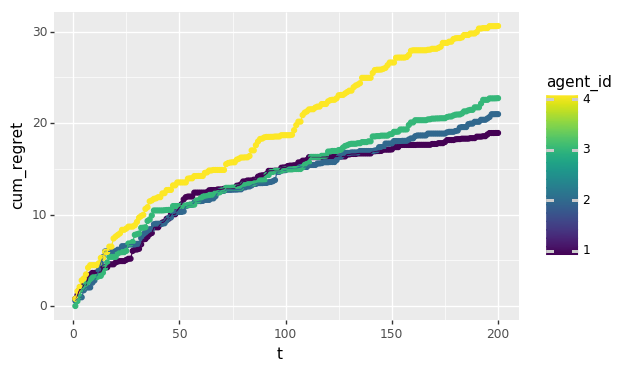

<ggplot: (8752994366345)>


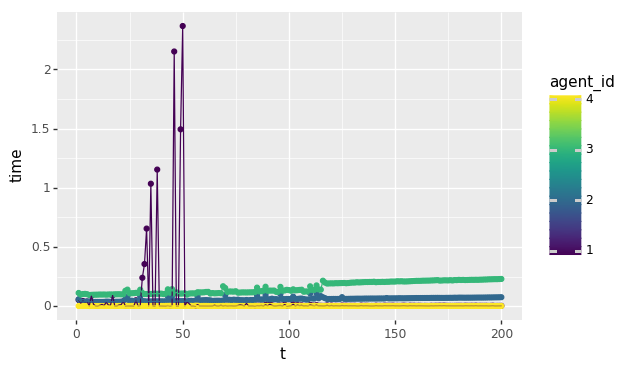

<ggplot: (8753093894605)>


In [4]:
for seed in [10]: #range(1):
    agents = [make_laplace_agent()] +\
             [make_langevin_agent()] +\
             [make_mala_agent()] +\
             [make_pgts_agent()]
    results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=1)

#results, df = simple_compare_laplace_langevin(num_articles, dim, theta_mean, theta_std, epsilon1, epsilon2, step_count, step_size,
#                                   alpha, beta, tol, n_steps, seed=98, verbosity=1)




theta [-0.41675785 -0.05626683 -2.1361961   1.64027081 -1.79343559 -0.84174737
  0.50288142 -1.24528809 -1.05795222 -0.90900761  0.55145404  2.29220801
  0.04153939 -1.11792545  0.53905832 -0.5961597  -0.0191305   1.17500122
 -0.74787095  0.00902525]
Experiment: Step 0
 Laplace sample: array([-1.85040397,  0.33048806, -0.31569321, -1.3500021 , -0.698171  ,
        0.2399512 , -0.55294944,  0.29952681,  0.5526637 , -0.84044301,
       -0.31227067,  2.14467809,  0.12110558, -0.84682875,  0.06046245,
       -1.33858888,  1.13274608,  0.37030484,  1.0858064 ,  0.9021794 ])
 Sample: array([-1.01701704, -0.81657063,  0.75835302,  0.28646156, -0.05279812,
        0.63665625,  0.06133594,  0.26719521, -0.67196941,  0.83615305,
       -1.22221433, -0.09839914, -1.67769808,  0.28909853,  0.68545656,
       -1.44524497,  0.11941089, -1.00231934, -1.19269128, -0.06695958])
 Sample: array([-0.64889284,  0.61653932, -0.28569061,  0.53935444, -1.14047557,
        0.06757803,  0.97720021,  0.96562483,

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.46843033, -1.32600688,  3.01591838,  0.41686058, -0.5270391 ,
        0.72468901,  0.53527359,  0.29977583, -0.91177707, -0.12405104,
        0.92777352,  1.79451956, -0.89212818, -0.61148337, -0.78094592,
        0.5330784 ,  1.81594736, -1.10729696,  0.0567799 ,  0.47932359])
 Sample: array([-0.2853454 , -0.61758634, -1.43999005,  0.13103388,  0.15948872,
       -1.19646824, -0.01957404,  0.16403894, -0.34749132, -0.30301612,
       -0.20480036,  0.56686085,  0.57975002, -1.466577  ,  0.33167217,
       -0.0514784 , -0.09974284,  0.73236663,  1.04492648, -0.20823094])
 Accept proportion: 0.762500
 Sample: array([ 1.98478975, -0.79977641, -0.00828541,  0.56962147, -0.73668139,
        0.30061048, -0.24944941,  2.21644147, -1.2619095 , -0.15616273,
       -0.18630243,  1.33493122, -1.65589271, -1.2078888 ,  1.00096261,
       -0.10522905,  0.97405325,  0.24232687,  1.44083814, -0.82227484])
Experiment: Step 3
 Laplace sample: array([-0.378695  ,  0.7515871 , -1.74346

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.46989936,  0.58671797, -0.01478329, -0.07606469, -0.01713026,
       -0.08776215, -0.31991366,  0.42150576, -0.50272032, -0.37487795,
        0.2582535 ,  0.64978373, -0.15261507,  1.10419722,  0.55099668,
       -0.21812907,  0.34219272,  0.48447058, -0.41649533,  0.24470721])
 Accept proportion: 0.725000
 Sample: array([-0.65456418, -0.72150216, -0.01365838,  0.07960123,  0.20770865,
        0.09568572, -0.8167714 ,  0.69114398, -2.18204552, -1.56682074,
        0.33638596,  0.76257491,  1.84710684,  0.53559978,  0.06354906,
        1.65316067,  0.82318443,  0.56998169,  0.78272892, -0.06117941])
Experiment: Step 4
 Laplace sample: array([-2.670428  ,  2.9790472 , -2.08616322,  4.8284662 , -0.16603472,
        0.72588628, -0.38670135, -1.35744657, -0.28536945, -0.12922263,
        2.243961  ,  4.20673422,  0.61964901, -1.89265143, -0.58438119,
       -0.9350817 , -0.18948241,  1.17903101, -1.39211325,  0.60286983])
 Sample: array([-0.25060465,  0.51072812,  0.37562

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.1364758 , -0.3424049 ,  0.81074199, -1.04897212,  0.31772356,
       -0.33559182, -1.08347526,  0.00172481,  0.45822275, -1.0386947 ,
       -1.63616496, -0.37115079,  0.57414741,  0.10110282,  0.82150081,
       -0.27081562, -0.27709897, -1.50984484,  0.25223221, -0.38682264])
 Sample: array([-0.36739659,  0.17742218, -1.57698498, -0.53225661, -0.27826886,
       -0.06013046, -0.55636817,  0.4919541 ,  0.43169358,  0.29902971,
        0.52465168,  0.87931885,  0.37247508,  1.07052925,  0.70610705,
        0.00211327, -0.92259316, -0.50342529,  0.35281738,  0.73721041])
 Accept proportion: 0.740000
 Sample: array([ 0.24428832,  0.91391072, -0.12693285,  0.02207066,  1.58142986,
       -1.57463266,  0.5811795 ,  1.13808494, -0.66590801, -0.65204605,
       -1.66008225,  1.76246525, -0.01535302,  1.37275635,  1.72851538,
        1.29939195, -0.00509162, -1.3226933 , -1.40629043, -0.13085741])
Experiment: Step 6
 Laplace sample: array([-5.00023941,  1.81038016, -1.58386

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.52589151,  1.48461885, -0.08870417, -0.479561  , -0.22304869,
        0.1599603 , -0.43010353, -1.6586441 , -0.7262417 ,  0.76544851,
       -1.00754731,  1.02704049, -0.83068534, -1.12474665,  0.23416039,
       -1.44203514,  0.5127674 ,  1.77457918,  0.77475493,  0.3097954 ])
 Sample: array([-0.16391584,  0.02571843,  0.07148677,  0.0117687 ,  0.14883367,
       -0.3268171 ,  0.45038755, -0.49820535, -0.68452509,  0.3883609 ,
        0.21075455,  0.31084486,  1.19826083, -0.14345184,  0.54652496,
        0.24700172, -0.14447954,  0.44857569,  0.50701562,  0.46735731])
 Accept proportion: 0.792500
 Sample: array([ 0.15542793, -0.8071558 , -0.17573084,  1.2753711 ,  0.47881899,
       -0.11509674,  0.21486596,  0.10051761,  0.48023741,  0.25385901,
       -0.26388044,  0.09307642, -1.53605773,  0.93451574,  0.96280688,
        0.1868208 ,  1.58168624,  0.49601912,  1.14131721,  0.15452962])
Experiment: Step 9
 Laplace sample: array([-2.80816349,  3.21644317, -2.12178

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.56259746, -0.14282153,  0.28693337, -0.56736751, -1.77994949,
        0.89225945, -0.53131203,  0.07150549, -0.21086849, -0.35844209,
       -0.19972722,  1.80033322,  0.33342835,  0.14419841, -0.97363312,
       -0.53578168, -0.09997704, -0.49989191,  1.08683299,  0.33453239])
 Sample: array([-0.73471248, -0.07987562,  0.64986681,  0.68002191,  0.16773959,
        0.11482343,  0.36158119,  0.32337726, -0.60686506, -0.22743432,
        1.35343915,  1.00915348,  0.06038681, -0.83295464,  0.74304041,
        0.1275534 , -0.00147457, -1.33121949,  0.26485819, -0.09533089])
 Accept proportion: 0.767500
 Sample: array([-0.45765653,  1.3832115 ,  0.9905034 ,  0.1598196 , -3.34285447,
        0.41736807, -0.18534373, -1.42196713, -0.19774977, -0.3424247 ,
        1.16399595, -2.09438945,  0.51421917, -0.46708107,  0.63140289,
       -1.94648627,  0.59890472, -0.00611817,  0.41515265, -0.37862701])
Experiment: Step 10
 Laplace sample: array([-3.34045534,  6.79566667, -2.8244

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.27921711, -0.63544924, -0.41640285,  0.28269314,  0.3875224 ,
        1.04340847,  0.49383552, -0.20657263, -0.24331444, -0.17444146,
       -0.78476544,  0.7542539 ,  0.2436621 ,  0.347173  , -0.44422949,
        0.76664615, -0.2785222 , -1.02345655,  0.04566001,  1.39110808])
 Accept proportion: 0.770000
 Sample: array([ 0.59188457, -0.21917091,  0.34464563, -0.08761381, -0.77240949,
        0.3907994 ,  2.2697672 ,  0.32437174, -1.10874371, -1.95111923,
        0.72343287, -0.02289825, -1.62885937,  0.81688131, -0.0834393 ,
       -0.30450724,  0.51341727,  0.57560949,  0.51057122, -0.89966392])
Experiment: Step 11
 Laplace sample: array([-1.25270512,  4.53885656, -1.32422774,  2.61740863,  0.29141315,
       -4.56513098,  2.9006798 , -3.27419735,  1.9961037 , -2.4557975 ,
        2.78080488,  2.66985329,  4.59727752, -1.47858301, -2.10976641,
        4.16166451,  3.43686301,  6.02807471, -6.55952573,  5.15357136])
 Sample: array([-0.27950339, -1.22994926, -0.6763

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.50932404,  0.13181214, -0.07592075, -0.94655553, -0.55302156,
       -0.28223369, -0.10392083, -0.21087702, -0.42770223, -1.16226434,
       -0.55503087,  0.23412276,  0.34287209, -0.80957421, -0.37836035,
       -0.85962198,  0.00180934,  0.17121301,  0.05661945,  0.37505705])
 Accept proportion: 0.727500
 Sample: array([ 0.39604843,  0.38711981,  1.12416278,  0.96092644,  0.49081197,
        0.27783392, -1.46523455, -0.77712382,  0.06972535,  0.64549092,
       -0.48224935, -1.6199891 , -0.49474129,  0.58105048, -0.38163395,
       -1.94175597,  0.08566547, -0.98978155, -1.67043697,  1.19947453])
Experiment: Step 12
 Laplace sample: array([-1.56161425,  4.82465305, -1.94418212,  3.06288334, -1.09854832,
       -2.26022494,  1.73416546, -3.96624497,  2.72684235, -1.40307802,
        1.64870242,  3.99204841,  4.04009658,  0.82677827, -2.81906947,
        3.49220288,  4.47302   ,  7.57680196, -5.47381631,  5.68181162])
 Sample: array([ 0.87130125, -1.39863562, -0.2962

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.16026062,  1.83222277, -1.6144243 ,  0.33888473, -0.57636892,
        0.55815794, -1.22526472,  0.39188111, -1.58557395,  1.2996863 ,
       -2.76910953, -0.84919556, -0.20567184,  0.58712351, -0.95741109,
       -0.62462404, -1.11061392,  1.03671288,  0.48117104,  2.13340287])
 Sample: array([-0.01807719, -0.01623106,  0.49650413, -0.86969758, -0.73530298,
        0.26475696, -0.22353839, -0.29775059, -0.52951494, -1.06319731,
       -0.00854208,  0.28779483, -0.63236189, -0.0579919 , -0.55491859,
       -0.76098044,  0.50504359,  0.50925023, -0.99227688,  0.91283262])
 Accept proportion: 0.755000
 Sample: array([-0.34807262, -0.21172517, -0.85590902, -0.54802873, -0.21882193,
        0.1033755 ,  1.1952758 , -2.00998453, -0.33399746, -0.44950128,
       -0.04270756,  0.07141077,  0.16859658, -0.06582657, -0.45124705,
       -0.81278827,  0.57366895,  0.12380521, -0.12066913,  0.73159415])
Experiment: Step 14
 Laplace sample: array([-3.44904917,  5.72245538, -2.2769

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.01961469,  0.2337223 , -0.6889622 , -0.16290404, -1.11204178,
       -0.20094669, -1.70941361, -1.70327978, -0.04828217, -0.82487197,
       -0.45993557,  0.60362121,  0.62930412,  0.17181995, -0.20602865,
       -0.59343483,  0.06694676, -0.29701475, -0.2870165 ,  0.18330311])
 Accept proportion: 0.772500
 Sample: array([ 0.40915998, -0.04488312, -1.69016324,  0.25834053,  0.07320611,
        0.93568357, -0.52047011,  0.34718331, -0.68982785, -0.09013504,
        0.39619629,  0.36227   , -0.92264387,  0.01005123, -0.37955027,
        0.77165053,  1.45728869, -0.12853287,  0.45082751, -0.36509152])
Experiment: Step 15
 Laplace sample: array([-2.52093743,  4.78861453, -2.34859831,  1.65637001, -2.71087708,
       -4.58591053,  2.99427918, -3.05614225,  1.56576777, -0.38453999,
        1.94900678,  3.12598384,  5.05739353, -0.86087803, -3.02294836,
        4.19664665,  3.68720718,  6.00098261, -6.59532489,  4.67210459])
 Sample: array([-0.8740131 , -0.10603337, -0.6541

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.11816653, -1.52021494, -0.70264001,  0.08907808, -0.89614039,
       -0.70715386, -0.72422183,  0.06435052,  0.43417817, -1.28220958,
       -0.208336  ,  1.24239808,  0.11481492,  0.28224732, -0.43807179,
        0.13582353, -0.93838352,  0.72063963, -0.38087247, -0.1501212 ])
 Sample: array([ 0.18962209, -0.13109685, -0.58199845,  0.09651953, -0.44749878,
        0.64721824, -0.09577425, -0.62988548,  0.67993992, -0.41988982,
        0.61345895,  1.02169476,  0.24551622, -0.21941324,  0.24992712,
       -0.78885937,  0.72214575, -0.479105  , -0.76572216,  0.3008644 ])
 Accept proportion: 0.740000
 Sample: array([-1.70219041e-01, -1.70597012e+00, -1.40498649e+00,  3.03482015e+00,
        9.10626694e-04,  2.12632475e+00,  2.22574486e+00, -2.54782223e+00,
       -5.14223427e-01, -5.64461403e-01,  8.35609142e-01, -1.08465400e+00,
       -3.41709710e-01, -9.72609988e-01,  6.82121896e-01, -2.14146765e-01,
       -8.52968064e-01, -3.56144369e-01,  6.69804755e-01, -7.11922

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.71197391,  0.86543479, -0.59306479, -0.19243091,  0.08884391,
       -0.06617199,  0.02699419, -1.15445716,  0.60077226, -0.22096144,
       -0.68126219, -0.13226482,  1.14216263,  0.36648819,  0.73025933,
       -0.53663307,  0.60410822,  0.04606701, -0.30788295,  0.62608172])
 Accept proportion: 0.770000
 Sample: array([ 1.65252013,  0.54313655, -0.38143731,  0.66963808, -0.02355004,
       -1.28549996, -0.53064117, -0.07000122,  0.23040205,  1.22016414,
       -0.43113642, -0.46676389, -0.19486137,  2.15006546,  0.27348814,
       -1.80297862,  1.05700748,  0.32774221, -0.21458006,  0.61002432])
Experiment: Step 18
 Laplace sample: array([ -2.08412661,   2.7610727 ,  -2.00708727,   5.73878562,
        -3.79608834,  -1.38437449,   3.72863399,  -7.2509124 ,
        -1.00966413,   4.90045636,  -3.35133442,   2.76993758,
         4.97874202,  -0.61805211,  -5.56789836,   3.92185695,
         6.46953343,   6.38888029, -10.95908569,  11.44364354])
 Sample: array([ 0.895

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.61324661, -1.05881083, -0.43495794,  1.41831689, -0.91120484,
       -0.24326715,  0.91423515, -0.68492702,  1.05453716, -0.83972897,
       -0.98937121, -0.114865  ,  0.39718497, -0.23727713,  0.73670502,
       -1.73191016, -0.52451644,  2.08628585,  0.52421395, -0.36271599])
 Sample: array([ 0.86915413,  1.10333347,  0.24978459,  0.67485398, -1.10913402,
       -1.25585047,  0.27080076,  0.30730355,  0.6226517 , -0.35544358,
        0.49603167,  0.05575808,  0.90738167, -0.27932676, -0.36982112,
       -0.7865624 ,  0.86994553,  0.53813459, -0.24501624,  1.07717209])
 Accept proportion: 0.772500
 Sample: array([ 0.34775796,  1.16348789, -1.1292409 ,  0.84697103,  0.48882392,
       -0.32384753,  0.08578097, -1.18049006, -0.08071874,  0.17657063,
        0.22465742, -0.63865787,  0.62509048,  0.42784978,  0.93935426,
       -1.61893143, -0.15334354,  0.78143069,  0.60099344, -0.75412946])
Experiment: Step 21
 Laplace sample: array([-2.93554881,  0.76595882, -3.6309

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.57665073, -0.39396577,  1.06986786, -0.24848687, -1.77521983,
        0.61511762,  1.44328464, -0.46336127, -0.41874306, -1.20209114,
       -0.40631036,  0.18443712, -0.48583897, -0.80504591, -1.23337847,
       -0.21834052,  0.86897803,  0.29999348, -0.96990404,  0.18360128])
 Sample: array([ 1.48095207,  1.20419775, -0.22219974, -0.30530336, -0.49821163,
        0.21326931, -0.00509186, -1.32379068,  0.0343926 , -0.44025836,
        0.52371386, -0.22806821,  0.38682795, -0.72932458,  0.00170079,
        0.89016506,  0.25779386, -0.11485429, -0.10122675,  0.05121085])
 Accept proportion: 0.785000
 Sample: array([ 0.00217201,  0.05636435, -0.47215322,  0.83754732, -1.05212172,
       -0.36940231,  0.03768096,  0.48631081, -0.53589674, -0.31697017,
        1.23978327, -0.96014687,  0.41915161, -0.71840752, -0.16412001,
       -1.62727164,  1.41628501,  0.93978629, -1.70125911, -0.04529873])
Experiment: Step 22
 Laplace sample: array([ -0.63821393,   5.29218077,   1.0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.39106955, -0.04651574,  0.11878577, -0.12081512, -1.24080629,
       -0.8257428 , -0.0216123 ,  0.21431111,  0.18498034, -0.73705775,
       -0.291717  ,  0.45621081,  1.39203335, -1.0026579 , -0.30756156,
        0.07597674,  0.13956834,  1.06253146, -0.72457046,  0.0257544 ])
 Accept proportion: 0.805000
 Sample: array([ 0.39744138, -1.33997941, -2.07764664, -1.0780533 , -1.92758612,
       -0.36145124, -0.93506407, -0.17885589, -0.24733257,  0.20564401,
       -1.74803053, -1.26794716,  0.36404959, -0.12842557, -0.03670886,
        0.96666346,  0.28426551,  0.70784127, -1.45411207, -1.01242   ])
Experiment: Step 23
 Laplace sample: array([  1.1449828 ,   1.97139079,  -2.17725243,  10.41524113,
        -4.28845238,  -0.32304246,   2.70848397, -10.0042901 ,
        -4.03323298,   4.2638845 ,  -3.53787556,   3.94035358,
         7.21759653,   3.04399173, -10.14619014,   4.10846441,
         5.11852495,   3.97691092, -12.94231855,  10.33998673])
 Sample: array([-1.453

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.30955132,  0.74820375, -0.63249991,  1.49332236, -0.8063429 ,
       -0.01740027,  0.2819695 , -0.18279457, -0.33862385, -0.38395831,
       -0.84754415,  0.71082343, -0.73978122, -1.27208805,  1.74101797,
       -1.75795412, -0.61358853,  0.93705696,  0.50142661,  0.37554708])
 Sample: array([-0.07596553,  0.52857879, -0.63802786,  0.03275078, -1.51383594,
       -1.04998847,  0.55217841, -0.16726401,  0.2906295 , -0.63959164,
       -0.46800494,  0.21084665,  0.30283907, -0.23526148,  0.43838078,
        0.1564201 ,  0.21703456, -0.57571944, -0.29316267, -0.20123872])
 Accept proportion: 0.790000
 Sample: array([ 1.63334581,  1.12339114, -0.82835532, -1.23027423, -1.19167563,
       -0.682933  ,  0.12343999, -0.64230125, -2.46678393,  0.43825453,
        0.35339108,  0.72250044, -0.12664   , -0.19155908,  2.11914826,
       -1.81751041,  1.6073635 ,  1.62590788,  0.19449192, -0.63229169])
Experiment: Step 25
 Laplace sample: array([  1.96817376,   2.06608836,  -0.2

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.09441648,  1.27209007, -1.04411337, -0.07502046,  0.96195836,
       -0.22906577, -0.4497792 , -0.4159209 , -2.033478  , -0.36006622,
       -1.15651677,  0.72457558, -1.09367237, -0.25555151,  1.05169603,
       -1.39263374, -0.017199  ,  0.14243454, -0.11734822, -0.40495567])
 Sample: array([ 0.01930291,  0.65935769,  0.02033609,  0.06298808, -0.18511749,
        0.19485293,  0.29072125,  0.02641684, -0.24195087, -1.57780126,
       -0.42009722,  1.4334796 ,  0.56211326, -0.43006957, -0.12884107,
       -0.37113594,  0.5036757 ,  0.56022762, -1.02653866,  1.32290551])
 Accept proportion: 0.817500
 Sample: array([ 1.04496134,  0.53976213, -1.22169048,  0.89107225, -0.13557362,
       -0.94633058,  0.85550848, -0.35642114,  1.70625549, -0.67952929,
        1.43321957,  1.18751263, -0.71680714,  0.24313014,  0.58322277,
        0.51253956,  2.15510775,  1.17298033, -0.47509402,  0.65852758])
Experiment: Step 26
 Laplace sample: array([  0.24293646,   0.77592222,  -9.1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.77476216,  0.79857167, -1.19103505, -0.78716576, -1.4354056 ,
       -0.77047596,  0.53954768,  0.42250028,  1.43401937,  0.44034852,
        0.15924874,  0.29821171,  0.5531914 , -0.48060445, -0.02769787,
        0.21239598,  1.02127203, -0.12921759,  0.82151183,  0.37087814])
 Accept proportion: 0.765000
 Sample: array([-0.38689362,  1.25474945, -0.39078967, -0.40765753, -1.29367349,
       -0.79234078, -0.39858761,  0.7597047 , -1.16716282, -0.68282775,
        0.56523749, -1.23788408,  0.10449946, -0.12766171, -0.89428422,
       -0.9365513 ,  0.72752912,  1.66985733, -0.8654083 ,  1.20201904])
Experiment: Step 27
 Laplace sample: array([ -1.8484668 ,   2.28688055, -10.11870906,  14.65582526,
       -13.10587934,  -0.07296624,  15.8801723 ,  -8.70966639,
       -10.61014898,  -0.79298997,  -1.43860277,   9.91029315,
         6.33891438,   6.24766619,  -9.21421972,   8.58795807,
         9.76465046,   3.96938626, -14.70738266,  12.0866779 ])
 Sample: array([-2.533

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.44004185,  1.69872501, -0.25207456,  0.67979328, -0.36684626,
       -0.98950775,  1.30446483, -0.14774008,  0.5522741 ,  0.83302939,
       -0.82050512,  0.56866019, -0.22029741,  1.10109125,  0.14360845,
       -0.62638305, -0.76961852,  0.96287823,  0.20777429,  1.09674903])
 Sample: array([-0.05838979,  0.84590997, -0.14617394, -0.75797809, -0.03843204,
       -0.33291034,  0.39038165, -0.2711139 ,  0.1336265 , -0.37042942,
       -0.4711234 ,  1.68259532,  0.74074701, -0.52445921,  0.81428671,
        0.81881484,  0.97231934,  0.54385571, -0.8561815 ,  0.57912762])
 Accept proportion: 0.792500
 Sample: array([ 0.30864195,  0.17963974, -1.67580784,  0.34305673,  0.18188019,
        1.34407512,  0.54612816, -0.00761212, -0.5524955 , -0.24317745,
        1.22987936,  0.02007165, -1.07904428,  0.52790095,  1.6129683 ,
        0.27127731,  0.53894573,  1.01003724, -1.1360849 ,  0.78053591])
Experiment: Step 29
 Laplace sample: array([ -3.51070719,   0.46360867,  -8.8

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.98023387, -0.38110198, -1.35573884,  1.01426557, -1.01131123,
       -1.20961739,  0.30336344, -0.5308483 ,  0.76877026,  0.52817988,
       -1.73318725,  2.31112655,  0.97230307, -0.07517262,  0.45870999,
       -0.84863675,  0.62946989,  0.29242716, -0.64956182, -1.23972521])
 Sample: array([ 1.19560372,  0.75481988, -0.94854624,  0.17851897, -0.66012827,
       -1.29564814,  0.82665712,  0.07923397, -0.03593689,  0.76149611,
        0.54817756,  0.6651772 ,  1.42512576, -0.88329991,  0.60260146,
       -0.74324359,  1.26738819,  0.56735266, -0.00239281,  0.51032275])
 Accept proportion: 0.797500
 Sample: array([-0.63560837, -0.01434282, -1.49708475,  1.14516645, -1.31496167,
       -0.6388074 ,  0.43389506, -0.7646023 ,  0.52692744, -0.39054709,
        1.3403401 ,  0.03020103, -0.75263395,  0.85678647,  0.85581805,
       -1.04860379,  0.90894493, -0.68124911,  0.90179295, -1.44861212])
Experiment: Step 30
 Laplace sample: array([ -1.37899287,   0.92097429,  -7.6

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.26802182,  0.81392839, -1.19298321,  0.57750827, -0.22906954,
       -0.27121452,  0.30132376, -1.04399455,  0.97719046,  0.72007527,
       -0.01792224,  0.31318444,  0.83476913, -1.07330479,  0.32326885,
        0.15304515, -0.05349102,  0.348999  , -0.71428329,  0.71960525])
 Accept proportion: 0.752500
 Sample: array([ 0.7785646 ,  0.74088787, -1.67929389, -0.09583299, -0.99470926,
       -0.43278612,  0.51986546,  0.91149686, -0.32227702, -1.48752805,
        0.64121892,  0.01258556, -0.18432572,  0.67765266, -0.0201133 ,
       -0.23107502,  1.88163801,  1.2600057 , -0.64815649,  0.25179091])
Experiment: Step 31
 Laplace sample: array([ -2.11892834,   0.90528716,  -8.80448962,  13.38215767,
       -10.42784364,  -0.41070033,  17.7166122 ,  -8.11074404,
       -11.44274878,   1.05901398,  -2.95194857,   9.06096347,
         5.90932078,   6.06943956,  -9.31307855,   5.48334341,
        11.23227366,   3.10791215, -14.78922274,  13.68528014])
 Sample: array([-0.772

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.24178737, -0.36013509, -1.01565394, -0.12276759,  0.06160507,
       -0.81568978,  0.28829127, -1.99873248,  0.85300608,  1.40665373,
       -1.1341617 ,  1.0990847 ,  0.51309588,  0.30718312, -0.01042039,
       -0.87408303, -0.22496458,  0.36631728,  0.58738467, -0.45393424])
 Sample: array([ 0.03846114,  0.81591397, -0.96800918,  0.20338867, -1.71635236,
       -0.15591584,  0.49804662, -0.14315292, -0.14219071, -0.96114733,
       -0.19553004,  0.74160615,  0.750862  , -0.52990394,  0.32243767,
        0.28510038,  0.45818441, -0.18653639, -1.07845837,  0.22537539])
 Accept proportion: 0.787500
 Sample: array([ 0.56373367,  1.21508082, -1.0171709 ,  1.55412309, -1.14169663,
       -0.53327961,  1.19492719, -0.77205237, -1.45048028, -1.35916479,
        0.77586939,  0.38996559, -0.75735435,  0.39292087,  0.92395318,
        0.22277089,  1.12386412,  0.70603589, -0.26637019, -1.04615982])
Experiment: Step 34
 Laplace sample: array([ -0.66534217,   1.0625346 ,  -9.2

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.73942839, -0.47646567, -0.5999051 ,  0.22980876, -0.25231235,
       -0.01126966, -1.50867817, -1.30415371,  0.09309475,  1.42664101,
       -0.4916892 ,  2.03818326,  0.97419379,  0.56283269, -0.28203149,
       -0.60484603,  0.10123801, -0.10182233, -1.02347147, -0.33590567])
 Sample: array([ 0.06677648,  0.55405319, -0.77188644, -0.18629552, -0.10428506,
        0.68189106,  0.15136064, -0.25325013,  1.03088345, -0.74115197,
        0.73880089,  0.32514482,  1.79858468, -0.84651084,  0.12728408,
       -0.04410903, -0.59114755, -0.42574647,  0.46980257, -0.22132667])
 Accept proportion: 0.802500
 Sample: array([ 0.9321013 ,  0.52299799, -0.50326812,  1.79094316, -0.01151932,
        1.26213633,  0.25080449,  0.00842011, -0.63030091, -1.36632252,
        1.8535015 , -0.38729547, -0.34789591,  0.4336246 ,  1.08106935,
       -1.07581629, -0.02659667,  1.64665706, -1.02224087,  1.20651979])
Experiment: Step 35
 Laplace sample: array([ -4.44012142,  -5.89436819,  -2.5

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.46142962,  0.93218879, -0.5498647 ,  0.0698225 , -0.56389488,
       -1.2261705 ,  0.18127458,  0.1098058 ,  0.32426803,  0.41805622,
       -0.81045346,  0.61598387,  0.47878679, -1.35196902,  0.602431  ,
       -0.77555708,  0.55818067, -0.0827392 ,  0.59387819, -0.13681894])
 Accept proportion: 0.770000
 Sample: array([ 0.93690378,  1.15615163, -0.83342112,  0.5953161 , -1.04890112,
        0.91886813,  1.15171374,  0.69321073, -1.74749971, -2.54678183,
        0.56309044,  0.07978594, -0.1238086 , -0.10114126,  0.17253624,
        0.32893923,  1.39973405,  1.67012773, -1.39657924, -1.06269299])
Experiment: Step 36
 Laplace sample: array([ -3.43663192,  -6.58380018,  -5.0746536 ,  19.52912173,
       -19.05912914,  -2.87347126,  10.09788515, -10.99144347,
       -11.22232503, -13.15791426,  -8.16552775,  12.7481411 ,
         6.02542851,   6.56608487,  -4.78205962,   9.28953424,
        17.84483655,  14.53548589, -15.25723243,  10.28114266])
 Sample: array([ 0.256

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.62269025, -0.19676919,  1.59596954,  0.88058889, -1.03626913,
       -1.21804432,  0.93152877,  0.49821032,  1.4440289 ,  0.60865109,
       -0.35835791,  0.70432902, -0.57908965,  0.39576708,  1.32108691,
       -1.40347052, -0.84176912,  1.38449067, -0.63727031, -0.7482259 ])
 Sample: array([ 0.06300879,  0.92585462, -1.03564128, -0.46116122, -0.31344723,
       -0.53205957, -0.67661787, -0.27487859, -0.31722892, -0.31552476,
        0.34992898,  0.55675749,  1.02367836, -1.31760627,  0.39219315,
       -0.37252121,  0.3713561 , -0.0179891 , -0.13222155,  0.20990236])
 Accept proportion: 0.787500
 Sample: array([-0.48805584, -0.36323523, -0.77220836,  0.22906521, -1.96339485,
       -1.0800796 ,  0.18311126,  2.09491984, -0.47100697, -0.14369536,
       -0.46958813, -0.16006295,  1.12936539, -0.72899569, -0.08818288,
        0.14632651,  0.66162868,  0.08574725, -0.51297053,  0.27140575])
Experiment: Step 38
 Laplace sample: array([  3.45998573, -13.72665919, -11.9

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.61859928,  1.27216938, -0.12439474, -0.58153606, -0.32113513,
       -0.38859723,  0.49283289, -0.44470618,  0.66582729, -1.08105717,
        0.15862405,  1.31156497,  0.09637551, -1.11470237, -0.37586962,
       -0.06540055, -0.32079776,  0.04266567, -0.09109293, -0.31172887])
 Accept proportion: 0.827500
 Sample: array([-0.39520491,  0.25977826, -0.0311957 ,  2.64828322, -0.66079717,
       -0.42998156,  2.1893433 , -0.47477763,  0.28485819, -0.2163783 ,
        0.6289906 ,  0.9249184 , -0.00768021,  1.09553367,  0.18217712,
        0.87208135,  1.21431753,  1.38930144,  0.5966792 ,  0.78703459])
Experiment: Step 39
 Laplace sample: array([  6.46129009, -13.8445801 ,  -9.35482618,  15.53379336,
       -28.88846026,   1.79111897,  -0.8542858 , -16.24200159,
       -15.48994078, -27.21089453,  -8.25513043,  15.30622011,
         1.49270681,   7.46563014, -13.60469169,  12.89465012,
         3.50410547,   7.33432459, -11.513399  ,  20.89101549])
 Sample: array([-0.755

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-2.09731902, -0.19363715,  0.82577232,  0.35701685, -1.83374937,
       -0.82749325, -0.96637487, -0.56548114, -0.24610763, -1.13253671,
       -1.08981847,  0.8817788 , -0.74209245, -0.5466363 ,  1.11056657,
        0.65714513,  0.05914897,  0.05857741, -1.37245398, -0.40919371])
 Sample: array([ 0.02201429,  0.49001921, -1.24413095,  0.45153177, -0.65423835,
       -1.05825413,  0.05020477, -0.02737291,  0.72330113, -0.12175803,
        0.36324756,  0.61678102,  1.57939547, -0.51401543, -0.02778319,
       -0.37370679,  0.22027473, -0.17923932, -0.32066601,  0.43754785])
 Accept proportion: 0.782500
 Sample: array([-0.29324581,  0.10604385, -0.72108057,  0.96137851, -0.10397409,
       -0.43129311,  0.80587188,  0.6754695 ,  0.31734968, -0.5466907 ,
       -0.61503399, -1.81243325,  0.80351952,  0.60388258,  0.05677653,
        0.25416673,  0.5195988 ,  0.86773004,  0.6523108 , -0.11570655])
Experiment: Step 41
 Laplace sample: array([  5.74416483,  12.36832862,  -7.6

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.1293525 ,  0.23630164, -1.17025052,  0.1348611 , -2.91033993,
       -0.81681513, -0.68675096,  0.93875468, -0.06240533, -0.63979711,
       -0.15283279,  0.3347223 ,  0.34612244,  0.37340564,  1.14238415,
        0.47900498, -0.12163494,  1.66574558,  0.0303891 , -0.27168308])
 Sample: array([-0.13743895,  1.35644559, -0.66305872, -0.314975  , -0.72628597,
       -0.80199169, -0.33971745, -0.66508658,  0.68446924, -0.78256787,
       -0.1437954 ,  1.32725282,  1.04210364, -0.29221344,  0.06736396,
       -0.91501234,  0.62548005,  0.2431339 , -0.39761103, -0.05654552])
 Accept proportion: 0.790000
 Sample: array([-0.37893348,  0.05250068, -1.81193114,  1.55522423, -1.75493325,
        0.38786288, -0.18390256,  0.25754802, -0.60073627, -0.81968707,
        1.13036858,  0.04947036, -0.83952349,  0.13262015, -0.53641972,
       -0.05238236,  0.2283122 ,  1.51756792, -0.79852065,  0.19575269])
Experiment: Step 42
 Laplace sample: array([ 19.65912937,  45.7715146 , -19.6

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.04737325,  0.5374483 , -0.63474765, -0.11954104, -1.01666104,
       -0.33181134, -0.28239935, -0.80585598,  0.49264294, -0.26777313,
       -0.08043265,  1.44237071,  0.95505623, -0.39070526,  0.62981275,
        0.77870653,  0.63814161,  0.4573863 , -0.51940632,  0.04082911])
 Accept proportion: 0.812500
 Sample: array([-0.03072896, -0.5511416 , -2.26265526,  1.5012782 , -0.29097318,
       -0.19741886,  0.38993817,  0.99582071, -1.07934721,  0.41662744,
        1.31265201,  0.55740496, -1.32943639,  0.04158737, -0.128212  ,
        0.07977595,  1.06875133,  0.54587837, -2.07435227, -1.62804793])
Experiment: Step 43
 Laplace sample: array([ 20.65692596,  46.3925881 , -21.23970949,  15.13451529,
       -72.39260014,   9.7710495 ,  -7.28115851,  -3.64013345,
       -27.40847799, -71.88773496, -39.27468123,  43.73165707,
       -53.09511756,  20.67249199,  -5.44299971,  -4.7187137 ,
        39.022492  , -16.61954419, -60.47885128,  40.28818882])
 Sample: array([-0.316

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.37578155,  1.22803297, -0.72841644,  0.40157701,  0.09201205,
       -0.62330702,  0.39332765, -0.53296134,  0.55307799, -0.3453538 ,
        0.27858678,  0.1845816 ,  0.69575771, -0.0099271 , -0.00651941,
        0.04120578,  1.15931441,  0.05387055,  0.47691101,  0.20923887])
 Accept proportion: 0.807500
 Sample: array([-0.03085298,  0.0701639 , -1.54978008,  0.23279617, -0.70858882,
       -0.24953068,  1.09035153, -1.90080422, -0.33921314, -1.08354166,
        1.63235193,  0.04506719,  0.91327164,  0.23588303, -0.1204347 ,
       -0.41266339, -1.21138719,  2.9715814 , -1.21820978,  0.851462  ])
Experiment: Step 45
 Laplace sample: array([ 21.53030572,  44.97659685, -20.51557016,  13.53918641,
       -70.11443961,   8.72107225,  -6.49050577,  -4.73711293,
       -26.75851236, -71.89727241, -39.73953967,  47.42368634,
       -52.17327479,  20.48070323,  -5.18933913,  -4.06246679,
        39.56888394, -15.73986352, -60.93748753,  36.87569425])
 Sample: array([-0.271

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.76102329,  0.99126342, -0.01871251,  0.14976058, -1.44609653,
       -0.4639134 , -0.41326551, -1.11588162,  0.48829937,  0.0662046 ,
       -0.83022064,  0.68360761, -0.19170924,  1.52567181, -0.04245308,
       -0.92713221,  0.74635667,  1.12063424,  0.03013423,  1.15052322])
 Sample: array([-0.0356179 ,  0.58251433, -0.86814488,  0.30686502, -0.99468171,
       -0.86758585,  0.0860903 , -0.62526075,  0.71433342, -0.20099117,
        0.78521014,  1.47858829,  0.77203591, -1.09035479,  0.77716166,
       -0.35083423,  0.48931135,  0.18501168, -0.61334478, -0.13830908])
 Accept proportion: 0.780000
 Sample: array([-0.07467602,  1.07669984, -0.45087306,  3.05445873, -0.77500883,
       -1.15968115,  0.40251141, -0.37811495, -1.15972728, -0.09760662,
        0.58729549,  0.88508939, -0.37546343,  1.27553175,  1.26370619,
       -0.52846685,  0.29125591,  0.43354183, -0.68767883,  0.21550701])
Experiment: Step 47
 Laplace sample: array([ 35.82670344,  15.6604102 , -28.1

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.50326147,  0.44700377, -0.97445373, -0.6498257 , -1.15947582,
       -1.30012223,  0.12004623, -0.72654183,  1.50776435,  0.05082254,
       -0.13960688,  1.32309763,  1.20609768, -0.7839011 ,  0.04939868,
       -0.13672851, -0.27543638,  0.36155076, -0.29563268, -0.02322966])
 Accept proportion: 0.825000
 Sample: array([-1.06770371,  0.45391243, -0.97697335,  0.37385337, -0.7266185 ,
       -0.63138521,  0.55568246,  0.76162132, -0.95636577, -1.04779543,
        1.41478194, -0.24469601, -0.62499902,  0.90387279,  0.33314671,
        0.08071735, -0.2443837 ,  0.37233892, -1.49317843, -0.33313046])
Experiment: Step 48
 Laplace sample: array([ 37.71218527,  14.97639756, -27.81482863,  13.65629787,
       -26.63683584,  24.86515916,  26.30954416, -13.68985048,
         2.52274758, -56.96588619, -56.18613261,  43.54063557,
        -7.51143326,  -9.90954992,  -2.90461366,  -7.31086565,
        18.68963757,   2.63176354, -43.28153501,  23.43196909])
 Sample: array([-0.038

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.3889175 ,  2.57411701, -0.04563357,  2.16979685, -1.20768437,
       -1.2450057 , -0.35238844, -1.27580573,  1.63494092,  0.44693967,
       -0.14539697,  0.35184209,  0.42253094, -0.18757011,  0.47419742,
       -1.00925171, -0.53386836,  0.99991003, -1.06420261,  0.24959153])
 Sample: array([-1.02307565,  0.9844986 , -1.49094929, -0.42129793, -0.05466322,
       -0.1675694 ,  0.3993918 , -1.24065915,  0.13224966, -1.22552374,
       -0.23827673,  0.80434686,  1.80057373, -0.33543611, -0.04012507,
        0.22544291,  0.40569519,  0.14116237, -1.29880095,  0.07057552])
 Accept proportion: 0.822500
 Sample: array([-1.74772319e+00, -2.27644950e-01, -6.74670297e-01,  7.86968803e-01,
       -2.81915122e+00,  5.53940185e-01,  1.74025232e+00, -3.80428186e-01,
       -8.01113734e-01, -1.25339554e-01, -2.82061430e-01, -8.61341242e-01,
       -1.07921815e-01, -9.75817372e-02, -6.40916980e-01,  5.18342870e-01,
       -1.50741327e+00,  1.15880356e+00, -8.86621845e-01, -2.73844

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.0160019 ,  1.35536328, -0.34597612,  0.07997334, -0.50985381,
       -0.08570114,  0.62553082, -0.47475803,  0.56291074, -0.93077571,
        0.45123362,  0.81342641,  0.60522186, -0.5951789 ,  0.23162441,
       -0.19586034,  0.39442647,  0.18788934, -0.36074385,  0.71397674])
 Accept proportion: 0.802500
 Sample: array([ 0.24155447,  0.76082248, -0.80793535,  0.42469479, -1.83330303,
       -0.90574645,  0.75328746,  0.62383727, -0.85795534, -0.77372023,
        0.77943662,  0.56008285, -0.81940315, -0.32676461,  1.32471813,
        0.03742063, -0.36089116,  0.19069243, -0.78885917, -1.04420505])
Experiment: Step 51
 Laplace sample: array([  3.82647698,   2.48752565,  -6.37341448,   2.0457551 ,
        -6.41131815,  -4.00010538,   3.93542158,  -3.49815058,
        -5.53363354, -10.59504434,  -4.21671799,   5.67105137,
        -0.68628259,  -1.83503514,  -2.04260596,  -2.06562899,
        -2.07427988,   3.50298075,  -2.05789481,   0.10131319])
 Sample: array([-0.597

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.77325584,  0.60575199,  0.15250834,  0.49016316, -1.68851834,
       -1.44123941, -1.21135075,  0.10345979,  1.42161446, -2.31437262,
       -1.63312387,  1.7086372 , -1.03849731,  1.27398737, -0.42610113,
       -0.94967117,  0.25976389, -0.6695713 , -0.91816506,  0.36567096])
 Sample: array([ 0.19165137,  0.40807243, -0.86106   ,  0.16048217,  0.05746882,
       -0.85359744, -0.13632482, -0.45635762,  0.64965711, -0.48983418,
        0.37537907,  1.49494103,  0.99821103,  0.26216205,  0.46287754,
       -0.25335547,  1.19869144,  0.39868369, -0.31560445,  0.04248576])
 Accept proportion: 0.820000
 Sample: array([-1.36440538, -0.48968486, -1.01616275, -0.14598723, -1.61124628,
       -1.52857987,  1.91150523, -0.76170931,  0.97431548, -0.16559092,
       -0.60611613, -0.20752769, -0.18848856, -0.01924081,  0.16574877,
       -0.928089  , -0.0691275 ,  0.56556526, -1.32528814,  1.32113804])
Experiment: Step 54
 Laplace sample: array([ 4.34436892,  1.49191521, -5.7210

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.32845332,  1.22026521, -0.58251139,  0.58012411, -0.45778162,
       -0.1319896 , -0.02994487,  0.2058659 ,  1.12054382, -0.71241318,
       -0.31378504,  0.96080282,  0.37407911, -0.57848093, -0.15578506,
       -0.1747874 ,  1.1349446 ,  0.03862074, -1.02467087,  0.84504842])
 Accept proportion: 0.810000
 Sample: array([ 0.51541026,  0.7559013 , -0.57312559,  0.5962501 , -1.87998578,
       -0.05293318,  0.1835894 ,  0.42964935, -1.97428355, -1.81025599,
        0.77164096,  0.65738962, -0.33733132, -0.5956706 ,  0.76574996,
       -0.40566983, -0.5133998 ,  0.93915027, -1.46571586, -0.14232259])
Experiment: Step 55
 Laplace sample: array([ 4.22389553,  4.06579244, -6.25471759,  3.71690474, -6.78294408,
       -6.22995767,  1.6407164 , -2.68272725, -6.01260848, -8.35671966,
       -5.53605147,  4.68887053,  2.13777725, -1.50346595, -0.47864865,
       -2.59262744, -3.17740992,  1.19293646, -3.22160797,  0.78263109])
 Sample: array([ 0.00969529, -0.64024526, -1.2957

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.69644924, -0.5028201 ,  0.06924349,  0.23949043, -1.44703952,
       -1.52555668, -0.39251177,  0.37764304,  0.9872995 , -1.29982095,
       -0.47765775,  1.88576454,  0.16966497, -0.20866509, -0.38809897,
       -0.4416525 , -1.12860772, -0.12248735, -1.75639937,  0.21203056])
 Sample: array([ 0.95118795,  0.6358558 , -1.20979758,  0.17174065, -0.98792738,
       -0.92083706,  0.39031282, -1.19988139,  0.65908335, -0.84241143,
        0.496629  ,  0.96551975,  0.9079773 , -0.6333491 ,  0.52796692,
       -0.77085541,  1.32107973, -0.06325461,  0.01813929,  0.43576937])
 Accept proportion: 0.822500
 Sample: array([-1.28261539,  0.17880422, -0.56522256,  0.07126429, -1.08977647,
        0.18690951,  1.22837395,  1.25662513,  1.21138726, -0.84439757,
        0.97162316,  0.94756316, -0.47960495, -0.0470059 ,  0.86232963,
       -0.71424126,  1.59933137, -0.34999996, -1.52386816, -1.55033214])
Experiment: Step 57
 Laplace sample: array([ 4.32166291,  1.15219136, -6.3913

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.73906279,  1.2432748 , -1.11118767,  0.44743139, -0.6201011 ,
       -0.99234146,  0.51361544, -0.68649778, -0.01230747, -0.96002524,
        0.27451109,  1.75000251,  1.22284245,  0.11280651,  0.47105783,
       -0.46349267,  1.26428427,  0.23861116, -0.46343079, -0.20450119])
 Accept proportion: 0.812500
 Sample: array([-0.63173761, -1.13913993, -0.89312691,  1.27926248, -1.7427054 ,
       -0.41768564,  0.31665678, -0.89517246, -0.99282918, -0.8112955 ,
        1.31377841,  0.18405972, -0.94638074,  0.62808834, -0.36087147,
       -1.44992235, -0.60448948,  1.11545956, -0.60100332, -0.89476731])
Experiment: Step 59
 Laplace sample: array([ 4.85342627,  1.10891004, -5.72749866,  4.18727015, -6.77570062,
       -3.58834935,  3.16000911, -3.39844045, -6.70350537, -9.24441603,
       -4.55628177,  4.52444502,  0.5256269 , -2.41137774, -1.1102051 ,
       -1.92741008, -3.62774061,  1.41681343, -2.12285094,  1.33833675])
 Sample: array([-1.61671786, -0.01407385, -0.1306

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.79785747,  1.12735506, -0.84382444, -0.16293845, -0.78549425,
       -0.73418032,  0.72754332, -0.64594782, -0.2354262 , -1.09259537,
        0.16412   ,  1.10280872,  1.40210525, -0.86792834,  0.7079971 ,
       -0.19028125,  0.2291822 ,  0.44356427, -0.3200666 ,  0.46818769])
 Accept proportion: 0.822500
 Sample: array([-1.3865987 , -0.20682309, -0.90713872,  0.95835529, -0.68592881,
       -0.53521441,  1.59527161,  1.28930994, -2.45331359,  0.05438992,
        0.91653353, -0.96567877, -0.63710567,  0.31052271,  0.99728702,
       -0.63134874, -0.35024079,  1.62171285, -0.5877813 , -0.93120059])
Experiment: Step 61
 Laplace sample: array([ 0.56229113,  4.5276209 , -3.7561563 , -0.89441889, -6.24611093,
        0.84296646,  4.57206221, -0.06701878, -7.98975385, -7.76964172,
       -4.36759455,  2.30158058, -0.17020442, -1.39431582, -2.15076382,
       -0.07084286, -1.49901406,  0.49009628, -1.45029649,  4.29836988])
 Sample: array([ 0.08119144,  1.41629214,  0.7113

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.41410117,  1.23506009,  0.38592446,  0.04917001, -0.10484639,
       -0.52057045, -0.53218598, -0.23659131, -0.02307609, -2.23407288,
       -0.97862407,  0.47182953,  0.17457774,  0.05846836,  1.34427805,
       -0.73413781,  0.43490217,  0.93759707, -1.22590301, -0.2424335 ])
 Sample: array([ 0.99049885,  1.42590093, -1.01975069, -0.22005017,  0.09268403,
       -1.69264063,  0.85123658, -0.59895788,  0.1516924 , -0.48538241,
        0.2758767 ,  1.18435951,  0.2920346 , -0.78593746,  0.76589406,
       -0.05928969,  0.54481924,  0.6619742 , -1.15806684,  0.84536824])
 Accept proportion: 0.830000
 Sample: array([-0.26712975,  0.74806631, -1.77539742,  2.3895062 , -2.50652378,
       -0.3838616 ,  1.27766764,  0.19217123, -1.68529622, -0.70399443,
        1.46853014, -0.67575067,  0.39438663,  0.33235476,  0.27557556,
        0.01038714, -0.07102017,  0.82113044, -0.59889433,  0.12811686])
Experiment: Step 63
 Laplace sample: array([-1.66318361,  4.69373962, -1.0709

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.36171162,  0.63185441, -0.89028722,  0.71214767, -0.92500075,
       -1.77932121,  0.51406594, -0.83476094,  0.12771407, -0.67906797,
       -0.29423032,  1.49311007,  0.71547237, -0.24523781,  0.1271935 ,
       -1.05088552,  0.64124981,  0.54911582, -0.6958519 ,  0.87398132])
 Accept proportion: 0.760000
 Sample: array([-1.04285516, -0.51706531, -1.58904013,  1.21773381, -2.15743622,
       -0.6854116 ,  0.0205242 ,  0.52715695, -1.29434379, -0.25057251,
        1.3489466 , -0.03598893,  0.24780669, -0.12487402,  1.20362719,
       -1.61677789,  0.34759139,  1.31948258, -0.22861796,  0.52671741])
Experiment: Step 64
 Laplace sample: array([-0.717164  ,  5.87533115, -1.90111759, -0.00920832, -5.47775714,
       -1.4739158 ,  3.12591233,  0.22363261, -8.1897439 , -5.91800602,
       -2.80466362,  2.03545572,  1.46193459,  1.09336662, -0.46250067,
       -1.52902918, -0.07249931,  0.52735088, -0.86497665,  3.04533477])
 Sample: array([ 7.88624590e-01, -7.90777407e-01,

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Laplace sample: array([-0.05560412,  0.97797271,  1.61589746, -0.94300052, -4.15073381,
       -1.57822094,  0.23692775,  0.41925245, -6.31401609, -2.97832622,
        0.37471338,  3.68635868, -1.33182361, -0.14104254,  1.27166665,
        0.33552539,  1.55856708,  0.31719092, -2.00452657,  2.07530996])
 Sample: array([-1.18143459,  0.1734407 ,  0.92392308,  1.02631807, -0.72437177,
       -0.39091982, -0.46836361, -0.92553755,  0.18358638, -1.68928252,
       -0.97536433,  0.83242727, -0.22096293,  0.7312726 ,  1.31223959,
       -0.67710496,  0.37144319,  0.49420955, -2.22062255,  0.2748332 ])
 Sample: array([ 0.09223221,  1.30612179, -1.38427944, -0.16280701, -0.31820007,
       -0.29200581,  0.17831836, -0.79565624,  0.43347265, -1.02889785,
        0.95323887,  1.59738332,  0.89011501, -0.30261493,  0.41724554,
       -0.18309855, -0.03106848,  0.28893771, -0.2388975 ,  0.35396942])
 Accept proportion: 0.782500
 Sample: array([-0.26208552, -0.51364345, -0.80855303,  1.00975985, -

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.26732924,  1.01747499, -0.64419998,  0.50105245, -0.6069931 ,
       -1.06745236,  1.87416138, -1.100782  ,  0.63782427, -1.2450044 ,
        0.90310588,  1.3339408 ,  1.55410585, -1.39949321,  0.56759021,
       -0.02704122,  0.29671848,  0.95623422, -0.61576843,  0.32392404])
 Accept proportion: 0.800000
 Sample: array([-0.80067193, -0.08326297, -0.65933358,  1.93173246,  0.17492959,
       -0.16522884,  1.21858194, -1.01267319, -1.59150803, -1.57139793,
        0.74307081,  0.34335628, -0.43878684,  1.62190198,  0.44605314,
       -1.17702757, -0.39203826,  0.71770407, -0.72596588, -0.25307843])
Experiment: Step 68
 Laplace sample: array([-2.2673195 ,  0.41087529, -2.33744285, -0.48326884, -2.79827704,
       -1.21918628,  1.96725829,  0.01754259, -2.176978  , -1.04402256,
       -1.07323684,  3.36810133, -1.11021185,  2.67126023,  0.84849122,
        1.37362553,  3.55017661, -0.53079331, -2.70205687,  2.2936283 ])
 Sample: array([-1.4634534 ,  0.35966954, -0.5870

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.65948624, -0.55632874,  0.36968738,  0.1341362 , -1.36225185,
        0.01437281,  1.31626087, -1.3112265 ,  0.73413468, -1.2734187 ,
        0.44788451,  1.55303724,  0.00863899, -0.16285222,  0.82932606,
       -1.27045789,  0.60311301,  1.55184911, -0.71615779, -0.19071794])
 Sample: array([ 0.31947097,  0.73215563, -1.28875179,  0.00303305, -1.34702272,
       -1.09789149,  0.32069652, -0.29140942,  0.42758205, -0.73360904,
       -0.09585123,  1.08479359,  1.12130612, -0.01379697,  0.38858221,
       -0.24082458,  0.5116344 ,  0.9770389 , -0.52868507,  0.97119284])
 Accept proportion: 0.810000
 Sample: array([-1.41218061, -0.9701557 , -0.70537757,  1.69363408, -1.01465138,
        0.54157422,  0.90856024, -0.18515906, -0.4621832 , -0.22724531,
        0.61094606,  0.41855622, -0.7253082 , -0.34669842,  0.17171617,
       -0.13801987,  0.9265063 ,  0.10936185, -1.06808582, -0.37982588])
Experiment: Step 71
 Laplace sample: array([-0.91089109,  0.01645777, -1.1069

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.03334752,  0.81949381, -1.24871669,  0.17496915, -0.82480905,
       -0.58290892,  0.45126449, -0.75672018,  0.56398164, -1.09762143,
        0.70747202,  0.7824679 ,  1.51448127,  0.17895921,  1.13646339,
        0.07599021, -0.11384566,  0.12573906, -0.46623469,  0.33478524])
 Accept proportion: 0.830000
 Sample: array([ 0.07325394, -0.24039749, -0.64123095,  2.18238394,  0.02541052,
       -0.23936113,  1.21028132,  0.67568829,  0.41889459,  0.06056731,
        0.15606634,  1.16745225, -0.3269604 , -0.68256723, -0.30982874,
       -0.06698405,  0.76624573,  0.028233  , -0.96420208,  2.11893825])
Experiment: Step 72
 Laplace sample: array([-1.08531466, -0.65266837, -1.77678627, -1.24693046, -0.5268742 ,
       -0.11409963,  1.30655957, -1.38791263, -2.65600313, -0.58370153,
       -0.10714954,  2.3734978 ,  1.08123134,  0.54227148,  0.07283036,
        1.5631448 ,  1.02214322, -0.85875297, -2.3093387 ,  3.72650725])
 Sample: array([-0.20711875,  0.39477941, -1.7975

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.20392281, -1.80501935, -1.60708273,  1.68636062, -0.54537882,
       -0.6965499 , -0.07962686, -0.15336702, -0.08212109, -1.2282362 ,
        0.43851684,  1.41591178, -0.32800114, -0.135898  , -0.80378064,
       -1.1314726 ,  1.40683771,  1.26272732, -1.62916164, -0.92672994])
 Sample: array([ 0.21398426,  1.3290348 , -0.93984053, -0.01055067, -0.7922776 ,
       -0.33152931,  0.8818035 , -0.07718683,  0.17073448, -0.4288961 ,
        0.52914968,  0.9609179 ,  1.32637875, -0.70037042, -0.20297303,
       -0.17312354,  0.41386197,  0.55634632, -0.51550858,  1.17925682])
 Accept proportion: 0.815000
 Sample: array([-0.94220985, -0.11723056,  0.29461575,  1.77044469, -1.07032978,
       -0.57250141,  1.81723912,  0.0217905 ,  0.25876144, -0.64331107,
        0.77065918,  0.20544802, -0.32454472, -0.25153657,  0.5788559 ,
       -0.98940268,  0.31594712,  0.96347601,  0.95256215, -1.00112472])
Experiment: Step 75
 Laplace sample: array([-0.75044975,  0.62648332, -2.0189

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.71248548, -1.3099589 , -0.97939015,  1.53935231, -1.12041563,
       -1.29482159, -0.65996414, -0.11688568,  0.56122249, -2.51100407,
        0.24931794,  0.64028329,  0.11418315,  0.18485973,  0.82250889,
       -0.6549315 ,  0.71797147,  1.5850691 , -1.92717548, -1.32190332])
 Sample: array([ 0.94443707,  1.25186592, -0.9587776 , -0.79152084,  0.08508877,
       -1.07028   ,  0.82020623, -0.24510497,  0.34858626, -0.31181886,
        0.64209742,  1.25668641,  0.47643027, -0.83192057,  0.14504186,
       -0.16658303,  0.33536261,  0.60642639, -1.15807803,  0.75419678])
 Accept proportion: 0.822500
 Sample: array([-0.7093505 , -0.69764735, -0.34933884,  1.10543304, -0.85612114,
       -0.65350971,  0.12322768, -1.52428439, -1.02465507, -1.52998723,
       -0.08355496,  0.71268671, -0.47459494,  0.12644584,  0.85903817,
        0.73342265, -0.39039198,  3.05142882, -0.881449  ,  1.28358686])
Experiment: Step 76
 Laplace sample: array([ 0.14593906,  0.00714478, -1.0891

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.73052801,  1.61212499, -0.86925761, -0.37506814,  0.39861018,
       -0.85359133,  1.15489428,  0.65194202,  0.92600146, -0.90396407,
        0.56382381,  1.56180386,  1.37688358, -1.26914464,  0.23831597,
       -0.38591298,  0.41320298,  0.62579759, -0.1234292 ,  0.49431774])
 Accept proportion: 0.810000
 Sample: array([ 0.30217497, -0.25998035, -1.09317698,  2.17901824,  0.15139642,
       -1.74034696,  0.03976968, -1.22431517, -1.42624299,  0.0957249 ,
        0.4867011 ,  0.54668197,  0.00252053, -0.55153851,  0.38745881,
       -1.0885324 , -1.50103466,  0.16203294, -0.56267889,  0.47643092])
Experiment: Step 77
 Laplace sample: array([-1.32737282,  0.51069055, -1.11281822, -1.57621867, -0.70362754,
        0.85902299,  2.40370922,  0.82403238, -3.12615513, -0.99247826,
        0.21388396,  4.09253575,  0.82145605,  1.53217671,  0.95280248,
        0.76661429,  0.1304421 , -0.4317526 , -2.6229123 ,  1.15495943])
 Sample: array([-0.93151873, -0.58218034,  0.1075

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.94006038, -0.91263149, -0.43826192,  0.21650615, -0.91234315,
       -0.52685266, -0.58972818,  0.72220654, -1.00872459, -0.69671593,
        0.13243666,  1.19321537,  1.79330557,  0.27987554,  0.52602612,
       -1.40980574,  0.79633841,  1.5338539 , -0.60244968, -1.01594408])
 Sample: array([ 0.50817334,  1.56277494, -1.39578292, -0.04546537, -0.34847192,
       -0.82144141,  1.12771604,  0.53814349,  1.27038495, -0.9645786 ,
        1.32687276,  1.14869233,  1.24448338, -0.4449723 ,  0.87869467,
       -0.13611116,  0.43666193,  0.2405196 , -1.03490061,  1.13334212])
 Accept proportion: 0.795000
 Sample: array([-1.08457206, -0.32224767,  0.25705595,  1.02475186, -1.63899938,
       -2.14954749,  1.5906078 , -0.0280566 , -0.70163607, -0.75645871,
        1.26448904,  1.21684354, -0.15727147, -0.73110275, -0.40716154,
       -0.82565555, -0.09609645,  1.25979058, -0.07773236, -1.03197044])
Experiment: Step 79
 Laplace sample: array([ 0.13525866,  0.77513938, -0.9275

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.29744713,  1.19795277, -1.10707226,  0.32253944, -0.49207704,
       -0.87090709,  1.24275927, -1.3342717 ,  0.51532599, -0.9908483 ,
        0.64233036,  1.4487858 ,  1.72815915,  0.11420427,  0.16422766,
        0.50366926,  1.00448792,  0.05857747, -0.326067  ,  0.72192187])
 Accept proportion: 0.832500
 Sample: array([ 0.03353032, -0.34515988, -1.59766427,  2.21979825, -0.46360443,
       -1.05886765,  1.39139161,  0.41779916, -1.99222641, -1.29210133,
        1.83196471,  0.7580814 ,  0.45919499,  0.38965613,  0.96560881,
       -0.13277229,  0.41348731,  1.375223  , -1.07636433, -0.28297167])
Experiment: Step 80
 Laplace sample: array([-1.18753616, -0.35796301, -1.45995021,  0.61660027, -1.41476361,
        0.62191686,  3.1915263 , -0.26167081, -2.38050377, -1.25020129,
        0.11535218,  3.21135146,  1.6255765 ,  0.73887476,  0.21623756,
       -0.11869126,  1.19310226, -0.75138545, -2.5457406 ,  1.52339286])
 Sample: array([ 0.22668437, -0.72345023, -0.4384

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.41103345,  0.02267309, -0.48971953,  1.13142019, -0.23250953,
       -1.68657113,  0.68787957, -1.04521858, -1.53656954, -1.10524741,
       -0.69467922,  0.35388329, -0.11217358, -0.17495042,  1.2147744 ,
       -1.42928522,  0.53654697,  1.11919718, -1.93359143,  0.66325874])
 Sample: array([ 0.3936109 ,  0.5798548 , -1.02233746, -0.52079207, -0.59342302,
       -0.34180715,  0.95338938, -0.62032774,  0.46281918, -0.6044692 ,
        0.90716747,  1.87949764,  1.29103578, -0.76542113,  0.60537966,
       -0.01963361,  0.37136702,  0.16925713, -1.02451766,  0.16198146])
 Accept proportion: 0.760000
 Sample: array([-0.46029995, -1.06122396, -0.47286514,  0.86340869, -0.4877461 ,
        0.29632323,  1.79905775, -0.49063847, -0.97823421, -0.67187793,
        0.03874908,  1.11067902, -0.26086248,  1.61642729,  0.51296267,
       -1.00561921,  0.1736393 ,  1.60450049, -0.23856738,  0.62260013])
Experiment: Step 83
 Laplace sample: array([-1.11935366,  1.03550642, -1.1190

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.31703942,  0.92249126, -1.30791423,  0.34833192, -0.47206239,
       -0.7707242 ,  0.98612498, -0.17755072,  0.44338322, -0.79857509,
        1.38994633,  1.46911086,  1.49337561, -0.11473222,  0.49526761,
       -0.48675842,  0.76656614,  0.15475835, -0.53899449,  0.70413284])
 Accept proportion: 0.810000
 Sample: array([-0.87506938, -0.40219757, -0.12036467,  1.23799233, -1.19086496,
       -0.0452315 ,  1.41737791,  0.16776507, -1.65586566,  0.54857732,
       -0.41368698,  0.18740133, -0.28028454, -0.16458122, -0.20240106,
       -0.69531816,  0.61120251,  1.04609702, -1.4832529 , -0.39109495])
Experiment: Step 84
 Laplace sample: array([-0.31534401,  1.2825988 , -0.44721107, -0.80597469, -0.48956369,
        1.08382379,  2.94654336,  0.38284677, -2.21746901, -1.95108862,
        0.04453966,  2.40711636,  1.33196375, -0.9216244 ,  0.18403958,
        0.23642264, -0.17074475,  1.42989015, -0.92558095,  1.99886073])
 Sample: array([-0.97976551,  0.05603185, -1.4375

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.07007532, -0.85421406, -1.3929882 ,  0.32351696, -0.43374375,
       -1.35520029, -1.73769968, -1.09842184, -0.01918759, -0.0743137 ,
       -1.12459528,  0.60363783, -0.20049437, -0.89048107,  0.64981064,
       -0.82918808,  0.63436437,  0.66336464, -1.88662908, -0.5267126 ])
 Sample: array([ 0.69521952,  0.79223037, -1.1817752 ,  0.67003969, -0.56850691,
       -0.46798798,  0.82266662, -1.22033939,  0.47479577, -1.08220593,
        0.52784145,  2.24859726,  0.9300231 , -0.3359383 ,  0.52276733,
       -0.33072288,  0.65080975,  0.4441314 , -0.71999449, -0.12604114])
 Accept proportion: 0.815000
 Sample: array([-8.20553098e-01, -1.40753413e+00,  7.42445129e-04,  1.08823029e+00,
       -1.80837609e+00,  3.21064072e-01,  1.86617730e+00, -4.23884029e-01,
       -9.42223513e-01, -6.53474881e-01, -2.32488676e-03,  8.55491560e-01,
        5.85048423e-01,  1.43412947e+00,  1.18535491e-01, -1.20037325e+00,
       -6.20183137e-02,  1.52030752e+00, -1.87641888e+00,  4.83655

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.53478856,  0.84280952, -0.50629562, -0.24091194, -1.21522468,
       -0.91420442,  0.90722476, -0.4979877 ,  0.34458286, -0.40744072,
        0.62102922,  1.84669848,  0.5561895 , -0.77952182,  0.44329803,
       -0.21641428,  1.24099651,  0.37327973,  0.18446118,  1.04494113])
 Accept proportion: 0.780000
 Sample: array([-0.58046413, -1.49483764,  0.46456174,  1.62445759, -1.10796049,
       -0.20078966,  0.15388044,  0.71709435, -1.83073724, -0.67119847,
        0.65278226, -0.0317016 , -0.28760263, -0.30169379,  1.40764807,
       -0.85136074, -0.18007167,  1.1804482 , -0.36690684, -0.38300375])
Experiment: Step 88
 Laplace sample: array([-0.03927716,  1.43596255, -1.55372542, -0.67580002, -2.18885905,
       -0.70194157,  2.26880531,  0.60854116, -2.97556205, -0.61356692,
       -0.82005607,  3.8215577 ,  0.67834058, -0.34058464,  1.0118235 ,
       -0.10574438, -0.20381336,  0.23782741, -1.83996465, -0.046006  ])
 Sample: array([-1.42047058, -0.60623198, -0.8662

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.93880454, -1.92047415, -1.37007625,  1.86361777, -1.49772416,
       -0.43428534,  0.37156624,  0.2820678 ,  0.28556751,  0.18042095,
        0.58120437,  1.58885296,  1.0633395 , -0.43963687, -0.65427466,
       -0.92728435,  0.65596255,  1.50578604, -0.62245304,  0.7083955 ])
 Sample: array([ 1.13129792,  1.12200369, -1.91125302,  0.51170131, -0.01516226,
       -0.24463182,  0.5751431 , -0.76232267,  0.04919383, -0.64297082,
        0.7260549 ,  2.35081214,  0.63128555,  0.0065823 ,  0.2257756 ,
        0.3589445 ,  1.18318866,  0.55500375, -0.97018874,  0.42338408])
 Accept proportion: 0.775000
 Sample: array([-1.26616902, -0.65322798, -1.99640249,  1.688088  , -0.60158828,
        1.36846382,  0.29890524, -0.94895083, -1.86269873, -0.38627595,
        0.67090644,  0.41869924, -0.25870924,  0.48671266, -0.17202409,
       -0.79446692, -0.49187089,  1.67459009, -1.40159959,  0.04824106])
Experiment: Step 90
 Laplace sample: array([ 0.31793961,  2.26893312, -1.1194

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 1.17278227,  0.95676322, -0.93363808, -0.14654782, -0.0546058 ,
       -0.73111177,  0.71278496, -0.48010219, -0.16703828, -0.64753315,
        0.31165571,  1.28130905,  1.77737813, -0.8637664 ,  0.37908359,
       -0.20179825,  0.18397012,  0.94357256, -1.08088554,  0.87936025])
 Accept proportion: 0.810000
 Sample: array([-1.31742707e+00, -3.77618497e-01, -1.64682107e+00,  1.74073769e+00,
       -2.04959480e-01, -1.21796551e+00,  2.30610437e+00, -5.73669362e-02,
       -9.80937137e-01,  3.98531556e-01,  3.52032799e-01,  4.46193130e-01,
       -1.96050386e-01,  1.40348864e+00,  3.47602632e-01, -3.02505602e-01,
        1.02933180e+00, -2.72762833e-04, -5.38509905e-01, -5.83970226e-01])
Experiment: Step 91
 Laplace sample: array([ 0.21367995,  1.84585156, -0.67222075,  0.38380011, -0.4015839 ,
       -0.38722988,  1.05513453,  0.15621676, -3.23311457, -1.63861814,
       -1.07710664,  3.76098421,  0.97241982, -0.58669304,  0.49711188,
       -0.74605544,  1.12403438,  0

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.08980319,  0.43532281, -1.32993888, -0.29089501,  0.16678307,
       -0.75126072,  0.70668595, -0.56960661,  0.39133769, -0.45424848,
        0.55725805,  1.71038651,  1.72670828,  0.14025515,  0.4402073 ,
       -0.28740302,  0.78697335,  0.29148526, -1.04891043,  0.65960235])
 Accept proportion: 0.770000
 Sample: array([-0.23578659,  0.75693152, -1.71322313,  1.18948115, -2.02856158,
        0.40298605,  1.00240325, -0.99417221, -2.02470789, -1.14812985,
        1.29998962,  0.93096038, -0.98549181, -0.23110983,  0.81039918,
       -2.12731653, -0.61280346,  1.7145955 , -2.3047522 , -0.11149646])
Experiment: Step 92
 Laplace sample: array([-0.88189565,  1.7106569 , -1.57988487,  0.3680439 , -1.38410392,
       -0.74701166,  2.53030709, -0.10491568, -2.58308603, -1.90271877,
        0.33433973,  3.47573449,  1.21394526,  0.16911798, -0.49173153,
       -0.89793997, -0.25557588,  1.03528057, -1.28714803, -0.42371015])
 Sample: array([-0.06096102,  0.25024033,  0.7234

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.13227638,  0.78253016, -1.12982123,  0.2146535 , -0.69438625,
       -0.47807224,  0.5604486 , -0.43212318,  0.3843072 , -0.56254375,
        0.72157235,  1.91880052,  1.66410148, -0.62480849,  0.56652975,
        0.33971711,  1.11439211,  0.91484151, -1.01980139,  0.38431656])
 Accept proportion: 0.760000
 Sample: array([-0.42076763, -0.21494273, -2.11101537,  1.71658928, -1.90004584,
       -1.25678008,  0.89869996,  0.25984658, -1.8200702 ,  0.29544097,
        1.64015058,  0.40567227, -0.30024044, -0.62361711,  0.93713918,
        0.39152857,  0.47503518,  1.94070013, -1.91711469, -0.3342344 ])
Experiment: Step 93
 Laplace sample: array([-0.17590118,  1.23450623, -0.8800135 ,  0.96071153, -0.51393503,
        0.03529192,  1.26401042, -0.54929484, -3.70123571, -2.85632428,
        0.94863635,  2.54171608,  0.70867173, -0.71080126,  1.16873591,
       -1.04382799,  0.77844088, -0.03508735, -1.83598573, -0.55581685])
 Sample: array([-0.04761811, -1.42925185,  0.7854

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.10477066,  1.36576414, -1.31431282, -0.41587804, -1.08869802,
       -0.48965849,  0.58979152, -0.11416152, -0.32592564,  0.1940563 ,
        1.22262192,  1.80526816,  1.44541293, -0.29969422,  0.68333706,
        0.45068525, -0.06159377,  0.20174755, -0.35572848,  0.7819916 ])
 Accept proportion: 0.787500
 Sample: array([-1.27929502, -0.02875583, -1.16266954,  1.7494542 , -1.68562025,
       -1.60883983,  1.54848754, -0.81407128, -1.4118788 , -0.07115571,
        1.3936402 , -0.47097726, -0.5481312 , -0.13020631,  0.86995988,
       -0.28752675, -0.6058613 ,  1.11978487, -0.47107553, -0.06045274])
Experiment: Step 95
 Laplace sample: array([ 0.02839451,  0.30831843, -1.00077411, -0.15383404,  0.6509103 ,
       -1.32575151,  2.56158131, -1.56359447, -3.40045928, -0.91954338,
       -1.10522983,  3.51418698,  2.25160332, -0.44527371,  0.33100159,
       -2.09982457, -0.18530989,  1.17554505, -2.72981476, -0.3529719 ])
 Sample: array([-1.90738435, -1.50437103, -1.1994

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-1.41349654, -0.64409769, -0.5057416 ,  1.45870099, -0.46185489,
       -0.0607339 ,  0.59331267, -0.72320835, -0.42733767, -1.37531525,
        0.03692465,  1.30677397,  0.31142275, -0.09212432,  0.07143415,
       -0.60905448,  1.65348108,  0.71020178, -0.73966137, -0.40314423])
 Sample: array([ 0.48461115,  1.3750571 , -1.2640373 ,  0.22651941, -0.5515091 ,
       -0.72699066,  1.34565719, -0.40785387, -0.04519702, -0.79438214,
        0.64824429,  1.81682513,  1.65269016, -0.10161909, -0.37644213,
        0.11805389,  0.20160345,  0.3063294 , -1.54632183,  0.72853856])
 Accept proportion: 0.807500
 Sample: array([-0.57357606,  0.14463822, -0.7995442 ,  0.28893684, -1.05773242,
        0.33851278,  0.54653   ,  0.09154079, -1.69786421, -0.80333082,
        1.28321121,  0.61206894, -0.19581542,  0.11704357, -0.0256779 ,
       -0.57810963,  0.45266463,  1.79835473, -0.90383159,  0.64251023])
Experiment: Step 97
 Laplace sample: array([-1.54067621,  0.68324429, -1.4389

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([ 0.36878202,  0.39967791, -1.38064663,  0.58845101, -0.33168136,
       -0.61255237,  0.64278305, -0.60782529,  0.00687479, -1.21765103,
        1.3054267 ,  1.76990209,  1.40709845, -0.28761306,  0.34364548,
       -0.12087141,  1.19810492, -0.33512034, -0.47628334,  0.69328815])
 Accept proportion: 0.805000
 Sample: array([-0.3841103 , -0.85865121, -1.53376104,  3.07782483, -1.87715672,
        0.16520831,  1.55628033, -0.89706734, -1.32625272, -0.31294708,
        1.54435329,  0.60530241,  0.01144065, -0.66938958,  0.96506558,
        0.07617887,  0.16635727,  0.97438832, -1.54045781, -0.35650439])
Experiment: Step 98
 Laplace sample: array([ 0.36337315,  0.78039122, -0.32029013,  1.24277749,  0.0843708 ,
       -0.38951059,  1.65411834, -0.75290027, -3.2990525 , -0.88588766,
        1.40406975,  2.88253318,  1.81376572,  0.73689538, -0.31458545,
       -0.72239442,  0.35010692,  1.21877121, -1.30229229,  0.84988014])
 Sample: array([-1.18839185, -1.33202043, -0.1636

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "


 Sample: array([-0.15968684, -1.0135499 , -0.35963246,  0.4677676 , -1.07390449,
       -1.54785602, -0.35544436, -1.63773569,  0.61276499, -0.17793351,
       -0.28300569,  1.09895852, -0.34639671, -0.01396289,  0.60846357,
       -0.67280384,  0.34736096,  1.20323183, -1.96543172, -1.19166365])
 Sample: array([ 0.64481247,  0.6443419 , -0.50558347, -0.1193048 , -0.65740653,
       -1.41735085,  1.02781697, -0.45678145,  0.08156875, -0.99817582,
        0.7150887 ,  1.6892603 ,  1.37054294, -0.52585525,  0.15220539,
       -0.2017914 ,  0.62071988,  0.31351946,  0.1119732 ,  0.95979883])
 Accept proportion: 0.825000
 Sample: array([-1.24028902, -0.22635417, -1.50595621,  2.47268437, -1.27242542,
        0.56278171,  0.65674094, -0.71750053, -2.03525921, -1.8643979 ,
        0.79552419,  1.04627563, -0.64825039,  0.79607291,  0.00316021,
       -0.57131405,  0.09997946,  1.60612265,  0.16835068, -0.57693137])


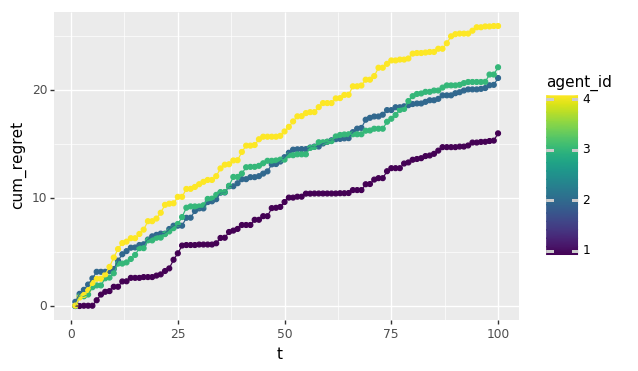

<ggplot: (8776061379197)>


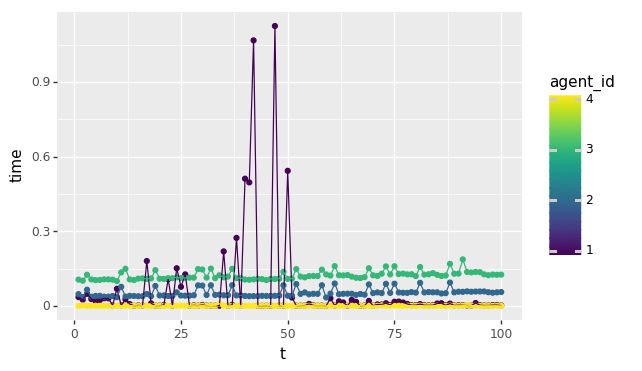

<ggplot: (8775962711833)>


In [5]:
seed=2
agents = [make_laplace_agent()] +\
             [make_langevin_agent()] +\
             [make_mala_agent()] +\
             [make_pgts_agent()]
results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=1)


theta [ 1.78862847  0.43650985  0.09649747 -1.8634927  -0.2773882  -0.35475898
 -0.08274148 -0.62700068 -0.04381817 -0.47721803 -1.31386475  0.88462238
  0.88131804  1.70957306  0.05003364 -0.40467741 -0.54535995 -1.54647732
  0.98236743 -1.10106763]
Experiment: Step 0
 Sample: array([ 0.38825041, -0.38712718, -0.58722031,  1.91082685, -0.45984615,
        1.99073781, -0.34903539,  0.25282509,  1.08940955,  0.02392202,
        0.39312528, -0.2413848 , -0.47552486, -0.16577702, -0.64971742,
        1.63138295, -0.1676986 ,  1.7226692 , -2.68510868,  0.01842079])
Experiment: Step 1
 Sample: array([ 1.14045089, -0.74188963, -1.3539878 , -0.94078149,  1.11818053,
        1.65287183, -0.56100565,  1.10345764,  1.1604786 , -1.30649479,
       -0.03624424,  0.07040857,  0.55295667, -1.46956377, -0.27633511,
        1.12189099,  1.38571519,  1.78230694, -0.26410904,  1.88348973])
Experiment: Step 2
 Sample: array([-0.95845325,  1.03733974, -0.80438353,  0.62641727, -0.99768397,
        1.01513

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutoria

 Sample: array([ 1.19399063,  0.16608921,  0.46999053, -3.02810582,  0.32845028,
        0.08698089,  0.29431006, -0.43450566, -0.60238908, -0.09737023,
       -0.711565  ,  1.12783635,  1.04071762,  1.79132633, -0.41680674,
       -1.07199825, -0.13746121, -2.13172092, -0.13551455, -0.6631428 ])
Experiment: Step 63
 Sample: array([ 1.57161904, -0.63001131, -0.35943615, -2.80174604, -0.00480926,
        0.21768156,  0.1585901 ,  0.50061163, -0.59024296, -0.48197092,
        0.5017968 ,  0.34993823, -0.8153862 ,  0.03932926,  0.52560739,
        0.87751017,  2.2865575 , -0.38488402, -0.45933492, -1.42552292])
Experiment: Step 64
 Sample: array([ 1.79781825,  0.2314261 , -0.49725943, -1.91055959,  0.77086616,
        1.01012589,  0.04249263, -1.63311452, -1.82453569,  0.22392697,
       -0.11488949,  1.16678268,  1.28287619,  1.22654436, -0.08932514,
       -1.24439169,  1.19827428, -0.05680357, -1.19632957, -0.78767198])
Experiment: Step 65
 Sample: array([ 2.29417888, -0.77925154,  0.6

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutoria

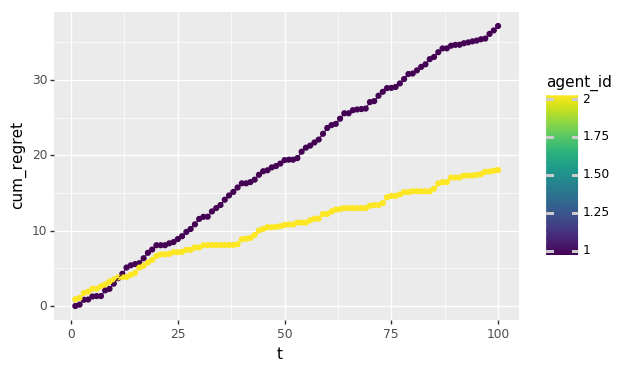

<ggplot: (8776061379265)>


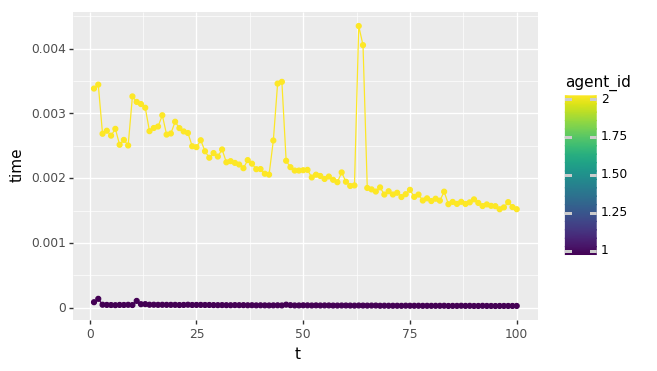

<ggplot: (8776061306261)>


In [6]:
seed=3
agents = [DefaultAgent(dim)] +\
             [make_pgts_agent()]
results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=1)